<h1>Preliminary EDA</h1>

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
from tqdm import tqdm
from glob import glob
import albumentations as A

In [2]:
INPUT_DIR = '../input'
TRAIN_IMAGES = '../input/train'
TEST_IMAGES = '../input/test'

In [3]:
os.listdir(INPUT_DIR)

['train_k.csv',
 'sample_submission.csv',
 '_annotations.csv',
 'train_annotations.csv',
 'train.csv',
 'train',
 'test']

In [4]:
train_df = pd.read_csv(os.path.join(INPUT_DIR, 'train.csv'))
train_df.head()

StudyInstanceUID  ETT - Abnormal  \
0  1.2.826.0.1.3680043.8.498.26697628953273228189...               0   
1  1.2.826.0.1.3680043.8.498.46302891597398758759...               0   
2  1.2.826.0.1.3680043.8.498.23819260719748494858...               0   
3  1.2.826.0.1.3680043.8.498.68286643202323212801...               0   
4  1.2.826.0.1.3680043.8.498.10050203009225938259...               0   

   ETT - Borderline  ETT - Normal  NGT - Abnormal  NGT - Borderline  \
0                 0             0               0                 0   
1                 0             1               0                 0   
2                 0             0               0                 0   
3                 0             0               0                 0   
4                 0             0               0                 0   

   NGT - Incompletely Imaged  NGT - Normal  CVC - Abnormal  CVC - Borderline  \
0                          0             1               0                 0   
1                          1             0               0                 0   
2                          0             0               0                 1   
3                          0             0               1                 0   
4                          0             0               0                 0   

   CVC - Normal  Swan Ganz Catheter Present  PatientID  
0             0                           0  ec89415d1  
1             1                           0  bf4c6da3c  
2             0                           0  3fc1c97e5  
3             0                           0  c31019814  
4             1                           0  207685cd1

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30083 entries, 0 to 30082
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   StudyInstanceUID            30083 non-null  object
 1   ETT - Abnormal              30083 non-null  int64 
 2   ETT - Borderline            30083 non-null  int64 
 3   ETT - Normal                30083 non-null  int64 
 4   NGT - Abnormal              30083 non-null  int64 
 5   NGT - Borderline            30083 non-null  int64 
 6   NGT - Incompletely Imaged   30083 non-null  int64 
 7   NGT - Normal                30083 non-null  int64 
 8   CVC - Abnormal              30083 non-null  int64 
 9   CVC - Borderline            30083 non-null  int64 
 10  CVC - Normal                30083 non-null  int64 
 11  Swan Ganz Catheter Present  30083 non-null  int64 
 12  PatientID                   30083 non-null  object
dtypes: int64(11), object(2)
memory usage: 3.0+ MB


In [6]:
# How many different patients are there

train_df.PatientID.nunique()

3255

In [7]:
# How many patients and images

patient_images = train_df.groupby('PatientID', \
                                  as_index=False).agg(num_images=('StudyInstanceUID','count')).sort_values(by='num_images', ascending=False)

In [8]:
image_frequencies = patient_images.groupby('num_images').agg(frequency=('PatientID', 'count')) / len(patient_images)
image_frequencies['cum_frequency'] = image_frequencies['frequency'].cumsum()
image_frequencies.head(30)

frequency  cum_frequency
num_images                          
1            0.121966       0.121966
2            0.125038       0.247005
3            0.105684       0.352688
4            0.093395       0.446083
5            0.076190       0.522273
6            0.069124       0.591398
7            0.061137       0.652535
8            0.044240       0.696774
9            0.033487       0.730261
10           0.023963       0.754224
11           0.020584       0.774808
12           0.021505       0.796313
13           0.020584       0.816897
14           0.015361       0.832258
15           0.010445       0.842704
16           0.011060       0.853763
17           0.012596       0.866359
18           0.009524       0.875883
19           0.009524       0.885407
20           0.005530       0.890937
21           0.008602       0.899539
22           0.004916       0.904455
23           0.007066       0.911521
24           0.007066       0.918587
25           0.004301       0.922888
26           0.003994       0.926882
27           0.005837       0.932719
28           0.003072       0.935791
29           0.003994       0.939785
30           0.002765       0.942550

In [9]:
train_annotations_df = pd.read_csv(os.path.join(INPUT_DIR, 'train_annotations.csv'))
train_annotations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17999 entries, 0 to 17998
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   StudyInstanceUID  17999 non-null  object
 1   label             17999 non-null  object
 2   data              17999 non-null  object
dtypes: object(3)
memory usage: 422.0+ KB


In [10]:
train_annotations_df.head(25)

StudyInstanceUID  \
0   1.2.826.0.1.3680043.8.498.12616281126973421762...   
1   1.2.826.0.1.3680043.8.498.12616281126973421762...   
2   1.2.826.0.1.3680043.8.498.72921907356394389969...   
3   1.2.826.0.1.3680043.8.498.11697104485452001927...   
4   1.2.826.0.1.3680043.8.498.87704688663091069148...   
5   1.2.826.0.1.3680043.8.498.87704688663091069148...   
6   1.2.826.0.1.3680043.8.498.87704688663091069148...   
7   1.2.826.0.1.3680043.8.498.53113362093090654004...   
8   1.2.826.0.1.3680043.8.498.83331936392921199432...   
9   1.2.826.0.1.3680043.8.498.83331936392921199432...   
10  1.2.826.0.1.3680043.8.498.83331936392921199432...   
11  1.2.826.0.1.3680043.8.498.21193834580880506210...   
12  1.2.826.0.1.3680043.8.498.92336648642416647037...   
13  1.2.826.0.1.3680043.8.498.10554821235548468812...   
14  1.2.826.0.1.3680043.8.498.13201061130520941008...   
15  1.2.826.0.1.3680043.8.498.32175969495085773655...   
16  1.2.826.0.1.3680043.8.498.67817181547457567521...   
17  1.2.826.0.1.3680043.8.498.34635151678243064945...   
18  1.2.826.0.1.3680043.8.498.40884867306291779816...   
19  1.2.826.0.1.3680043.8.498.59757398491099579448...   
20  1.2.826.0.1.3680043.8.498.59757398491099579448...   
21  1.2.826.0.1.3680043.8.498.59757398491099579448...   
22  1.2.826.0.1.3680043.8.498.10093202825943160056...   
23  1.2.826.0.1.3680043.8.498.75118870156895832757...   
24  1.2.826.0.1.3680043.8.498.28431016971648380368...   

                        label  \
0                CVC - Normal   
1                CVC - Normal   
2            CVC - Borderline   
3                CVC - Normal   
4                NGT - Normal   
5                CVC - Normal   
6                ETT - Normal   
7                CVC - Normal   
8                NGT - Normal   
9                CVC - Normal   
10               ETT - Normal   
11               CVC - Normal   
12               CVC - Normal   
13           CVC - Borderline   
14               CVC - Normal   
15               CVC - Normal   
16               CVC - Normal   
17               CVC - Normal   
18               CVC - Normal   
19               ETT - Normal   
20               CVC - Normal   
21  NGT - Incompletely Imaged   
22               CVC - Normal   
23               CVC - Normal   
24               CVC - Normal   

                                                 data  
0   [[1487, 1279], [1477, 1168], [1472, 1052], [14...  
1   [[1328, 7], [1347, 101], [1383, 193], [1400, 2...  
2   [[801, 1207], [812, 1112], [823, 1023], [842, ...  
3   [[1366, 961], [1411, 861], [1453, 751], [1508,...  
4   [[1862, 14], [1845, 293], [1801, 869], [1716, ...  
5   [[906, 604], [1103, 578], [1242, 607], [1459, ...  
6   [[1781, 804], [1801, 666], [1791, 496], [1798,...  
7   [[1152, 938], [1193, 856], [1265, 795], [1362,...  
8   [[1903, 73], [1934, 768], [1917, 1061], [1866,...  
9   [[92, 1857], [163, 1936], [251, 1917], [282, 1...  
10  [[1842, 471], [1845, 307], [1856, 135], [1886,...  
11  [[8, 936], [155, 791], [319, 615], [447, 495],...  
12  [[11, 1362], [89, 1251], [192, 1149], [336, 10...  
13  [[1175, 1203], [1170, 1060], [1181, 897], [119...  
14  [[1246, 667], [1337, 608], [1462, 552], [1621,...  
15  [[1108, 1262], [1108, 1046], [1105, 831], [112...  
16  [[1182, 1062], [1351, 922], [1497, 781], [1591...  
17  [[979, 764], [979, 633], [968, 523], [965, 417...  
18  [[1285, 1083], [1318, 925], [1349, 725], [1324...  
19  [[1411, 532], [1419, 436], [1444, 344], [1478,...  
20  [[1220, 847], [1279, 764], [1352, 677], [1436,...  
21  [[1640, 2043], [1677, 1917], [1677, 1774], [15...  
22  [[1276, 1435], [1262, 1227], [1242, 1016], [12...  
23  [[1461, 1060], [1440, 929], [1413, 775], [1368...  
24  [[1440, 1397], [1440, 1242], [1440, 1120], [14...

In [11]:
sample_submission_df = pd.read_csv(os.path.join(INPUT_DIR, 'sample_submission.csv'))
sample_submission_df.head()

StudyInstanceUID  ETT - Abnormal  \
0  1.2.826.0.1.3680043.8.498.46923145579096002617...               0   
1  1.2.826.0.1.3680043.8.498.84006870182611080091...               0   
2  1.2.826.0.1.3680043.8.498.12219033294413119947...               0   
3  1.2.826.0.1.3680043.8.498.84994474380235968109...               0   
4  1.2.826.0.1.3680043.8.498.35798987793805669662...               0   

   ETT - Borderline  ETT - Normal  NGT - Abnormal  NGT - Borderline  \
0                 0             0               0                 0   
1                 0             0               0                 0   
2                 0             0               0                 0   
3                 0             0               0                 0   
4                 0             0               0                 0   

   NGT - Incompletely Imaged  NGT - Normal  CVC - Abnormal  CVC - Borderline  \
0                          0             0               0                 0   
1                          0             0               0                 0   
2                          0             0               0                 0   
3                          0             0               0                 0   
4                          0             0               0                 0   

   CVC - Normal  Swan Ganz Catheter Present  
0             0                           0  
1             0                           0  
2             0                           0  
3             0                           0  
4             0                           0

In [12]:
sample_submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3582 entries, 0 to 3581
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   StudyInstanceUID            3582 non-null   object
 1   ETT - Abnormal              3582 non-null   int64 
 2   ETT - Borderline            3582 non-null   int64 
 3   ETT - Normal                3582 non-null   int64 
 4   NGT - Abnormal              3582 non-null   int64 
 5   NGT - Borderline            3582 non-null   int64 
 6   NGT - Incompletely Imaged   3582 non-null   int64 
 7   NGT - Normal                3582 non-null   int64 
 8   CVC - Abnormal              3582 non-null   int64 
 9   CVC - Borderline            3582 non-null   int64 
 10  CVC - Normal                3582 non-null   int64 
 11  Swan Ganz Catheter Present  3582 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 335.9+ KB


In [13]:
print(f'There are {len(os.listdir(TRAIN_IMAGES))} train images and {len(os.listdir(TEST_IMAGES))} test images')

There are 30084 train images and 3582 test images


In [14]:
train_df.sum(axis=1)

0        1
1        3
2        1
3        1
4        1
        ..
30078    3
30079    1
30080    4
30081    1
30082    2
Length: 30083, dtype: int64

In [121]:
def show_image(path, df, idx):
    file = os.path.join(path, df.loc[idx, 'StudyInstanceUID'] + '.jpg')
    image = Image.open(file)
    
    plt.figure(figsize=(7,7))
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(f'{idx}')
    plt.tight_layout()
    
def show_transformed_image(path, df, idx, rows, cols, aug):
    file = os.path.join(path, df.loc[idx, 'StudyInstanceUID'] + '.jpg')
    image = Image.open(file).convert('RGB')
    
    fig, ax = plt.subplots(rows, cols, figsize=(15,12))
    ax = ax.reshape(-1)
    for i in range(rows * cols):
        image = np.array(image)
        augmented = aug(image=image)
        transformed = augmented['image']
        ax[i].imshow(transformed)
        ax[i].axis('off')
          
    plt.suptitle(f'{idx}')
    plt.tight_layout()
    
    

def show_images(path, df, rows, cols, suptitle=None):
    num_images = rows * cols
    
    fig, ax = plt.subplots(rows, cols, figsize=(15,12))
    ax = ax.reshape(-1)
    if suptitle is not None:
        fig.suptitle(suptitle)
        
    for i in range(num_images):
        file = os.path.join(path,df.iloc[i]['StudyInstanceUID'] + '.jpg')
        image = Image.open(file)
        ax[i].imshow(image, cmap='gray')
        title = ', '.join([c for c in df.columns if df.iloc[i][c] == 1])
        ax[i].set_title(title)
        ax[i].axis('off')
        
    plt.tight_layout()
    plt.show()

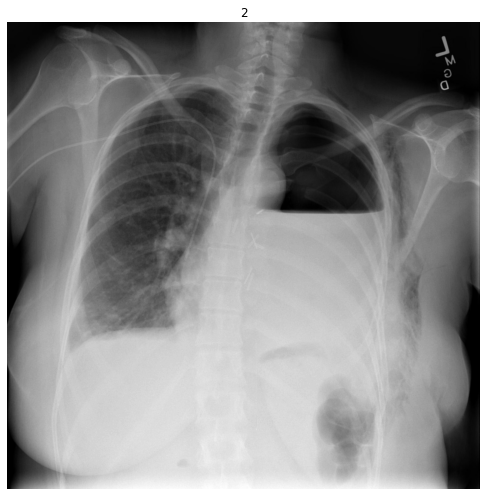

In [16]:
show_image(TRAIN_IMAGES, train_df, 2)

In [17]:
train_df.loc[2]

StudyInstanceUID              1.2.826.0.1.3680043.8.498.23819260719748494858...
ETT - Abnormal                                                                0
ETT - Borderline                                                              0
ETT - Normal                                                                  0
NGT - Abnormal                                                                0
NGT - Borderline                                                              0
NGT - Incompletely Imaged                                                     0
NGT - Normal                                                                  0
CVC - Abnormal                                                                0
CVC - Borderline                                                              1
CVC - Normal                                                                  0
Swan Ganz Catheter Present                                                    0
PatientID                               

In [18]:
train_df.loc[2, 'StudyInstanceUID']

'1.2.826.0.1.3680043.8.498.23819260719748494858948050424870692577'

In [19]:
interesting = ['76dfe347c']
patient_id = '6fc30d204'
p = train_df[train_df.PatientID == patient_id]
p

StudyInstanceUID  ETT - Abnormal  \
17653  1.2.826.0.1.3680043.8.498.18766608929740234114...               0   
19804  1.2.826.0.1.3680043.8.498.12430899959223391969...               0   
21274  1.2.826.0.1.3680043.8.498.12715526074955120054...               0   
29837  1.2.826.0.1.3680043.8.498.58945108750419950162...               0   

       ETT - Borderline  ETT - Normal  NGT - Abnormal  NGT - Borderline  \
17653                 0             0               0                 0   
19804                 0             0               0                 0   
21274                 0             0               0                 0   
29837                 0             0               0                 0   

       NGT - Incompletely Imaged  NGT - Normal  CVC - Abnormal  \
17653                          0             0               0   
19804                          0             0               0   
21274                          0             0               0   
29837                          0             0               1   

       CVC - Borderline  CVC - Normal  Swan Ganz Catheter Present  PatientID  
17653                 1             0                           0  6fc30d204  
19804                 1             1                           0  6fc30d204  
21274                 0             1                           0  6fc30d204  
29837                 0             1                           0  6fc30d204

In [20]:
train_df.columns[1:-2].values

array(['ETT - Abnormal', 'ETT - Borderline', 'ETT - Normal',
       'NGT - Abnormal', 'NGT - Borderline', 'NGT - Incompletely Imaged',
       'NGT - Normal', 'CVC - Abnormal', 'CVC - Borderline',
       'CVC - Normal'], dtype=object)

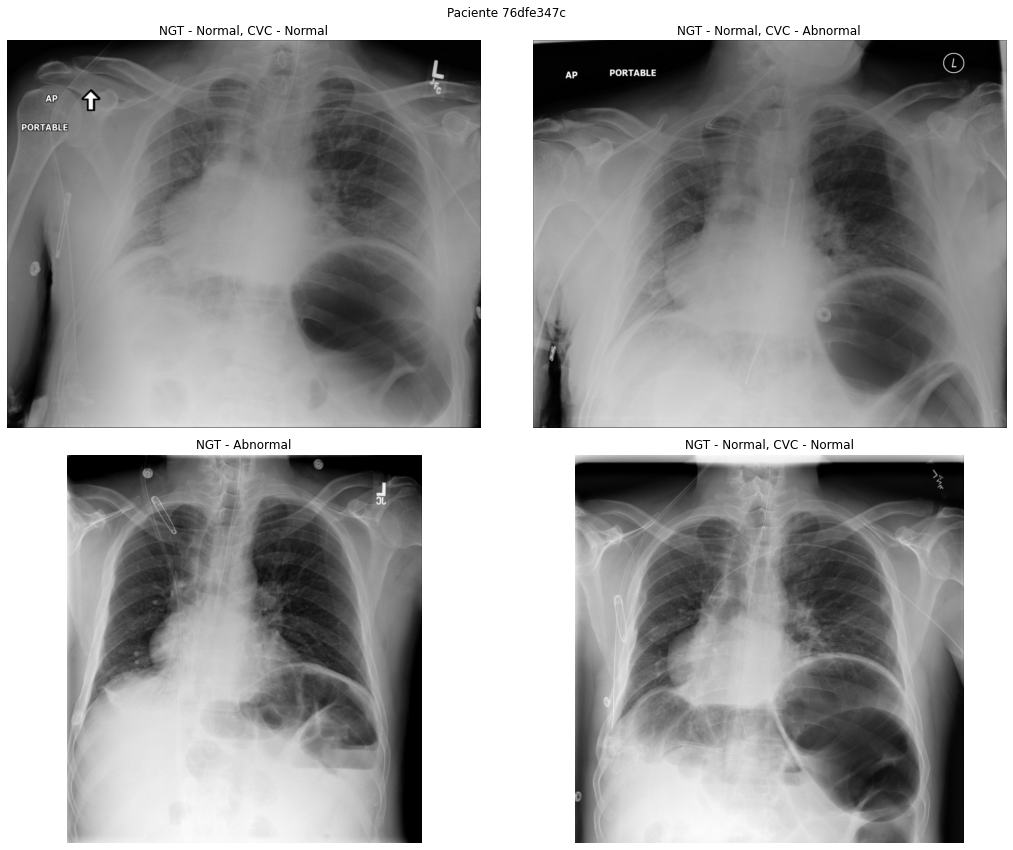

In [21]:
patient_id = '76dfe347c'
p = train_df[train_df.PatientID == patient_id]
show_images(TRAIN_IMAGES, p, 2, 2, suptitle=f'Paciente {patient_id}')

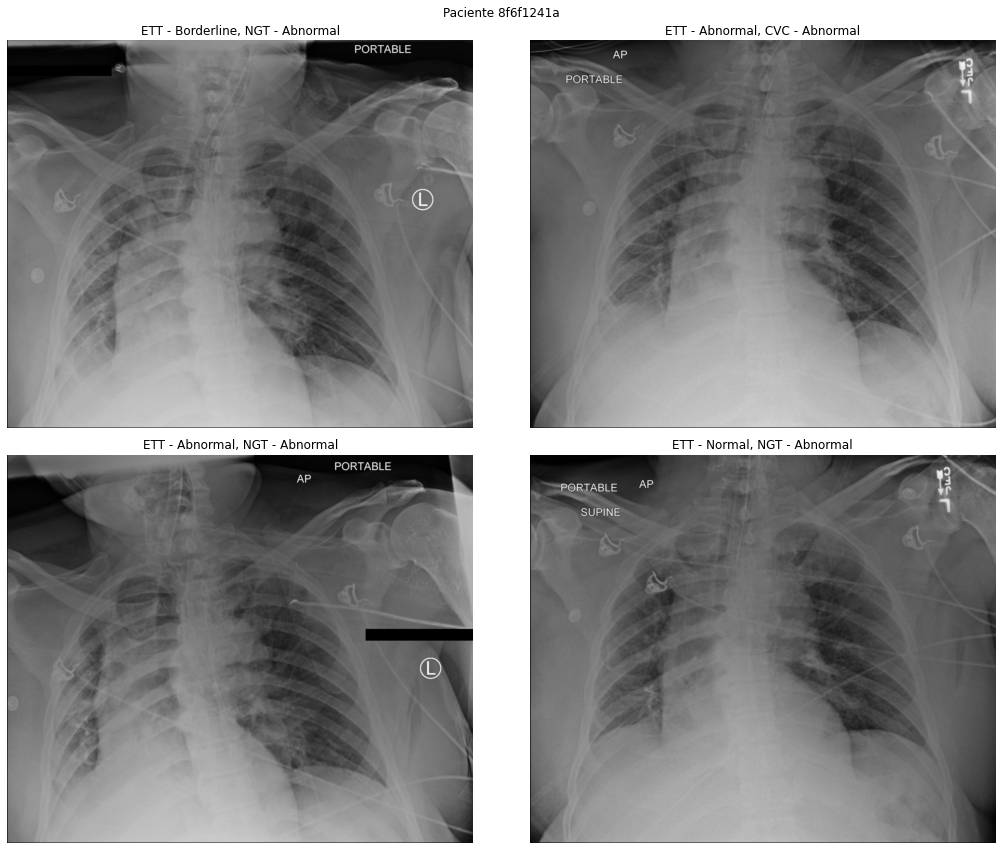

In [22]:
patient_id = '8f6f1241a'
p = train_df[train_df.PatientID == patient_id]
show_images(TRAIN_IMAGES, p, 2, 2, suptitle=f'Paciente {patient_id}')

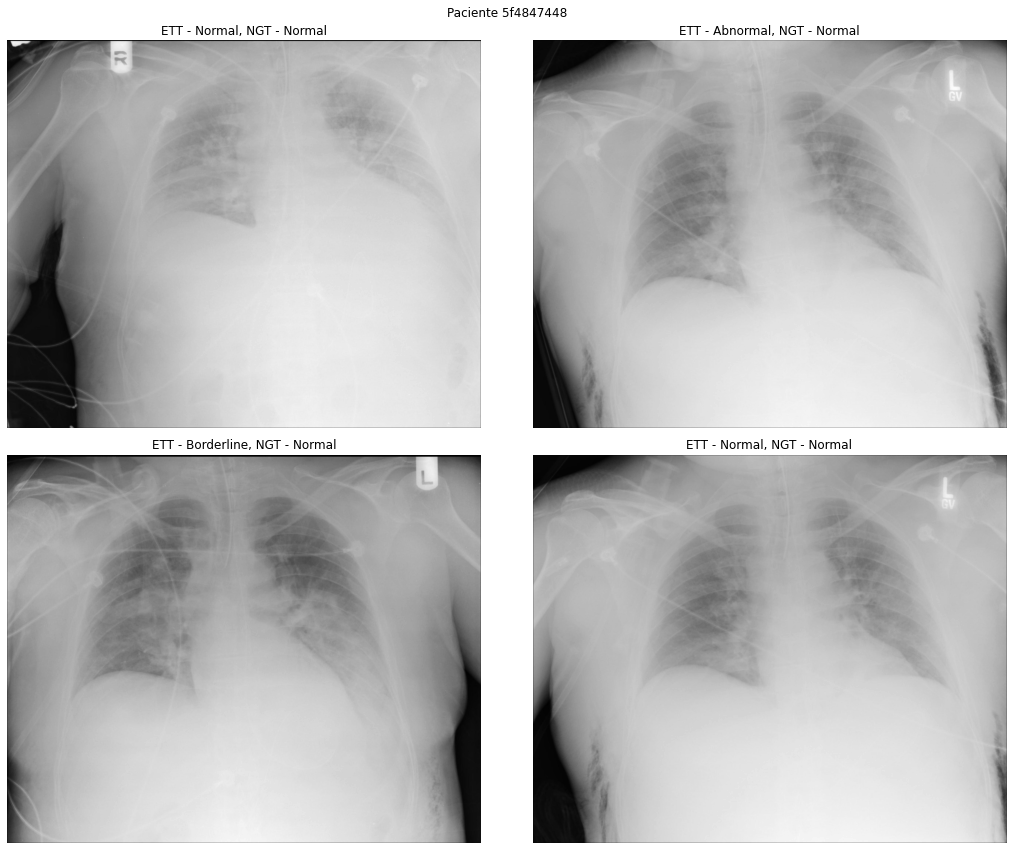

In [23]:
patient_id = '5f4847448'
p = train_df[train_df.PatientID == patient_id]
show_images(TRAIN_IMAGES, p, 2, 2, suptitle=f'Paciente {patient_id}')

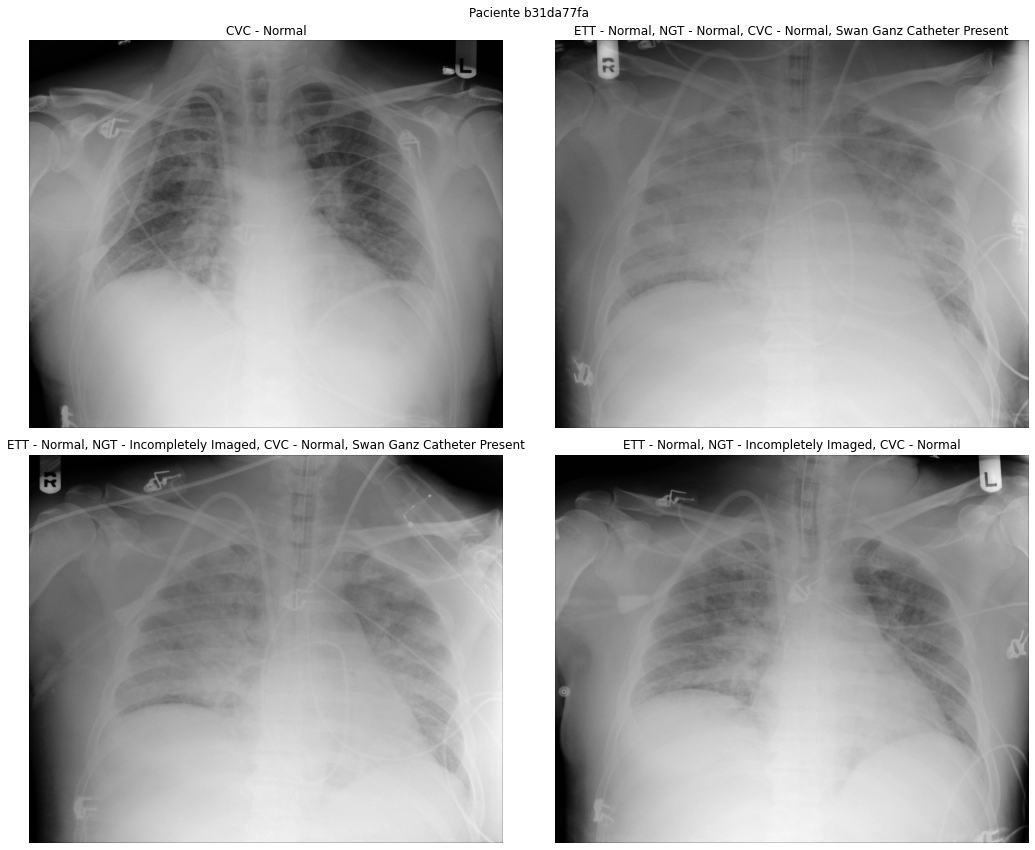

In [24]:
patient_id = 'b31da77fa'
p = train_df[train_df.PatientID == patient_id]
show_images(TRAIN_IMAGES, p, 2, 2, suptitle=f'Paciente {patient_id}')

In [25]:
diagnostic_columns = train_df.columns[1:-1]
dc = train_df[diagnostic_columns]

In [26]:
# How many images are there of every diagnostic

dc.sum()

ETT - Abnormal                   79
ETT - Borderline               1138
ETT - Normal                   7240
NGT - Abnormal                  279
NGT - Borderline                529
NGT - Incompletely Imaged      2748
NGT - Normal                   4797
CVC - Abnormal                 3195
CVC - Borderline               8460
CVC - Normal                  21324
Swan Ganz Catheter Present      830
dtype: int64

In [27]:
# Frequency of coincidence of pair diagnostic

pairs = dc.T.dot(dc) 
pairs

ETT - Abnormal  ETT - Borderline  ETT - Normal  \
ETT - Abnormal                          79                 0             0   
ETT - Borderline                         0              1138             0   
ETT - Normal                             0                 0          7240   
NGT - Abnormal                           2                32           157   
NGT - Borderline                         2                45           319   
NGT - Incompletely Imaged                7               302          2091   
NGT - Normal                            41               604          3163   
CVC - Abnormal                          11               149           746   
CVC - Borderline                        26               410          2363   
CVC - Normal                            47               740          5302   
Swan Ganz Catheter Present               7                97           558   

                            NGT - Abnormal  NGT - Borderline  \
ETT - Abnormal                           2                 2   
ETT - Borderline                        32                45   
ETT - Normal                           157               319   
NGT - Abnormal                         279                 1   
NGT - Borderline                         1               529   
NGT - Incompletely Imaged               10                 5   
NGT - Normal                             9                13   
CVC - Abnormal                          25                54   
CVC - Borderline                        88               154   
CVC - Normal                           174               370   
Swan Ganz Catheter Present              14                21   

                            NGT - Incompletely Imaged  NGT - Normal  \
ETT - Abnormal                                      7            41   
ETT - Borderline                                  302           604   
ETT - Normal                                     2091          3163   
NGT - Abnormal                                     10             9   
NGT - Borderline                                    5            13   
NGT - Incompletely Imaged                        2748             7   
NGT - Normal                                        7          4797   
CVC - Abnormal                                    280           555   
CVC - Borderline                                  916          1580   
CVC - Normal                                     2065          3393   
Swan Ganz Catheter Present                        271           356   

                            CVC - Abnormal  CVC - Borderline  CVC - Normal  \
ETT - Abnormal                          11                26            47   
ETT - Borderline                       149               410           740   
ETT - Normal                           746              2363          5302   
NGT - Abnormal                          25                88           174   
NGT - Borderline                        54               154           370   
NGT - Incompletely Imaged              280               916          2065   
NGT - Normal                           555              1580          3393   
CVC - Abnormal                        3195               381           729   
CVC - Borderline                       381              8460          2607   
CVC - Normal                           729              2607         21324   
Swan Ganz Catheter Present              37               194           795   

                            Swan Ganz Catheter Present  
ETT - Abnormal                                       7  
ETT - Borderline                                    97  
ETT - Normal                                       558  
NGT - Abnormal                                      14  
NGT - Borderline                                    21  
NGT - Incompletely Imaged                          271  
NGT - Normal                                       356  
CVC - Abnormal                                      37  
CVC - Borderline   

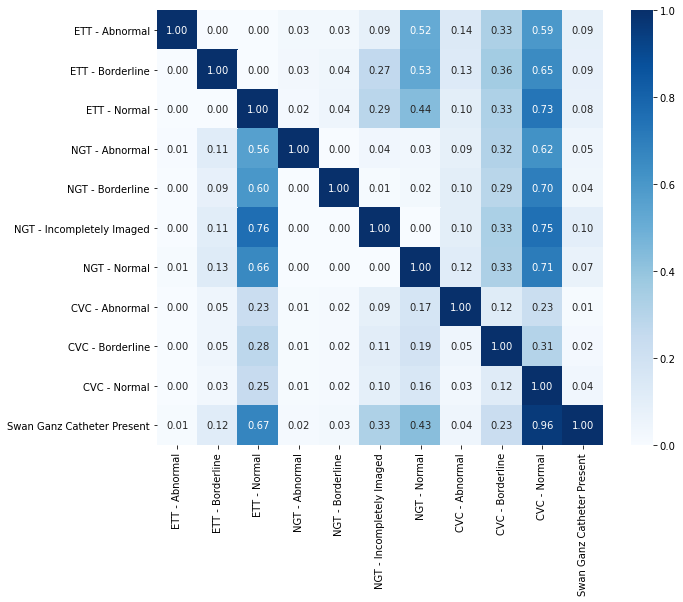

In [28]:
coincidence = pairs.div(pairs.values.diagonal(), axis=0)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(coincidence, cmap='Blues', annot=True, fmt='.2f')
plt.show()

In [29]:
dc[dc['Swan Ganz Catheter Present'] == 1].sum()

ETT - Abnormal                  7
ETT - Borderline               97
ETT - Normal                  558
NGT - Abnormal                 14
NGT - Borderline               21
NGT - Incompletely Imaged     271
NGT - Normal                  356
CVC - Abnormal                 37
CVC - Borderline              194
CVC - Normal                  795
Swan Ganz Catheter Present    830
dtype: int64

In [30]:
noe = train_df[(train_df['NGT - Abnormal'] == 1)&(train_df['NGT - Normal'] == 1)]

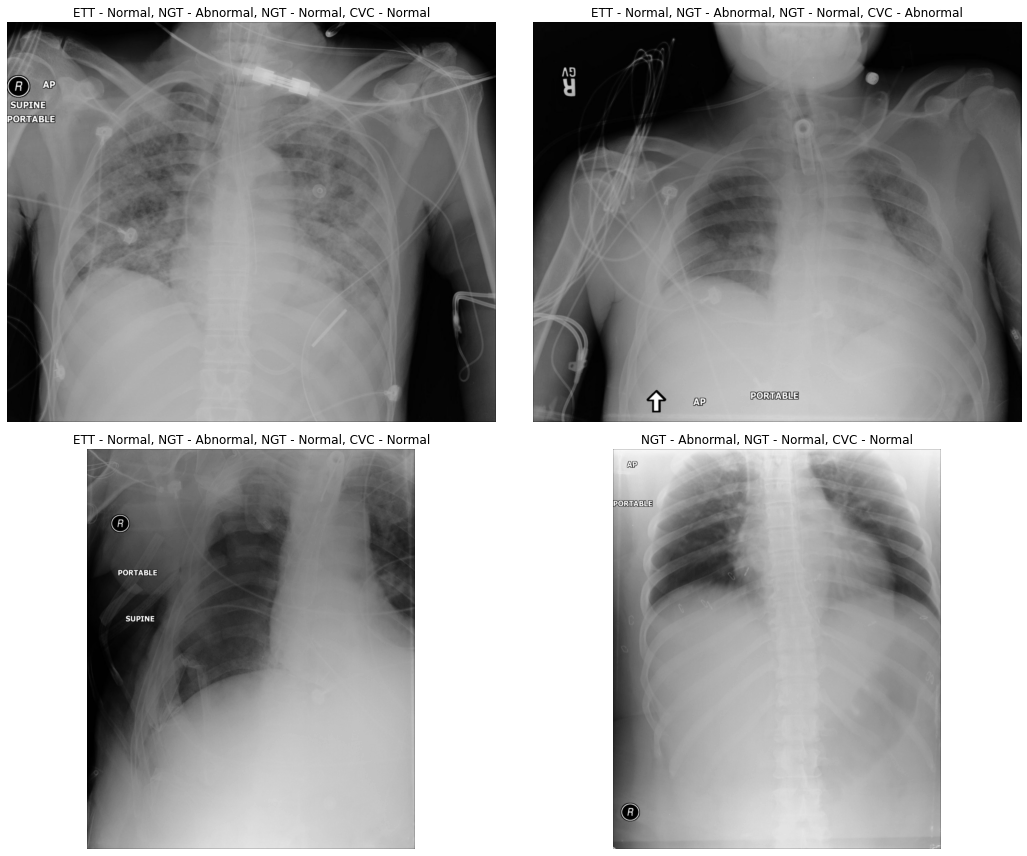

In [31]:
show_images(TRAIN_IMAGES, noe, rows=2, cols=2)

<h2>Image sizes</h2>

Let's check the different images sizes present in the training set.

In [32]:
from collections import defaultdict
import numpy as np
import cv2

In [33]:
train_images = glob(TRAIN_IMAGES + '/*.jpg')

In [34]:
size_freq = defaultdict(int)
for file in tqdm(train_images):
    #img = cv2.imread(file)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = Image.open(file).convert('RGB')
    a = np.array(img)
    print(a.shape)
    size_freq[img.size] += 1
    

  0%|          | 5/30083 [00:00<12:14, 40.98it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)


  0%|          | 13/30083 [00:00<13:49, 36.26it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  0%|          | 21/30083 [00:00<13:32, 36.98it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2991, 2602, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  0%|          | 29/30083 [00:00<14:21, 34.89it/s]

(2416, 3020, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2948, 2892, 3)


  0%|          | 33/30083 [00:00<15:20, 32.64it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2365, 2702, 3)


  0%|          | 41/30083 [00:01<15:36, 32.07it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  0%|          | 50/30083 [00:01<15:02, 33.27it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2975, 2538, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  0%|          | 58/30083 [00:01<15:39, 31.97it/s]

(2991, 2990, 3)
(2953, 2922, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  0%|          | 62/30083 [00:01<17:03, 29.33it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  0%|          | 68/30083 [00:02<19:30, 25.65it/s]

(2991, 2990, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2975, 2980, 3)


  0%|          | 75/30083 [00:02<18:21, 27.25it/s]

(2048, 2500, 3)
(2725, 2806, 3)
(2048, 2500, 3)
(2869, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)


  0%|          | 82/30083 [00:02<19:10, 26.09it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2492, 3056, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2544, 3056, 3)


  0%|          | 88/30083 [00:02<18:34, 26.91it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  0%|          | 94/30083 [00:03<18:29, 27.02it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)


  0%|          | 101/30083 [00:03<17:37, 28.35it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)


  0%|          | 105/30083 [00:03<17:14, 28.99it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


  0%|          | 113/30083 [00:03<16:38, 30.02it/s]

(2532, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  0%|          | 121/30083 [00:03<16:31, 30.22it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2948, 2936, 3)
(2048, 2500, 3)


  0%|          | 129/30083 [00:04<15:54, 31.38it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(3056, 2524, 3)
(2048, 2500, 3)
(2991, 2992, 3)


  0%|          | 133/30083 [00:04<15:24, 32.41it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2991, 2992, 3)


  0%|          | 141/30083 [00:04<15:59, 31.22it/s]

(2048, 2500, 3)
(2021, 2020, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  0%|          | 150/30083 [00:04<14:42, 33.90it/s]

(2657, 2830, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  1%|          | 159/30083 [00:05<14:09, 35.24it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  1%|          | 163/30083 [00:05<14:48, 33.66it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2627, 2530, 3)
(2991, 2992, 3)
(2048, 2500, 3)


  1%|          | 171/30083 [00:05<17:09, 29.05it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)


  1%|          | 179/30083 [00:05<15:26, 32.27it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  1%|          | 183/30083 [00:05<14:40, 33.95it/s]

(2048, 2500, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(3056, 2544, 3)
(2420, 2768, 3)
(2048, 2500, 3)


  1%|          | 191/30083 [00:06<16:29, 30.22it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2022, 1747, 3)
(2544, 3056, 3)
(2991, 2992, 3)


  1%|          | 199/30083 [00:06<16:40, 29.88it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(3056, 2544, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  1%|          | 203/30083 [00:06<16:06, 30.93it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  1%|          | 212/30083 [00:06<15:16, 32.59it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2914, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  1%|          | 220/30083 [00:07<15:27, 32.20it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  1%|          | 229/30083 [00:07<14:10, 35.11it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


  1%|          | 237/30083 [00:07<13:37, 36.53it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 2900, 3)


  1%|          | 246/30083 [00:07<12:58, 38.34it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)


  1%|          | 250/30083 [00:07<14:19, 34.70it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  1%|          | 258/30083 [00:08<15:09, 32.80it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  1%|          | 262/30083 [00:08<16:09, 30.77it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2794, 3)


  1%|          | 270/30083 [00:08<15:39, 31.72it/s]

(2540, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  1%|          | 278/30083 [00:08<15:20, 32.36it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  1%|          | 287/30083 [00:08<14:12, 34.95it/s]

(2948, 2676, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  1%|          | 291/30083 [00:09<14:48, 33.53it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  1%|          | 300/30083 [00:09<13:33, 36.61it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  1%|          | 308/30083 [00:09<14:27, 34.32it/s]

(2991, 2530, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  1%|          | 317/30083 [00:09<13:15, 37.40it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  1%|          | 326/30083 [00:10<13:23, 37.04it/s]

(2991, 2992, 3)
(2991, 2992, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(1830, 1670, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  1%|          | 330/30083 [00:10<13:26, 36.87it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


  1%|          | 338/30083 [00:10<15:41, 31.59it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3036, 3)
(2544, 3056, 3)


  1%|          | 342/30083 [00:10<16:44, 29.59it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


  1%|          | 350/30083 [00:10<17:20, 28.57it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)


  1%|          | 357/30083 [00:11<17:04, 29.02it/s]

(2544, 3056, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)


  1%|          | 361/30083 [00:11<15:48, 31.33it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  1%|          | 369/30083 [00:11<15:52, 31.20it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  1%|▏         | 377/30083 [00:11<15:31, 31.87it/s]

(2749, 2774, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)


  1%|▏         | 385/30083 [00:11<15:52, 31.19it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2644, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  1%|▏         | 389/30083 [00:12<15:36, 31.71it/s]

(2544, 3056, 3)
(3056, 2544, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2991, 2698, 3)
(2913, 2674, 3)


  1%|▏         | 397/30083 [00:12<15:13, 32.49it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


  1%|▏         | 405/30083 [00:12<14:01, 35.28it/s]

(2048, 2500, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  1%|▏         | 413/30083 [00:12<15:23, 32.12it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  1%|▏         | 421/30083 [00:13<14:45, 33.49it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2464, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  1%|▏         | 429/30083 [00:13<14:50, 33.30it/s]

(2991, 2530, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)


  1%|▏         | 433/30083 [00:13<15:16, 32.36it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2537, 2566, 3)
(2048, 2500, 3)


  1%|▏         | 441/30083 [00:13<15:07, 32.66it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2532, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  1%|▏         | 449/30083 [00:13<15:20, 32.20it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  2%|▏         | 457/30083 [00:14<14:43, 33.54it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  2%|▏         | 465/30083 [00:14<15:33, 31.72it/s]

(2048, 2500, 3)
(2991, 2694, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  2%|▏         | 469/30083 [00:14<15:02, 32.81it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  2%|▏         | 478/30083 [00:14<14:09, 34.86it/s]

(2991, 2992, 3)
(2500, 2048, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  2%|▏         | 486/30083 [00:14<13:48, 35.73it/s]

(2048, 2500, 3)
(2801, 2602, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2991, 2992, 3)


  2%|▏         | 494/30083 [00:15<14:40, 33.60it/s]

(2544, 3056, 3)
(2991, 2990, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  2%|▏         | 502/30083 [00:15<14:31, 33.95it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  2%|▏         | 510/30083 [00:15<14:51, 33.19it/s]

(2048, 2500, 3)
(2607, 2396, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)


  2%|▏         | 514/30083 [00:15<14:48, 33.29it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2914, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  2%|▏         | 523/30083 [00:16<14:30, 33.94it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2021, 2020, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  2%|▏         | 532/30083 [00:16<13:39, 36.06it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2986, 3)
(2021, 1840, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  2%|▏         | 542/30083 [00:16<13:26, 36.64it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)


  2%|▏         | 546/30083 [00:16<14:31, 33.89it/s]

(2991, 2992, 3)
(2991, 2992, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  2%|▏         | 554/30083 [00:16<14:09, 34.76it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 2788, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  2%|▏         | 562/30083 [00:17<13:59, 35.18it/s]

(2048, 2500, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  2%|▏         | 570/30083 [00:17<13:54, 35.38it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2217, 2378, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2814, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  2%|▏         | 580/30083 [00:17<12:16, 40.05it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  2%|▏         | 585/30083 [00:17<13:38, 36.06it/s]

(2991, 2992, 3)
(2778, 2690, 3)
(2513, 2790, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2396, 2800, 3)
(2544, 3056, 3)


  2%|▏         | 593/30083 [00:18<15:15, 32.21it/s]

(2991, 2992, 3)
(2821, 2992, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  2%|▏         | 601/30083 [00:18<14:26, 34.01it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  2%|▏         | 609/30083 [00:18<15:02, 32.66it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  2%|▏         | 617/30083 [00:18<15:12, 32.31it/s]

(2544, 2928, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(3044, 2544, 3)
(2981, 2394, 3)


  2%|▏         | 621/30083 [00:18<15:08, 32.42it/s]

(2500, 2048, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  2%|▏         | 630/30083 [00:19<14:11, 34.60it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3036, 3)
(2544, 3056, 3)
(2991, 2614, 3)
(2048, 2500, 3)
(2020, 2021, 3)


  2%|▏         | 639/30083 [00:19<13:32, 36.24it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  2%|▏         | 647/30083 [00:19<13:37, 36.00it/s]

(2544, 3056, 3)
(2500, 2048, 3)
(2544, 3008, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2021, 2021, 3)


  2%|▏         | 655/30083 [00:19<14:25, 34.02it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2234, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


  2%|▏         | 659/30083 [00:19<13:46, 35.59it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2619, 2256, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2020, 2021, 3)


  2%|▏         | 667/30083 [00:20<15:39, 31.32it/s]

(2544, 3052, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2509, 2450, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  2%|▏         | 675/30083 [00:20<14:55, 32.84it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  2%|▏         | 683/30083 [00:20<14:43, 33.26it/s]

(2544, 3056, 3)
(2544, 3032, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  2%|▏         | 687/30083 [00:20<15:44, 31.14it/s]

(2544, 3056, 3)
(3056, 2544, 3)
(2769, 2894, 3)
(2048, 2500, 3)
(2669, 2484, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  2%|▏         | 696/30083 [00:21<16:04, 30.48it/s]

(2991, 2992, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


  2%|▏         | 704/30083 [00:21<15:09, 32.30it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  2%|▏         | 708/30083 [00:21<14:55, 32.78it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2798, 3)
(2048, 2500, 3)
(2991, 2992, 3)


  2%|▏         | 717/30083 [00:21<13:37, 35.93it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  2%|▏         | 725/30083 [00:22<15:54, 30.75it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2893, 2590, 3)


  2%|▏         | 733/30083 [00:22<15:17, 31.99it/s]

(2781, 2586, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)


  2%|▏         | 737/30083 [00:22<15:00, 32.58it/s]

(2048, 2500, 3)
(2872, 2544, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(3056, 2544, 3)


  2%|▏         | 745/30083 [00:22<14:47, 33.06it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 2992, 3)


  3%|▎         | 753/30083 [00:22<15:37, 31.30it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)


  3%|▎         | 761/30083 [00:23<14:15, 34.28it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2313, 2550, 3)
(2991, 2992, 3)


  3%|▎         | 769/30083 [00:23<15:40, 31.17it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2857, 2678, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  3%|▎         | 777/30083 [00:23<14:42, 33.20it/s]

(2048, 2500, 3)
(2862, 2844, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 2960, 3)


  3%|▎         | 782/30083 [00:23<13:53, 35.17it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  3%|▎         | 790/30083 [00:23<15:05, 32.37it/s]

(2981, 2714, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  3%|▎         | 798/30083 [00:24<14:31, 33.60it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  3%|▎         | 806/30083 [00:24<14:23, 33.91it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2934, 3)
(2048, 2500, 3)


  3%|▎         | 810/30083 [00:24<14:20, 34.04it/s]

(2991, 2992, 3)
(2021, 1990, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


  3%|▎         | 818/30083 [00:24<14:28, 33.68it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


  3%|▎         | 826/30083 [00:25<14:30, 33.62it/s]

(3056, 2544, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2598, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  3%|▎         | 835/30083 [00:25<14:06, 34.57it/s]

(2544, 3056, 3)
(2991, 2814, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)


  3%|▎         | 844/30083 [00:25<13:33, 35.93it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2413, 2502, 3)
(2544, 3056, 3)


  3%|▎         | 848/30083 [00:25<14:32, 33.52it/s]

(2500, 2048, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2653, 2638, 3)
(2048, 2500, 3)


  3%|▎         | 856/30083 [00:25<13:42, 35.54it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  3%|▎         | 864/30083 [00:26<14:44, 33.03it/s]

(2172, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2512, 3056, 3)
(2544, 3056, 3)


  3%|▎         | 872/30083 [00:26<15:46, 30.86it/s]

(2948, 2990, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2991, 2992, 3)


  3%|▎         | 876/30083 [00:26<16:02, 30.34it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  3%|▎         | 884/30083 [00:26<14:59, 32.48it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  3%|▎         | 893/30083 [00:27<14:07, 34.46it/s]

(2048, 2500, 3)
(2444, 2796, 3)
(2865, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  3%|▎         | 902/30083 [00:27<14:14, 34.14it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  3%|▎         | 906/30083 [00:27<15:02, 32.31it/s]

(2991, 2992, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  3%|▎         | 915/30083 [00:27<14:37, 33.24it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)


  3%|▎         | 923/30083 [00:27<14:28, 33.56it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2473, 3056, 3)
(2048, 2500, 3)
(2991, 2694, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  3%|▎         | 927/30083 [00:28<15:30, 31.32it/s]

(2544, 3056, 3)
(2991, 2690, 3)
(2544, 2904, 3)
(2500, 2048, 3)
(2991, 2992, 3)
(2991, 2992, 3)


  3%|▎         | 935/30083 [00:28<15:50, 30.68it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  3%|▎         | 939/30083 [00:28<16:19, 29.74it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  3%|▎         | 948/30083 [00:28<14:11, 34.21it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)


  3%|▎         | 956/30083 [00:28<14:42, 33.01it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2966, 3)
(2991, 2678, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  3%|▎         | 964/30083 [00:29<15:02, 32.26it/s]

(2991, 2992, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2021, 1860, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2761, 2742, 3)


  3%|▎         | 968/30083 [00:29<15:35, 31.13it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  3%|▎         | 977/30083 [00:29<15:15, 31.79it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(3056, 2544, 3)
(2991, 2992, 3)


  3%|▎         | 985/30083 [00:29<15:48, 30.69it/s]

(2928, 2544, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 2708, 3)
(2544, 3056, 3)


  3%|▎         | 989/30083 [00:30<16:04, 30.17it/s]

(2544, 3016, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2750, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


  3%|▎         | 997/30083 [00:30<15:18, 31.66it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2544, 3056, 3)


  3%|▎         | 1006/30083 [00:30<14:57, 32.39it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 2964, 3)
(2544, 2836, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  3%|▎         | 1010/30083 [00:30<15:27, 31.36it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  3%|▎         | 1019/30083 [00:30<14:02, 34.50it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  3%|▎         | 1028/30083 [00:31<13:15, 36.52it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  3%|▎         | 1036/30083 [00:31<13:32, 35.73it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)


  3%|▎         | 1040/30083 [00:31<14:43, 32.87it/s]

(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  3%|▎         | 1048/30083 [00:31<14:48, 32.68it/s]

(2544, 2980, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  3%|▎         | 1052/30083 [00:31<15:45, 30.71it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)


  4%|▎         | 1059/30083 [00:32<16:46, 28.84it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2947, 2764, 3)
(2500, 2048, 3)
(2544, 3056, 3)


  4%|▎         | 1067/30083 [00:32<15:55, 30.36it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  4%|▎         | 1075/30083 [00:32<15:15, 31.70it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  4%|▎         | 1079/30083 [00:32<15:53, 30.40it/s]

(2769, 2726, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)


  4%|▎         | 1088/30083 [00:33<14:54, 32.40it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  4%|▎         | 1096/30083 [00:33<16:01, 30.16it/s]

(2621, 2506, 3)
(2401, 2510, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  4%|▎         | 1105/30083 [00:33<13:39, 35.36it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)


  4%|▎         | 1113/30083 [00:33<13:21, 36.15it/s]

(2048, 2500, 3)
(2991, 2622, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  4%|▎         | 1123/30083 [00:33<11:57, 40.35it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  4%|▎         | 1128/30083 [00:34<12:32, 38.49it/s]

(2991, 2982, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2424, 3056, 3)
(2544, 3056, 3)


  4%|▍         | 1136/30083 [00:34<13:16, 36.35it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  4%|▍         | 1144/30083 [00:34<13:43, 35.13it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  4%|▍         | 1152/30083 [00:34<14:29, 33.28it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)


  4%|▍         | 1156/30083 [00:34<14:23, 33.50it/s]

(2048, 2500, 3)
(2989, 2562, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  4%|▍         | 1165/30083 [00:35<14:03, 34.29it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  4%|▍         | 1173/30083 [00:35<15:12, 31.67it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2702, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  4%|▍         | 1177/30083 [00:35<14:19, 33.64it/s]

(2048, 2500, 3)
(2991, 2794, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2504, 3056, 3)
(2544, 3056, 3)


  4%|▍         | 1185/30083 [00:35<16:08, 29.84it/s]

(2376, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2859, 2862, 3)
(2544, 3056, 3)


  4%|▍         | 1193/30083 [00:36<15:21, 31.36it/s]

(2544, 3015, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2989, 2992, 3)


  4%|▍         | 1202/30083 [00:36<13:36, 35.35it/s]

(2991, 2630, 3)
(2048, 2500, 3)
(2505, 2826, 3)
(2430, 2434, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  4%|▍         | 1207/30083 [00:36<13:00, 36.98it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2558, 3)
(2048, 2500, 3)
(2681, 2376, 3)


  4%|▍         | 1215/30083 [00:36<14:22, 33.47it/s]

(2789, 2792, 3)
(2991, 2798, 3)
(2948, 2852, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  4%|▍         | 1223/30083 [00:36<13:54, 34.60it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  4%|▍         | 1231/30083 [00:37<14:50, 32.39it/s]

(2544, 3000, 3)
(2991, 2630, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2990, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  4%|▍         | 1239/30083 [00:37<14:18, 33.60it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3008, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  4%|▍         | 1243/30083 [00:37<14:47, 32.49it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2814, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  4%|▍         | 1252/30083 [00:37<13:25, 35.79it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  4%|▍         | 1261/30083 [00:38<13:06, 36.66it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(1796, 1720, 3)


  4%|▍         | 1270/30083 [00:38<12:59, 36.98it/s]

(2021, 2021, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)


  4%|▍         | 1274/30083 [00:38<13:44, 34.94it/s]

(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  4%|▍         | 1282/30083 [00:38<15:54, 30.16it/s]

(2048, 2500, 3)
(2991, 2666, 3)
(2544, 3056, 3)
(2991, 2946, 3)
(2048, 2500, 3)
(2991, 2992, 3)


  4%|▍         | 1290/30083 [00:38<14:56, 32.11it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  4%|▍         | 1295/30083 [00:39<14:04, 34.10it/s]

(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2910, 2812, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  4%|▍         | 1303/30083 [00:39<14:01, 34.19it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2948, 2946, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3048, 3)


  4%|▍         | 1311/30083 [00:39<14:51, 32.28it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)


  4%|▍         | 1315/30083 [00:39<15:50, 30.26it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  4%|▍         | 1323/30083 [00:39<15:03, 31.83it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


  4%|▍         | 1331/30083 [00:40<15:22, 31.15it/s]

(2922, 2892, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


  4%|▍         | 1335/30083 [00:40<15:10, 31.57it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  4%|▍         | 1343/30083 [00:40<16:06, 29.75it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)


  4%|▍         | 1347/30083 [00:40<15:17, 31.33it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2544, 2952, 3)


  5%|▍         | 1355/30083 [00:41<16:47, 28.52it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2500, 2048, 3)
(2991, 2966, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2048, 2500, 3)


  5%|▍         | 1364/30083 [00:41<14:49, 32.27it/s]

(2048, 2500, 3)
(2549, 2566, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  5%|▍         | 1369/30083 [00:41<14:05, 33.96it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  5%|▍         | 1377/30083 [00:41<14:44, 32.46it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2991, 2418, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  5%|▍         | 1382/30083 [00:41<14:14, 33.58it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  5%|▍         | 1390/30083 [00:42<15:49, 30.21it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2991, 2622, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  5%|▍         | 1398/30083 [00:42<14:19, 33.39it/s]

(2537, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)


  5%|▍         | 1406/30083 [00:42<13:23, 35.70it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  5%|▍         | 1410/30083 [00:42<14:34, 32.80it/s]

(2629, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  5%|▍         | 1418/30083 [00:42<13:38, 35.00it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  5%|▍         | 1426/30083 [00:43<13:02, 36.61it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  5%|▍         | 1434/30083 [00:43<13:48, 34.57it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2592, 2620, 3)
(3056, 2544, 3)
(2500, 2048, 3)


  5%|▍         | 1443/30083 [00:43<13:26, 35.50it/s]

(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2021, 2021, 3)
(2544, 3056, 3)


  5%|▍         | 1451/30083 [00:43<13:12, 36.13it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2312, 2824, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2536, 2136, 3)
(2048, 2500, 3)


  5%|▍         | 1455/30083 [00:43<14:10, 33.65it/s]

(2544, 3032, 3)
(2544, 2932, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  5%|▍         | 1463/30083 [00:44<14:19, 33.31it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  5%|▍         | 1472/30083 [00:44<14:09, 33.70it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


  5%|▍         | 1477/30083 [00:44<13:14, 36.02it/s]

(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3048, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  5%|▍         | 1485/30083 [00:44<14:20, 33.24it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  5%|▍         | 1489/30083 [00:44<15:19, 31.09it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2833, 2694, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  5%|▍         | 1497/30083 [00:45<16:09, 29.48it/s]

(2544, 3056, 3)
(2991, 2892, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


  5%|▍         | 1504/30083 [00:45<15:47, 30.16it/s]

(2991, 2992, 3)
(2349, 2590, 3)
(2991, 2894, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  5%|▌         | 1512/30083 [00:45<15:42, 30.30it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


  5%|▌         | 1516/30083 [00:45<14:58, 31.78it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)


  5%|▌         | 1524/30083 [00:46<15:09, 31.39it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2317, 2426, 3)
(2544, 3024, 3)


  5%|▌         | 1532/30083 [00:46<13:45, 34.58it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  5%|▌         | 1540/30083 [00:46<13:22, 35.56it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(3056, 2544, 3)


  5%|▌         | 1548/30083 [00:46<14:14, 33.40it/s]

(2709, 2694, 3)
(2048, 2500, 3)
(2544, 2856, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  5%|▌         | 1552/30083 [00:46<14:22, 33.09it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)


  5%|▌         | 1560/30083 [00:47<14:58, 31.74it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)


  5%|▌         | 1568/30083 [00:47<13:51, 34.29it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


  5%|▌         | 1577/30083 [00:47<13:01, 36.46it/s]

(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  5%|▌         | 1586/30083 [00:47<13:36, 34.89it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2991, 2992, 3)
(2020, 2020, 3)


  5%|▌         | 1594/30083 [00:48<13:44, 34.56it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2021, 2021, 3)


  5%|▌         | 1599/30083 [00:48<13:04, 36.30it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2264, 2234, 3)
(2048, 2500, 3)


  5%|▌         | 1609/30083 [00:48<12:29, 38.00it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  5%|▌         | 1613/30083 [00:48<13:07, 36.17it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2690, 3)
(2544, 3056, 3)


  5%|▌         | 1621/30083 [00:48<14:22, 33.00it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  5%|▌         | 1629/30083 [00:49<15:05, 31.43it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2673, 2992, 3)
(2991, 2910, 3)
(2048, 2500, 3)


  5%|▌         | 1638/30083 [00:49<13:39, 34.71it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 2968, 3)
(2048, 2500, 3)


  5%|▌         | 1642/30083 [00:49<14:07, 33.56it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


  5%|▌         | 1650/30083 [00:49<14:30, 32.68it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


  6%|▌         | 1658/30083 [00:50<15:44, 30.11it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2021, 2021, 3)


  6%|▌         | 1663/30083 [00:50<14:22, 32.94it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2991, 2886, 3)
(2991, 2978, 3)
(2048, 2500, 3)


  6%|▌         | 1671/30083 [00:50<15:10, 31.19it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  6%|▌         | 1681/30083 [00:50<13:02, 36.28it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2532, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  6%|▌         | 1689/30083 [00:50<13:44, 34.43it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2830, 3)
(2048, 2500, 3)


  6%|▌         | 1698/30083 [00:51<13:12, 35.80it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  6%|▌         | 1703/30083 [00:51<12:50, 36.83it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(3056, 2544, 3)
(2544, 3056, 3)


  6%|▌         | 1711/30083 [00:51<13:37, 34.71it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(3056, 2528, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  6%|▌         | 1720/30083 [00:51<12:57, 36.46it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


  6%|▌         | 1724/30083 [00:51<13:46, 34.33it/s]

(2805, 2904, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2602, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  6%|▌         | 1733/30083 [00:52<13:35, 34.78it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2631, 2454, 3)
(2048, 2500, 3)
(2991, 2794, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  6%|▌         | 1741/30083 [00:52<13:11, 35.82it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2991, 2630, 3)


  6%|▌         | 1749/30083 [00:52<12:48, 36.86it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)


  6%|▌         | 1757/30083 [00:52<13:15, 35.60it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2657, 2746, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  6%|▌         | 1766/30083 [00:53<12:54, 36.57it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


  6%|▌         | 1774/30083 [00:53<13:13, 35.68it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  6%|▌         | 1782/30083 [00:53<13:26, 35.08it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2991, 2992, 3)


  6%|▌         | 1790/30083 [00:53<13:28, 34.99it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  6%|▌         | 1798/30083 [00:53<13:58, 33.74it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  6%|▌         | 1802/30083 [00:54<14:25, 32.68it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2825, 2522, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  6%|▌         | 1810/30083 [00:54<13:38, 34.54it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2341, 2422, 3)
(2991, 2992, 3)


  6%|▌         | 1818/30083 [00:54<14:04, 33.49it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2706, 3)
(2544, 3056, 3)


  6%|▌         | 1822/30083 [00:54<13:51, 33.98it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)


  6%|▌         | 1830/30083 [00:54<15:41, 30.01it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)


  6%|▌         | 1838/30083 [00:55<14:51, 31.67it/s]

(2500, 2048, 3)
(2048, 2500, 3)
(2889, 2908, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  6%|▌         | 1846/30083 [00:55<14:36, 32.21it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2021, 1801, 3)
(2991, 2992, 3)


  6%|▌         | 1854/30083 [00:55<15:03, 31.23it/s]

(2544, 3056, 3)
(2544, 3048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)


  6%|▌         | 1858/30083 [00:55<14:54, 31.55it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2464, 2832, 3)


  6%|▌         | 1866/30083 [00:56<15:00, 31.34it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  6%|▌         | 1874/30083 [00:56<15:08, 31.06it/s]

(2991, 2786, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  6%|▌         | 1878/30083 [00:56<16:30, 28.48it/s]

(2991, 2992, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


  6%|▋         | 1885/30083 [00:56<16:37, 28.27it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  6%|▋         | 1892/30083 [00:56<16:53, 27.82it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2991, 2990, 3)


  6%|▋         | 1898/30083 [00:57<17:04, 27.52it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)


  6%|▋         | 1901/30083 [00:57<17:30, 26.83it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2989, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  6%|▋         | 1908/30083 [00:57<16:24, 28.62it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(3056, 2544, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  6%|▋         | 1916/30083 [00:57<15:23, 30.51it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  6%|▋         | 1924/30083 [00:58<14:54, 31.48it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  6%|▋         | 1933/30083 [00:58<13:41, 34.27it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2021, 2020, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  6%|▋         | 1938/30083 [00:58<13:11, 35.57it/s]

(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  6%|▋         | 1946/30083 [00:58<13:13, 35.44it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2021, 2021, 3)


  6%|▋         | 1955/30083 [00:58<12:29, 37.51it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  7%|▋         | 1964/30083 [00:59<12:23, 37.84it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  7%|▋         | 1973/30083 [00:59<12:30, 37.44it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(3056, 2544, 3)
(2048, 2500, 3)


  7%|▋         | 1977/30083 [00:59<13:02, 35.93it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)


  7%|▋         | 1986/30083 [00:59<13:13, 35.42it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  7%|▋         | 1990/30083 [00:59<13:53, 33.70it/s]

(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  7%|▋         | 1998/30083 [01:00<14:44, 31.76it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2991, 2738, 3)
(2048, 2500, 3)


  7%|▋         | 2006/30083 [01:00<14:05, 33.21it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)


  7%|▋         | 2016/30083 [01:00<12:42, 36.83it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)


  7%|▋         | 2024/30083 [01:00<13:51, 33.74it/s]

(2544, 3056, 3)
(2749, 2914, 3)
(2421, 2246, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2829, 2992, 3)


  7%|▋         | 2032/30083 [01:01<13:16, 35.20it/s]

(2544, 2896, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  7%|▋         | 2037/30083 [01:01<12:34, 37.18it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


  7%|▋         | 2045/30083 [01:01<14:01, 33.30it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  7%|▋         | 2053/30083 [01:01<13:53, 33.62it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  7%|▋         | 2057/30083 [01:01<14:14, 32.81it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  7%|▋         | 2065/30083 [01:02<14:57, 31.22it/s]

(2544, 3056, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2344, 3056, 3)
(2048, 2500, 3)


  7%|▋         | 2069/30083 [01:02<16:42, 27.95it/s]

(2991, 2992, 3)
(3056, 2544, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  7%|▋         | 2077/30083 [01:02<15:08, 30.83it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


  7%|▋         | 2085/30083 [01:02<14:01, 33.26it/s]

(2048, 2500, 3)
(2021, 2020, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2500, 2048, 3)
(2544, 3056, 3)


  7%|▋         | 2089/30083 [01:02<14:33, 32.06it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)


  7%|▋         | 2097/30083 [01:03<14:23, 32.40it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  7%|▋         | 2105/30083 [01:03<13:37, 34.24it/s]

(2653, 2658, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)


  7%|▋         | 2113/30083 [01:03<13:13, 35.23it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2741, 2714, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  7%|▋         | 2121/30083 [01:03<12:55, 36.04it/s]

(2991, 2722, 3)
(2544, 3056, 3)
(2981, 2992, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  7%|▋         | 2130/30083 [01:04<13:59, 33.31it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  7%|▋         | 2138/30083 [01:04<13:23, 34.80it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)


  7%|▋         | 2147/30083 [01:04<12:39, 36.80it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2701, 2874, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  7%|▋         | 2152/30083 [01:04<12:15, 37.97it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2642, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  7%|▋         | 2160/30083 [01:04<13:26, 34.61it/s]

(2991, 2454, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  7%|▋         | 2169/30083 [01:05<13:24, 34.69it/s]

(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2508, 3056, 3)


  7%|▋         | 2173/30083 [01:05<13:51, 33.57it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2693, 2506, 3)
(2544, 3056, 3)
(3567, 3827, 3)


  7%|▋         | 2181/30083 [01:05<15:35, 29.83it/s]

(2991, 2938, 3)
(2048, 2500, 3)
(2991, 2578, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  7%|▋         | 2185/30083 [01:05<15:01, 30.94it/s]

(2937, 2936, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)


  7%|▋         | 2193/30083 [01:05<15:22, 30.22it/s]

(2544, 3056, 3)
(2991, 2682, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  7%|▋         | 2202/30083 [01:06<14:06, 32.94it/s]

(2048, 2500, 3)
(2853, 2366, 3)
(2048, 2500, 3)
(2661, 2674, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  7%|▋         | 2206/30083 [01:06<14:30, 32.02it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)


  7%|▋         | 2214/30083 [01:06<15:55, 29.18it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2585, 1986, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


  7%|▋         | 2220/30083 [01:06<16:24, 28.30it/s]

(2508, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2991, 2690, 3)
(3056, 2544, 3)
(2048, 2500, 3)


  7%|▋         | 2223/30083 [01:06<17:00, 27.30it/s]

(2048, 2500, 3)
(2991, 2974, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  7%|▋         | 2231/30083 [01:07<15:32, 29.85it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)


  7%|▋         | 2239/30083 [01:07<14:28, 32.06it/s]

(2544, 3056, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


  7%|▋         | 2247/30083 [01:07<15:13, 30.49it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2488, 3056, 3)


  7%|▋         | 2255/30083 [01:07<13:32, 34.25it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


  8%|▊         | 2259/30083 [01:08<14:16, 32.48it/s]

(2881, 2538, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  8%|▊         | 2267/30083 [01:08<14:37, 31.70it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(1941, 2378, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  8%|▊         | 2275/30083 [01:08<13:57, 33.19it/s]

(2544, 3040, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  8%|▊         | 2283/30083 [01:08<14:32, 31.87it/s]

(2048, 2500, 3)
(2991, 2910, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)


  8%|▊         | 2288/30083 [01:08<13:30, 34.31it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 2864, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)


  8%|▊         | 2296/30083 [01:09<13:26, 34.43it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  8%|▊         | 2304/30083 [01:09<13:45, 33.66it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)


  8%|▊         | 2312/30083 [01:09<13:25, 34.48it/s]

(2991, 2992, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)


  8%|▊         | 2317/30083 [01:09<13:11, 35.10it/s]

(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)


  8%|▊         | 2325/30083 [01:09<12:53, 35.88it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  8%|▊         | 2333/30083 [01:10<14:13, 32.51it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  8%|▊         | 2341/30083 [01:10<14:18, 32.31it/s]

(2991, 2992, 3)
(2991, 2762, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  8%|▊         | 2346/30083 [01:10<13:18, 34.72it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2990, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  8%|▊         | 2354/30083 [01:10<15:35, 29.63it/s]

(2500, 3056, 3)
(2544, 3020, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  8%|▊         | 2362/30083 [01:11<15:12, 30.39it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 2908, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  8%|▊         | 2366/30083 [01:11<14:49, 31.17it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2228, 3040, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  8%|▊         | 2374/30083 [01:11<14:35, 31.64it/s]

(2544, 3056, 3)
(2544, 2980, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2500, 2048, 3)


  8%|▊         | 2382/30083 [01:11<14:42, 31.37it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2577, 2538, 3)
(2953, 2818, 3)
(2048, 2500, 3)
(2991, 2992, 3)


  8%|▊         | 2386/30083 [01:11<15:02, 30.67it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  8%|▊         | 2394/30083 [01:12<14:03, 32.82it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2709, 2898, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  8%|▊         | 2403/30083 [01:12<13:58, 32.99it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2544, 3056, 3)


  8%|▊         | 2407/30083 [01:12<14:50, 31.07it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  8%|▊         | 2415/30083 [01:12<14:13, 32.41it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2544, 2956, 3)
(1837, 1930, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  8%|▊         | 2423/30083 [01:13<14:50, 31.04it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2522, 3)
(2605, 2814, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  8%|▊         | 2431/30083 [01:13<13:55, 33.11it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  8%|▊         | 2435/30083 [01:13<13:57, 32.99it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2558, 3)
(2472, 3056, 3)
(2991, 2992, 3)


  8%|▊         | 2443/30083 [01:13<15:50, 29.07it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


  8%|▊         | 2450/30083 [01:13<14:56, 30.84it/s]

(2989, 2770, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


  8%|▊         | 2454/30083 [01:14<15:06, 30.48it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)


  8%|▊         | 2462/30083 [01:14<15:20, 30.02it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  8%|▊         | 2470/30083 [01:14<14:28, 31.78it/s]

(2544, 3056, 3)
(2777, 2550, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2785, 2698, 3)
(2048, 2500, 3)


  8%|▊         | 2479/30083 [01:14<12:54, 35.62it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  8%|▊         | 2484/30083 [01:14<12:25, 37.03it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)


  8%|▊         | 2492/30083 [01:15<13:11, 34.87it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


  8%|▊         | 2500/30083 [01:15<13:32, 33.95it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)


  8%|▊         | 2508/30083 [01:15<14:32, 31.60it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2637, 2614, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2544, 3056, 3)


  8%|▊         | 2513/30083 [01:15<14:08, 32.48it/s]

(2829, 2530, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  8%|▊         | 2521/30083 [01:16<14:16, 32.17it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2454, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  8%|▊         | 2529/30083 [01:16<14:49, 30.98it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2641, 2574, 3)
(2991, 2992, 3)


  8%|▊         | 2534/30083 [01:16<13:49, 33.22it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  8%|▊         | 2543/30083 [01:16<12:57, 35.42it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  8%|▊         | 2551/30083 [01:16<13:10, 34.85it/s]

(2991, 2992, 3)
(2991, 2746, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


  9%|▊         | 2560/30083 [01:17<12:51, 35.66it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


  9%|▊         | 2569/30083 [01:17<12:09, 37.73it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  9%|▊         | 2573/30083 [01:17<12:48, 35.78it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)


  9%|▊         | 2581/30083 [01:17<14:30, 31.59it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2497, 2574, 3)
(2991, 2710, 3)
(2048, 2500, 3)


  9%|▊         | 2589/30083 [01:18<14:18, 32.03it/s]

(2991, 2990, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


  9%|▊         | 2593/30083 [01:18<14:27, 31.68it/s]

(2021, 1796, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)


  9%|▊         | 2601/30083 [01:18<14:44, 31.09it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2440, 2996, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  9%|▊         | 2610/30083 [01:18<13:48, 33.18it/s]

(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  9%|▊         | 2618/30083 [01:18<13:30, 33.88it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2827, 2968, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  9%|▊         | 2626/30083 [01:19<13:11, 34.70it/s]

(2991, 2658, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2380, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  9%|▊         | 2630/30083 [01:19<12:53, 35.51it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3028, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  9%|▉         | 2638/30083 [01:19<14:08, 32.34it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2842, 3)


  9%|▉         | 2647/30083 [01:19<13:41, 33.42it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


  9%|▉         | 2651/30083 [01:19<13:38, 33.53it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  9%|▉         | 2659/30083 [01:20<13:41, 33.40it/s]

(2544, 3056, 3)
(2353, 2726, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  9%|▉         | 2667/30083 [01:20<13:52, 32.94it/s]

(2544, 3056, 3)
(2749, 2446, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2594, 3)


  9%|▉         | 2675/30083 [01:20<14:29, 31.53it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2991, 2510, 3)
(2048, 2500, 3)


  9%|▉         | 2679/30083 [01:20<13:54, 32.82it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(3056, 2544, 3)


  9%|▉         | 2687/30083 [01:21<15:19, 29.80it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2973, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2953, 2710, 3)


  9%|▉         | 2696/30083 [01:21<14:24, 31.67it/s]

(2991, 2822, 3)
(2500, 2048, 3)
(2991, 2992, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3016, 3)


  9%|▉         | 2700/30083 [01:21<14:05, 32.39it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


  9%|▉         | 2708/30083 [01:21<13:08, 34.73it/s]

(2048, 2500, 3)
(2508, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


  9%|▉         | 2716/30083 [01:21<13:21, 34.14it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  9%|▉         | 2724/30083 [01:22<13:20, 34.16it/s]

(2544, 3056, 3)
(2937, 2946, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  9%|▉         | 2734/30083 [01:22<12:04, 37.76it/s]

(2544, 2608, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2752, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  9%|▉         | 2738/30083 [01:22<13:55, 32.74it/s]

(2989, 2906, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)


  9%|▉         | 2747/30083 [01:22<13:09, 34.64it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2010, 3)
(2048, 2500, 3)
(2021, 2020, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  9%|▉         | 2751/30083 [01:22<13:53, 32.79it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2773, 2798, 3)
(3048, 2536, 3)
(2544, 3028, 3)
(2048, 2500, 3)


  9%|▉         | 2759/30083 [01:23<13:54, 32.73it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2661, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  9%|▉         | 2767/30083 [01:23<13:31, 33.64it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  9%|▉         | 2775/30083 [01:23<13:21, 34.07it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  9%|▉         | 2783/30083 [01:23<13:14, 34.35it/s]

(2991, 2992, 3)
(2544, 3024, 3)
(2012, 2017, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2698, 3)
(2048, 2500, 3)


  9%|▉         | 2792/30083 [01:24<12:20, 36.88it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  9%|▉         | 2796/30083 [01:24<14:00, 32.46it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  9%|▉         | 2804/30083 [01:24<13:37, 33.38it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2021, 2020, 3)


  9%|▉         | 2813/30083 [01:24<13:08, 34.58it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2621, 2486, 3)
(3056, 2544, 3)
(2544, 2988, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)


  9%|▉         | 2817/30083 [01:24<13:32, 33.54it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  9%|▉         | 2826/30083 [01:25<14:12, 31.96it/s]

(2853, 2962, 3)
(2821, 2810, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


  9%|▉         | 2834/30083 [01:25<13:35, 33.43it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)


  9%|▉         | 2844/30083 [01:25<12:06, 37.48it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2120, 3004, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


  9%|▉         | 2849/30083 [01:25<12:13, 37.12it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


  9%|▉         | 2857/30083 [01:26<12:54, 35.14it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 10%|▉         | 2865/30083 [01:26<14:21, 31.58it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2965, 2992, 3)


 10%|▉         | 2869/30083 [01:26<13:47, 32.89it/s]

(2500, 2048, 3)
(2048, 2500, 3)
(2831, 2960, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 10%|▉         | 2878/30083 [01:26<13:14, 34.26it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2388, 2576, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2953, 2946, 3)


 10%|▉         | 2886/30083 [01:26<14:30, 31.24it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 10%|▉         | 2890/30083 [01:27<14:29, 31.26it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 10%|▉         | 2898/30083 [01:27<14:46, 30.66it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 10%|▉         | 2907/30083 [01:27<13:47, 32.83it/s]

(2991, 2818, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2630, 3)
(2021, 2021, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 10%|▉         | 2911/30083 [01:27<13:40, 33.11it/s]

(2991, 2582, 3)
(2048, 2500, 3)
(2669, 2662, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 10%|▉         | 2920/30083 [01:27<13:27, 33.65it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 10%|▉         | 2929/30083 [01:28<12:59, 34.85it/s]

(2837, 2666, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2504, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 10%|▉         | 2938/30083 [01:28<12:24, 36.47it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2500, 2048, 3)


 10%|▉         | 2946/30083 [01:28<12:39, 35.74it/s]

(2022, 1992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)


 10%|▉         | 2954/30083 [01:28<13:09, 34.38it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 10%|▉         | 2958/30083 [01:29<13:35, 33.28it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 10%|▉         | 2966/30083 [01:29<13:17, 34.00it/s]

(2917, 2898, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2020, 2021, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 10%|▉         | 2974/30083 [01:29<14:33, 31.04it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2574, 3)
(2991, 2992, 3)


 10%|▉         | 2978/30083 [01:29<14:43, 30.69it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 10%|▉         | 2987/30083 [01:29<13:16, 34.04it/s]

(2544, 3056, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2905, 2930, 3)
(2544, 3056, 3)


 10%|▉         | 2995/30083 [01:30<12:46, 35.33it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 10%|▉         | 3003/30083 [01:30<13:14, 34.08it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2642, 3)
(2991, 2992, 3)
(2021, 2021, 3)
(2991, 2992, 3)


 10%|█         | 3011/30083 [01:30<13:20, 33.81it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2702, 3)
(2048, 2500, 3)


 10%|█         | 3015/30083 [01:30<13:42, 32.92it/s]

(2544, 3056, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 10%|█         | 3024/30083 [01:31<12:56, 34.85it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2897, 2944, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 10%|█         | 3032/30083 [01:31<13:47, 32.71it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2920, 2696, 3)
(2048, 2500, 3)
(2991, 2458, 3)
(2048, 2500, 3)


 10%|█         | 3041/30083 [01:31<12:32, 35.94it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 10%|█         | 3045/30083 [01:31<12:59, 34.68it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2696, 2794, 3)
(2048, 2500, 3)


 10%|█         | 3053/30083 [01:31<14:12, 31.71it/s]

(2544, 3056, 3)
(2881, 2430, 3)
(2544, 3044, 3)
(2048, 2500, 3)
(2701, 2542, 3)
(2634, 2866, 3)


 10%|█         | 3057/30083 [01:32<15:20, 29.36it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 10%|█         | 3066/30083 [01:32<14:32, 30.96it/s]

(2048, 2500, 3)
(2544, 3024, 3)
(2601, 2838, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 10%|█         | 3074/30083 [01:32<13:02, 34.54it/s]

(2925, 2738, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2300, 3020, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 10%|█         | 3082/30083 [01:32<12:53, 34.91it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(1858, 2362, 3)
(2544, 3056, 3)


 10%|█         | 3090/30083 [01:32<12:52, 34.93it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 10%|█         | 3098/30083 [01:33<12:26, 36.17it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 10%|█         | 3106/30083 [01:33<14:44, 30.51it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2978, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 10%|█         | 3110/30083 [01:33<14:46, 30.43it/s]

(2991, 2734, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 10%|█         | 3118/30083 [01:33<14:47, 30.38it/s]

(2991, 2992, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2594, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 10%|█         | 3126/30083 [01:34<13:41, 32.83it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 10%|█         | 3135/30083 [01:34<12:06, 37.09it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2534, 3)


 10%|█         | 3144/30083 [01:34<11:54, 37.71it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 10%|█         | 3149/30083 [01:34<11:36, 38.67it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2661, 2514, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 10%|█         | 3157/30083 [01:34<12:43, 35.25it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2377, 2694, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 11%|█         | 3167/30083 [01:35<11:39, 38.45it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 11%|█         | 3176/30083 [01:35<11:53, 37.72it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 11%|█         | 3184/30083 [01:35<12:39, 35.43it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 11%|█         | 3193/30083 [01:35<12:37, 35.49it/s]

(2021, 2021, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 11%|█         | 3197/30083 [01:36<13:49, 32.42it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2818, 3)


 11%|█         | 3205/30083 [01:36<15:14, 29.40it/s]

(2492, 2882, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)


 11%|█         | 3209/30083 [01:36<14:44, 30.39it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 11%|█         | 3217/30083 [01:36<15:41, 28.54it/s]

(2048, 2500, 3)
(2757, 2992, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2713, 2466, 3)


 11%|█         | 3226/30083 [01:37<14:08, 31.66it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 11%|█         | 3230/30083 [01:37<14:14, 31.43it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 11%|█         | 3238/30083 [01:37<14:09, 31.60it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 11%|█         | 3247/30083 [01:37<12:59, 34.44it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2497, 2442, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 11%|█         | 3255/30083 [01:37<13:53, 32.17it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2634, 3)
(2021, 2020, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 11%|█         | 3264/30083 [01:38<12:44, 35.09it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 11%|█         | 3268/30083 [01:38<12:46, 34.99it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 11%|█         | 3276/30083 [01:38<14:29, 30.82it/s]

(3056, 2544, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2758, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 11%|█         | 3280/30083 [01:38<13:51, 32.22it/s]

(2500, 2048, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 11%|█         | 3288/30083 [01:38<14:22, 31.08it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 11%|█         | 3298/30083 [01:39<12:16, 36.39it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 11%|█         | 3307/30083 [01:39<12:23, 36.02it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 11%|█         | 3315/30083 [01:39<13:07, 33.99it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 11%|█         | 3319/30083 [01:39<13:02, 34.19it/s]

(2500, 2048, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 11%|█         | 3327/30083 [01:40<14:39, 30.42it/s]

(2544, 3056, 3)
(3056, 2544, 3)
(2544, 3020, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 11%|█         | 3331/30083 [01:40<15:02, 29.65it/s]

(2021, 2021, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 11%|█         | 3339/30083 [01:40<14:24, 30.92it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 11%|█         | 3347/30083 [01:40<14:03, 31.71it/s]

(2048, 2500, 3)
(2500, 2048, 3)
(2565, 2992, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 11%|█         | 3351/30083 [01:40<13:55, 32.00it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2504, 2880, 3)


 11%|█         | 3359/30083 [01:41<13:25, 33.17it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 2760, 3)
(2048, 2500, 3)


 11%|█         | 3367/30083 [01:41<12:56, 34.42it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2991, 2992, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 11%|█         | 3375/30083 [01:41<13:50, 32.17it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2974, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 11%|█         | 3384/30083 [01:41<12:42, 35.00it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 11%|█▏        | 3392/30083 [01:41<12:06, 36.73it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2990, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 11%|█▏        | 3400/30083 [01:42<12:15, 36.26it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 11%|█▏        | 3408/30083 [01:42<12:49, 34.65it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2164, 3056, 3)
(2048, 2500, 3)
(2544, 2760, 3)
(2991, 2992, 3)


 11%|█▏        | 3416/30083 [01:42<12:35, 35.30it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2990, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 11%|█▏        | 3420/30083 [01:42<13:49, 32.13it/s]

(2544, 3056, 3)
(2991, 2922, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 11%|█▏        | 3428/30083 [01:43<14:53, 29.83it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2742, 3)
(2048, 2500, 3)


 11%|█▏        | 3432/30083 [01:43<15:10, 29.28it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2516, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2416, 3056, 3)


 11%|█▏        | 3438/30083 [01:43<16:25, 27.04it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 11%|█▏        | 3446/30083 [01:43<14:39, 30.30it/s]

(2020, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2719, 2716, 3)
(2048, 2500, 3)


 11%|█▏        | 3450/30083 [01:43<14:48, 29.99it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2689, 2502, 3)
(2048, 2500, 3)
(2991, 2374, 3)


 11%|█▏        | 3458/30083 [01:44<15:23, 28.83it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 12%|█▏        | 3463/30083 [01:44<13:52, 31.99it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 12%|█▏        | 3471/30083 [01:44<14:04, 31.52it/s]

(2544, 2348, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2492, 3056, 3)
(2948, 2892, 3)
(2544, 3056, 3)


 12%|█▏        | 3479/30083 [01:44<14:14, 31.14it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2761, 2682, 3)


 12%|█▏        | 3487/30083 [01:45<13:23, 33.08it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2553, 2030, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 12%|█▏        | 3495/30083 [01:45<13:19, 33.24it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 12%|█▏        | 3499/30083 [01:45<13:15, 33.42it/s]

(2544, 3056, 3)
(2021, 2021, 3)
(2741, 2974, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 12%|█▏        | 3507/30083 [01:45<14:14, 31.11it/s]

(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2717, 2670, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 12%|█▏        | 3512/30083 [01:45<13:33, 32.67it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 12%|█▏        | 3520/30083 [01:46<13:36, 32.51it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2991, 2992, 3)
(2337, 2786, 3)


 12%|█▏        | 3528/30083 [01:46<13:47, 32.10it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2530, 3032, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 12%|█▏        | 3537/30083 [01:46<13:18, 33.24it/s]

(2048, 2500, 3)
(2544, 2768, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 12%|█▏        | 3541/30083 [01:46<13:16, 33.32it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2718, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 12%|█▏        | 3549/30083 [01:46<13:24, 32.97it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2613, 2582, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 12%|█▏        | 3557/30083 [01:47<12:43, 34.74it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 12%|█▏        | 3565/30083 [01:47<12:28, 35.44it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2468, 2388, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 12%|█▏        | 3573/30083 [01:47<12:52, 34.34it/s]

(2544, 3056, 3)
(3056, 2544, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2372, 2920, 3)
(2544, 3056, 3)


 12%|█▏        | 3581/30083 [01:47<12:42, 34.74it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2020, 2021, 3)
(2048, 2500, 3)


 12%|█▏        | 3586/30083 [01:47<12:03, 36.61it/s]

(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 12%|█▏        | 3594/30083 [01:48<13:48, 31.97it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 12%|█▏        | 3602/30083 [01:48<14:14, 31.00it/s]

(2544, 3056, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 12%|█▏        | 3606/30083 [01:48<13:42, 32.18it/s]

(2991, 2750, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 12%|█▏        | 3614/30083 [01:48<14:49, 29.76it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2777, 2382, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 12%|█▏        | 3622/30083 [01:49<14:55, 29.54it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2021, 2021, 3)


 12%|█▏        | 3629/30083 [01:49<15:10, 29.07it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2786, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 12%|█▏        | 3638/30083 [01:49<13:05, 33.67it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 12%|█▏        | 3646/30083 [01:49<13:07, 33.57it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 12%|█▏        | 3650/30083 [01:50<14:02, 31.39it/s]

(2991, 2586, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 12%|█▏        | 3658/30083 [01:50<14:44, 29.87it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2522, 3)
(2048, 2500, 3)
(2745, 2362, 3)
(2329, 2352, 3)
(2544, 3056, 3)


 12%|█▏        | 3666/30083 [01:50<13:36, 32.36it/s]

(2048, 2500, 3)
(2592, 2742, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 12%|█▏        | 3674/30083 [01:50<13:13, 33.26it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 12%|█▏        | 3678/30083 [01:50<13:33, 32.47it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 2896, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 12%|█▏        | 3687/30083 [01:51<12:52, 34.19it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 12%|█▏        | 3696/30083 [01:51<12:50, 34.26it/s]

(2982, 2828, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 12%|█▏        | 3705/30083 [01:51<11:52, 37.04it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 12%|█▏        | 3713/30083 [01:51<12:09, 36.17it/s]

(2991, 2610, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 12%|█▏        | 3718/30083 [01:51<11:23, 38.57it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 12%|█▏        | 3726/30083 [01:52<12:00, 36.60it/s]

(3056, 2544, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2048, 2500, 3)


 12%|█▏        | 3734/30083 [01:52<13:10, 33.33it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 12%|█▏        | 3738/30083 [01:52<13:10, 33.31it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 12%|█▏        | 3746/30083 [01:52<13:37, 32.22it/s]

(2948, 2946, 3)
(2544, 3056, 3)
(2544, 3048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 12%|█▏        | 3755/30083 [01:53<12:08, 36.12it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 13%|█▎        | 3765/30083 [01:53<10:59, 39.90it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2991, 2410, 3)


 13%|█▎        | 3770/30083 [01:53<11:44, 37.35it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2770, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 13%|█▎        | 3779/30083 [01:53<12:28, 35.12it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 13%|█▎        | 3789/30083 [01:53<11:21, 38.60it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 13%|█▎        | 3793/30083 [01:54<11:38, 37.62it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3012, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 13%|█▎        | 3803/30083 [01:54<11:30, 38.04it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2725, 2878, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 13%|█▎        | 3811/30083 [01:54<13:09, 33.29it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2406, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 13%|█▎        | 3819/30083 [01:54<12:33, 34.88it/s]

(2048, 2500, 3)
(2991, 2570, 3)
(2500, 2048, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2646, 3)
(2544, 3056, 3)


 13%|█▎        | 3823/30083 [01:54<13:17, 32.92it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 13%|█▎        | 3831/30083 [01:55<13:12, 33.14it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2478, 3)
(2631, 2638, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 13%|█▎        | 3839/30083 [01:55<12:19, 35.49it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2138, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 13%|█▎        | 3847/30083 [01:55<12:52, 33.95it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2536, 3044, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 13%|█▎        | 3855/30083 [01:55<13:42, 31.88it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2700, 2434, 3)


 13%|█▎        | 3863/30083 [01:56<12:45, 34.25it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 13%|█▎        | 3868/30083 [01:56<12:14, 35.71it/s]

(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 13%|█▎        | 3876/30083 [01:56<12:15, 35.62it/s]

(2991, 2618, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2982, 2988, 3)
(2048, 2500, 3)


 13%|█▎        | 3884/30083 [01:56<12:57, 33.68it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3048, 3)


 13%|█▎        | 3893/30083 [01:56<12:12, 35.76it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 13%|█▎        | 3901/30083 [01:57<12:03, 36.17it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2048, 2500, 3)


 13%|█▎        | 3905/30083 [01:57<12:00, 36.31it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2021, 2021, 3)


 13%|█▎        | 3913/30083 [01:57<13:59, 31.17it/s]

(2989, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2021, 2021, 3)


 13%|█▎        | 3921/30083 [01:57<13:18, 32.77it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 2888, 3)
(2991, 2992, 3)


 13%|█▎        | 3925/30083 [01:57<13:37, 32.02it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2673, 2586, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 13%|█▎        | 3933/30083 [01:58<14:23, 30.30it/s]

(2991, 2582, 3)
(2048, 2500, 3)
(2533, 2678, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 13%|█▎        | 3941/30083 [01:58<13:46, 31.61it/s]

(2500, 2048, 3)
(3056, 2544, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 13%|█▎        | 3950/30083 [01:58<12:31, 34.79it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 13%|█▎        | 3958/30083 [01:58<12:23, 35.12it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2986, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 13%|█▎        | 3962/30083 [01:59<12:55, 33.70it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3036, 3)
(2625, 2662, 3)


 13%|█▎        | 3970/30083 [01:59<14:38, 29.73it/s]

(2943, 2850, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2386, 3)
(2544, 3056, 3)


 13%|█▎        | 3978/30083 [01:59<13:30, 32.20it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2500, 2048, 3)


 13%|█▎        | 3982/30083 [01:59<13:36, 31.97it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2797, 2992, 3)


 13%|█▎        | 3991/30083 [01:59<12:39, 34.34it/s]

(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2021, 1913, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 13%|█▎        | 3999/30083 [02:00<13:07, 33.11it/s]

(3056, 2544, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 13%|█▎        | 4008/30083 [02:00<12:55, 33.63it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2612, 2948, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 13%|█▎        | 4012/30083 [02:00<13:09, 33.03it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2893, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 13%|█▎        | 4020/30083 [02:00<14:00, 31.00it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2629, 2370, 3)
(2889, 2766, 3)


 13%|█▎        | 4028/30083 [02:01<13:37, 31.86it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2991, 2754, 3)
(2544, 3056, 3)


 13%|█▎        | 4037/30083 [02:01<13:20, 32.53it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2511, 2862, 3)


 13%|█▎        | 4042/30083 [02:01<11:59, 36.19it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 13%|█▎        | 4050/30083 [02:01<12:13, 35.48it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 13%|█▎        | 4058/30083 [02:01<12:46, 33.97it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 14%|█▎        | 4067/30083 [02:02<12:21, 35.10it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2670, 3)
(2048, 2500, 3)
(2020, 2021, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 14%|█▎        | 4072/30083 [02:02<12:11, 35.58it/s]

(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2730, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2544, 3056, 3)


 14%|█▎        | 4080/30083 [02:02<12:34, 34.48it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2048, 2500, 3)


 14%|█▎        | 4088/30083 [02:02<12:08, 35.68it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 14%|█▎        | 4096/30083 [02:03<11:57, 36.24it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 14%|█▎        | 4104/30083 [02:03<12:04, 35.85it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 14%|█▎        | 4112/30083 [02:03<13:31, 32.01it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2020, 1960, 3)
(2991, 2992, 3)


 14%|█▎        | 4116/30083 [02:03<13:01, 33.21it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 14%|█▎        | 4124/30083 [02:03<14:06, 30.65it/s]

(2544, 3056, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 14%|█▎        | 4132/30083 [02:04<14:03, 30.75it/s]

(2520, 3056, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 14%|█▍        | 4140/30083 [02:04<13:50, 31.23it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2540, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 14%|█▍        | 4144/30083 [02:04<14:08, 30.56it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2991, 2992, 3)


 14%|█▍        | 4153/30083 [02:04<13:11, 32.75it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 14%|█▍        | 4157/30083 [02:04<14:05, 30.66it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2921, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 14%|█▍        | 4166/30083 [02:05<12:36, 34.27it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 14%|█▍        | 4174/30083 [02:05<12:42, 33.96it/s]

(2048, 2500, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 14%|█▍        | 4178/30083 [02:05<13:15, 32.56it/s]

(2544, 3056, 3)
(2544, 3020, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 14%|█▍        | 4187/30083 [02:05<12:17, 35.12it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 14%|█▍        | 4196/30083 [02:06<11:44, 36.74it/s]

(2544, 3056, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 14%|█▍        | 4204/30083 [02:06<12:00, 35.92it/s]

(2937, 2828, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 14%|█▍        | 4212/30083 [02:06<13:33, 31.81it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2741, 2842, 3)
(2021, 2021, 3)
(2874, 2624, 3)


 14%|█▍        | 4216/30083 [02:06<13:01, 33.11it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 14%|█▍        | 4225/30083 [02:06<12:31, 34.43it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2733, 2570, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 14%|█▍        | 4234/30083 [02:07<11:42, 36.77it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2021, 2020, 3)
(2048, 2500, 3)


 14%|█▍        | 4242/30083 [02:07<13:00, 33.11it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(3056, 2544, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 14%|█▍        | 4246/30083 [02:07<13:11, 32.64it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 14%|█▍        | 4254/30083 [02:07<13:19, 32.30it/s]

(2991, 2992, 3)
(2817, 2654, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2416, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 14%|█▍        | 4264/30083 [02:08<11:52, 36.22it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 14%|█▍        | 4272/30083 [02:08<12:24, 34.67it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2020, 2015, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 14%|█▍        | 4276/30083 [02:08<12:25, 34.63it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 14%|█▍        | 4284/30083 [02:08<12:50, 33.50it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 14%|█▍        | 4288/30083 [02:08<13:13, 32.51it/s]

(2544, 3056, 3)
(2991, 2730, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 14%|█▍        | 4296/30083 [02:09<14:17, 30.06it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)


 14%|█▍        | 4306/30083 [02:09<13:35, 31.59it/s]

(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2534, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 14%|█▍        | 4310/30083 [02:09<13:34, 31.64it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 14%|█▍        | 4318/30083 [02:09<13:31, 31.75it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 2972, 3)
(2991, 2992, 3)


 14%|█▍        | 4326/30083 [02:09<13:08, 32.69it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2730, 3)
(2048, 2500, 3)


 14%|█▍        | 4330/30083 [02:10<13:20, 32.15it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 14%|█▍        | 4338/30083 [02:10<13:57, 30.75it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2578, 3)


 14%|█▍        | 4342/30083 [02:10<14:16, 30.04it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 14%|█▍        | 4350/30083 [02:10<14:06, 30.41it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 14%|█▍        | 4359/30083 [02:11<13:09, 32.60it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 15%|█▍        | 4364/30083 [02:11<12:47, 33.50it/s]

(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 15%|█▍        | 4372/30083 [02:11<12:24, 34.55it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 15%|█▍        | 4380/30083 [02:11<11:57, 35.84it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 15%|█▍        | 4388/30083 [02:11<13:17, 32.20it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 15%|█▍        | 4396/30083 [02:12<12:43, 33.65it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 15%|█▍        | 4402/30083 [02:12<11:21, 37.67it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 1930, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 15%|█▍        | 4410/30083 [02:12<12:00, 35.63it/s]

(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 15%|█▍        | 4418/30083 [02:12<13:14, 32.31it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)


 15%|█▍        | 4422/30083 [02:12<12:55, 33.09it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 2768, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 15%|█▍        | 4430/30083 [02:13<12:55, 33.08it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 15%|█▍        | 4438/30083 [02:13<12:28, 34.25it/s]

(2048, 2500, 3)
(2661, 2758, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2021, 2021, 3)


 15%|█▍        | 4446/30083 [02:13<12:19, 34.65it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 15%|█▍        | 4454/30083 [02:13<13:23, 31.90it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2894, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 15%|█▍        | 4458/30083 [02:13<13:25, 31.82it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 2832, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 15%|█▍        | 4466/30083 [02:14<13:47, 30.96it/s]

(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2484, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 15%|█▍        | 4475/30083 [02:14<12:07, 35.21it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 15%|█▍        | 4483/30083 [02:14<12:55, 33.01it/s]

(2991, 2992, 3)
(2991, 2670, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 15%|█▍        | 4487/30083 [02:14<13:07, 32.51it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 15%|█▍        | 4496/30083 [02:15<12:24, 34.36it/s]

(2991, 2682, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 15%|█▍        | 4504/30083 [02:15<12:22, 34.45it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 15%|█▍        | 4512/30083 [02:15<12:56, 32.94it/s]

(2741, 2942, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 15%|█▌        | 4521/30083 [02:15<12:28, 34.14it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2661, 2504, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 15%|█▌        | 4525/30083 [02:15<12:30, 34.07it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 15%|█▌        | 4534/30083 [02:16<11:57, 35.62it/s]

(3056, 2544, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2774, 2504, 3)
(2048, 2500, 3)


 15%|█▌        | 4543/30083 [02:16<11:41, 36.42it/s]

(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2692, 2670, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 15%|█▌        | 4551/30083 [02:16<12:19, 34.53it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 15%|█▌        | 4559/30083 [02:16<12:20, 34.49it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 15%|█▌        | 4567/30083 [02:17<12:18, 34.55it/s]

(2750, 2674, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 15%|█▌        | 4571/30083 [02:17<13:11, 32.25it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2902, 3)
(2048, 2500, 3)


 15%|█▌        | 4579/30083 [02:17<12:25, 34.21it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 15%|█▌        | 4587/30083 [02:17<12:20, 34.45it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2948, 2818, 3)


 15%|█▌        | 4595/30083 [02:17<12:53, 32.97it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2615, 2286, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 15%|█▌        | 4604/30083 [02:18<12:16, 34.58it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 15%|█▌        | 4613/30083 [02:18<11:12, 37.90it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 15%|█▌        | 4617/30083 [02:18<11:45, 36.10it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2462, 3)
(2048, 2500, 3)


 15%|█▌        | 4625/30083 [02:18<12:40, 33.48it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2843, 2854, 3)


 15%|█▌        | 4633/30083 [02:19<12:48, 33.13it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 15%|█▌        | 4637/30083 [02:19<12:53, 32.89it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 15%|█▌        | 4645/30083 [02:19<13:29, 31.43it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2532, 3056, 3)
(2048, 2500, 3)
(2516, 3056, 3)
(2048, 2500, 3)


 15%|█▌        | 4653/30083 [02:19<13:06, 32.35it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2020, 2021, 3)


 15%|█▌        | 4661/30083 [02:19<13:26, 31.52it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2946, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 16%|█▌        | 4669/30083 [02:20<12:20, 34.34it/s]

(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(1561, 1702, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 16%|█▌        | 4673/30083 [02:20<12:13, 34.64it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2862, 2770, 3)
(2581, 2270, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 16%|█▌        | 4681/30083 [02:20<12:24, 34.11it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2302, 2250, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 16%|█▌        | 4689/30083 [02:20<12:56, 32.71it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 16%|█▌        | 4698/30083 [02:21<12:15, 34.50it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 16%|█▌        | 4702/30083 [02:21<12:08, 34.86it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 16%|█▌        | 4710/30083 [02:21<12:28, 33.90it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2581, 2646, 3)
(2991, 2992, 3)


 16%|█▌        | 4719/30083 [02:21<12:16, 34.42it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 16%|█▌        | 4723/30083 [02:21<12:03, 35.04it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3004, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 16%|█▌        | 4731/30083 [02:21<12:34, 33.59it/s]

(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 16%|█▌        | 4740/30083 [02:22<11:40, 36.18it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 2968, 3)
(2544, 3056, 3)


 16%|█▌        | 4749/30083 [02:22<11:11, 37.74it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 16%|█▌        | 4758/30083 [02:22<11:09, 37.80it/s]

(2991, 2992, 3)
(2521, 2530, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 16%|█▌        | 4762/30083 [02:22<11:52, 35.52it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2822, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 16%|█▌        | 4770/30083 [02:23<14:14, 29.61it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 16%|█▌        | 4778/30083 [02:23<13:18, 31.71it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 16%|█▌        | 4786/30083 [02:23<12:30, 33.69it/s]

(2991, 2992, 3)
(2464, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 16%|█▌        | 4794/30083 [02:23<12:11, 34.57it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 2484, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 16%|█▌        | 4802/30083 [02:24<12:08, 34.71it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 16%|█▌        | 4810/30083 [02:24<12:26, 33.84it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 16%|█▌        | 4819/30083 [02:24<11:18, 37.26it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2512, 3028, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 16%|█▌        | 4823/30083 [02:24<12:17, 34.24it/s]

(2991, 2992, 3)
(2991, 2538, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 16%|█▌        | 4831/30083 [02:24<12:43, 33.07it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 16%|█▌        | 4840/30083 [02:25<11:33, 36.40it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 16%|█▌        | 4848/30083 [02:25<12:05, 34.78it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 16%|█▌        | 4856/30083 [02:25<11:58, 35.10it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2991, 2498, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 16%|█▌        | 4864/30083 [02:25<12:57, 32.43it/s]

(2991, 2466, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2922, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(3056, 2544, 3)


 16%|█▌        | 4868/30083 [02:25<12:56, 32.47it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 16%|█▌        | 4877/30083 [02:26<12:58, 32.38it/s]

(2021, 2020, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2990, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 16%|█▌        | 4881/30083 [02:26<12:25, 33.80it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 16%|█▋        | 4889/30083 [02:26<13:06, 32.05it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2898, 3)
(2048, 2500, 3)


 16%|█▋        | 4897/30083 [02:26<12:15, 34.24it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2594, 3)


 16%|█▋        | 4905/30083 [02:27<11:56, 35.12it/s]

(2021, 2021, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 16%|█▋        | 4913/30083 [02:27<12:05, 34.68it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2532, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 16%|█▋        | 4922/30083 [02:27<11:38, 36.01it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 16%|█▋        | 4926/30083 [02:27<11:53, 35.26it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2716, 2740, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 16%|█▋        | 4934/30083 [02:27<13:18, 31.48it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 16%|█▋        | 4942/30083 [02:28<12:04, 34.69it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 16%|█▋        | 4950/30083 [02:28<12:11, 34.37it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 16%|█▋        | 4959/30083 [02:28<12:16, 34.09it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2015, 2021, 3)
(2048, 2500, 3)


 16%|█▋        | 4963/30083 [02:28<12:23, 33.80it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 17%|█▋        | 4971/30083 [02:28<12:29, 33.48it/s]

(2048, 2500, 3)
(3056, 2544, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 17%|█▋        | 4979/30083 [02:29<12:12, 34.29it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 17%|█▋        | 4988/30083 [02:29<12:04, 34.62it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2534, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 17%|█▋        | 4997/30083 [02:29<11:08, 37.54it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)


 17%|█▋        | 5001/30083 [02:29<12:33, 33.28it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2881, 2586, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 17%|█▋        | 5009/30083 [02:30<12:31, 33.37it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2021, 2021, 3)
(2753, 2570, 3)


 17%|█▋        | 5018/30083 [02:30<12:11, 34.27it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2374, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 17%|█▋        | 5022/30083 [02:30<12:30, 33.39it/s]

(2048, 2500, 3)
(2769, 2678, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 17%|█▋        | 5030/30083 [02:30<12:41, 32.90it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 17%|█▋        | 5038/30083 [02:30<12:13, 34.14it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2604, 3)
(2544, 3056, 3)


 17%|█▋        | 5046/30083 [02:31<11:54, 35.03it/s]

(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2642, 3)


 17%|█▋        | 5054/30083 [02:31<12:04, 34.54it/s]

(2464, 2899, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2950, 3)
(2048, 2500, 3)


 17%|█▋        | 5063/30083 [02:31<11:15, 37.07it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 17%|█▋        | 5072/30083 [02:31<10:38, 39.18it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 17%|█▋        | 5076/30083 [02:31<10:42, 38.90it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 17%|█▋        | 5084/30083 [02:32<12:27, 33.43it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2609, 2350, 3)
(2544, 3056, 3)
(3056, 2504, 3)


 17%|█▋        | 5092/30083 [02:32<12:24, 33.55it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2617, 2554, 3)
(2048, 2500, 3)


 17%|█▋        | 5100/30083 [02:32<13:07, 31.71it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2625, 2822, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 17%|█▋        | 5104/30083 [02:32<13:56, 29.87it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2544, 3056, 3)


 17%|█▋        | 5112/30083 [02:33<14:02, 29.64it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 17%|█▋        | 5116/30083 [02:33<13:48, 30.15it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2802, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 17%|█▋        | 5124/30083 [02:33<13:33, 30.67it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2673, 2926, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2544, 3056, 3)


 17%|█▋        | 5132/30083 [02:33<13:26, 30.92it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 17%|█▋        | 5137/30083 [02:33<12:12, 34.07it/s]

(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2938, 3)


 17%|█▋        | 5145/30083 [02:34<12:44, 32.63it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 17%|█▋        | 5153/30083 [02:34<12:21, 33.61it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 17%|█▋        | 5162/30083 [02:34<11:38, 35.68it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 17%|█▋        | 5171/30083 [02:34<11:08, 37.26it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 17%|█▋        | 5176/30083 [02:34<11:09, 37.21it/s]

(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2991, 2602, 3)
(2544, 3056, 3)


 17%|█▋        | 5184/30083 [02:35<12:03, 34.43it/s]

(2991, 2992, 3)
(2991, 2992, 3)
(2368, 3040, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 17%|█▋        | 5193/30083 [02:35<11:30, 36.06it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 17%|█▋        | 5201/30083 [02:35<11:43, 35.37it/s]

(2991, 2992, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 17%|█▋        | 5209/30083 [02:35<11:39, 35.54it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2951, 2766, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 17%|█▋        | 5214/30083 [02:36<11:14, 36.88it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 17%|█▋        | 5223/30083 [02:36<11:00, 37.63it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2605, 2658, 3)
(2048, 2500, 3)
(2753, 2858, 3)
(2544, 3056, 3)


 17%|█▋        | 5231/30083 [02:36<13:05, 31.62it/s]

(2991, 2634, 3)
(2544, 3056, 3)
(2953, 2946, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2905, 2922, 3)


 17%|█▋        | 5235/30083 [02:36<12:41, 32.63it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 17%|█▋        | 5243/30083 [02:36<13:21, 31.01it/s]

(2516, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2366, 3)


 17%|█▋        | 5251/30083 [02:37<13:24, 30.86it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 17%|█▋        | 5255/30083 [02:37<13:01, 31.78it/s]

(2544, 3056, 3)
(3040, 2524, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 17%|█▋        | 5264/30083 [02:37<12:06, 34.17it/s]

(2544, 3056, 3)
(2845, 2930, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2422, 2794, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 18%|█▊        | 5273/30083 [02:37<11:42, 35.30it/s]

(2661, 2474, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 18%|█▊        | 5282/30083 [02:38<12:13, 33.81it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2991, 2992, 3)


 18%|█▊        | 5286/30083 [02:38<12:34, 32.87it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 18%|█▊        | 5295/30083 [02:38<11:45, 35.15it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2685, 2662, 3)
(2048, 2500, 3)


 18%|█▊        | 5303/30083 [02:38<11:51, 34.82it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 18%|█▊        | 5311/30083 [02:38<11:54, 34.69it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 18%|█▊        | 5315/30083 [02:39<12:54, 31.97it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 18%|█▊        | 5323/30083 [02:39<12:42, 32.45it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2947, 2582, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2991, 2514, 3)


 18%|█▊        | 5332/30083 [02:39<12:16, 33.61it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 18%|█▊        | 5340/30083 [02:39<12:10, 33.87it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2544, 3056, 3)


 18%|█▊        | 5348/30083 [02:40<11:55, 34.57it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 18%|█▊        | 5353/30083 [02:40<11:11, 36.82it/s]

(2048, 2500, 3)
(2021, 2021, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2637, 2590, 3)


 18%|█▊        | 5361/30083 [02:40<11:22, 36.21it/s]

(2021, 2021, 3)
(2021, 2021, 3)
(2991, 2730, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 18%|█▊        | 5369/30083 [02:40<11:31, 35.73it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2541, 2582, 3)
(2753, 2606, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 18%|█▊        | 5379/30083 [02:40<10:40, 38.54it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 18%|█▊        | 5387/30083 [02:41<10:50, 37.94it/s]

(2544, 2964, 3)
(2937, 2946, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 18%|█▊        | 5396/30083 [02:41<10:51, 37.91it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 18%|█▊        | 5404/30083 [02:41<12:02, 34.13it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2349, 2732, 3)
(2544, 3056, 3)


 18%|█▊        | 5408/30083 [02:41<12:25, 33.11it/s]

(2048, 2500, 3)
(2991, 2814, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2331, 2892, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 18%|█▊        | 5416/30083 [02:41<12:05, 34.02it/s]

(2991, 2992, 3)
(3052, 2524, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 18%|█▊        | 5425/30083 [02:42<11:46, 34.92it/s]

(2048, 2500, 3)
(2500, 2048, 3)
(2021, 2021, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 18%|█▊        | 5433/30083 [02:42<11:36, 35.40it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 18%|█▊        | 5442/30083 [02:42<11:37, 35.30it/s]

(2991, 2658, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 18%|█▊        | 5450/30083 [02:42<11:45, 34.93it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2991, 2814, 3)


 18%|█▊        | 5454/30083 [02:42<12:04, 33.99it/s]

(2544, 3056, 3)
(2991, 2774, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2312, 3056, 3)


 18%|█▊        | 5462/30083 [02:43<12:17, 33.39it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 18%|█▊        | 5471/30083 [02:43<10:59, 37.29it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 18%|█▊        | 5480/30083 [02:43<10:34, 38.76it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2544, 3020, 3)
(1775, 1773, 3)
(2544, 3056, 3)
(2901, 2550, 3)


 18%|█▊        | 5488/30083 [02:43<10:54, 37.60it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 18%|█▊        | 5496/30083 [02:44<12:11, 33.59it/s]

(2048, 2500, 3)
(2866, 2850, 3)
(2991, 2990, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 18%|█▊        | 5505/30083 [02:44<11:15, 36.36it/s]

(2048, 2500, 3)
(2468, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 18%|█▊        | 5514/30083 [02:44<11:14, 36.42it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 18%|█▊        | 5518/30083 [02:44<11:17, 36.24it/s]

(2048, 2500, 3)
(2749, 2582, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 2928, 3)
(2544, 3056, 3)


 18%|█▊        | 5526/30083 [02:45<12:25, 32.94it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3052, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 18%|█▊        | 5535/30083 [02:45<11:42, 34.96it/s]

(2937, 2786, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2544, 3048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 18%|█▊        | 5544/30083 [02:45<11:23, 35.88it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2948, 2946, 3)


 18%|█▊        | 5548/30083 [02:45<11:15, 36.34it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2377, 2754, 3)
(2544, 3056, 3)
(2739, 2816, 3)


 18%|█▊        | 5556/30083 [02:45<12:47, 31.95it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2991, 2530, 3)
(2048, 2500, 3)


 18%|█▊        | 5564/30083 [02:46<11:49, 34.56it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 19%|█▊        | 5572/30083 [02:46<11:49, 34.57it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2524, 3040, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 19%|█▊        | 5580/30083 [02:46<11:50, 34.51it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 19%|█▊        | 5584/30083 [02:46<12:53, 31.67it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 19%|█▊        | 5593/30083 [02:47<12:54, 31.60it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 19%|█▊        | 5597/30083 [02:47<13:10, 30.97it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 19%|█▊        | 5605/30083 [02:47<12:08, 33.58it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2762, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 19%|█▊        | 5615/30083 [02:47<10:35, 38.49it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 19%|█▊        | 5623/30083 [02:47<12:15, 33.28it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2729, 2910, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 19%|█▊        | 5631/30083 [02:48<12:09, 33.50it/s]

(3056, 2544, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 19%|█▊        | 5635/30083 [02:48<13:21, 30.51it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 19%|█▉        | 5643/30083 [02:48<12:37, 32.24it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 19%|█▉        | 5647/30083 [02:48<13:20, 30.53it/s]

(2544, 3056, 3)
(2829, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 19%|█▉        | 5656/30083 [02:48<12:25, 32.76it/s]

(2544, 3056, 3)
(2991, 2406, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 19%|█▉        | 5664/30083 [02:49<11:35, 35.10it/s]

(2991, 2558, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2492, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 19%|█▉        | 5673/30083 [02:49<11:23, 35.69it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2818, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 19%|█▉        | 5682/30083 [02:49<10:29, 38.74it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 19%|█▉        | 5692/30083 [02:49<10:12, 39.84it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 19%|█▉        | 5697/30083 [02:49<11:18, 35.96it/s]

(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3040, 2544, 3)


 19%|█▉        | 5705/30083 [02:50<11:07, 36.53it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2649, 2378, 3)
(2021, 1767, 3)


 19%|█▉        | 5713/30083 [02:50<11:45, 34.52it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2670, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 19%|█▉        | 5721/30083 [02:50<12:03, 33.69it/s]

(3056, 2544, 3)
(2893, 2526, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2536, 3056, 3)
(2021, 2021, 3)


 19%|█▉        | 5729/30083 [02:50<11:45, 34.52it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3008, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 19%|█▉        | 5733/30083 [02:51<11:53, 34.11it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2804, 2508, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 19%|█▉        | 5742/30083 [02:51<11:59, 33.84it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2746, 3)
(2677, 2904, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 19%|█▉        | 5751/30083 [02:51<11:04, 36.63it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2021, 2020, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 19%|█▉        | 5759/30083 [02:51<11:12, 36.15it/s]

(2544, 3056, 3)
(2991, 2818, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2385, 2542, 3)


 19%|█▉        | 5767/30083 [02:51<11:37, 34.88it/s]

(2048, 2500, 3)
(2511, 2662, 3)
(2952, 2472, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2492, 2924, 3)
(2048, 2500, 3)


 19%|█▉        | 5772/30083 [02:52<11:14, 36.06it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2573, 2782, 3)
(2048, 2500, 3)


 19%|█▉        | 5780/30083 [02:52<11:06, 36.47it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 19%|█▉        | 5789/30083 [02:52<11:41, 34.64it/s]

(2048, 2500, 3)
(2468, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 19%|█▉        | 5793/30083 [02:52<12:11, 33.21it/s]

(2048, 2500, 3)
(2544, 2880, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 19%|█▉        | 5801/30083 [02:53<13:00, 31.09it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 19%|█▉        | 5805/30083 [02:53<13:16, 30.50it/s]

(2991, 2992, 3)
(2991, 2992, 3)
(3056, 2544, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 19%|█▉        | 5813/30083 [02:53<13:22, 30.23it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 19%|█▉        | 5821/30083 [02:53<13:01, 31.04it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2214, 3)
(2991, 2814, 3)
(2048, 2500, 3)
(2991, 2982, 3)


 19%|█▉        | 5829/30083 [02:53<13:03, 30.94it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 19%|█▉        | 5834/30083 [02:54<12:23, 32.64it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 19%|█▉        | 5842/30083 [02:54<13:10, 30.67it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 19%|█▉        | 5846/30083 [02:54<13:12, 30.58it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 19%|█▉        | 5855/30083 [02:54<12:26, 32.44it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 19%|█▉        | 5863/30083 [02:54<12:33, 32.16it/s]

(2991, 2674, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2020, 2021, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 20%|█▉        | 5871/30083 [02:55<11:58, 33.68it/s]

(2898, 2892, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 20%|█▉        | 5879/30083 [02:55<11:50, 34.08it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 20%|█▉        | 5883/30083 [02:55<12:33, 32.12it/s]

(2544, 3056, 3)
(2544, 2772, 3)
(2544, 3040, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 20%|█▉        | 5891/30083 [02:55<12:35, 32.03it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 20%|█▉        | 5899/30083 [02:56<12:17, 32.79it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2021, 2021, 3)


 20%|█▉        | 5907/30083 [02:56<12:27, 32.32it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 20%|█▉        | 5915/30083 [02:56<12:19, 32.68it/s]

(2991, 2894, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(3032, 2544, 3)
(2048, 2500, 3)


 20%|█▉        | 5923/30083 [02:56<11:43, 34.36it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 20%|█▉        | 5927/30083 [02:56<11:53, 33.85it/s]

(2484, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2902, 2766, 3)


 20%|█▉        | 5935/30083 [02:57<12:46, 31.51it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 20%|█▉        | 5943/30083 [02:57<13:04, 30.76it/s]

(2544, 3056, 3)
(2991, 2658, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(3056, 2544, 3)


 20%|█▉        | 5947/30083 [02:57<13:04, 30.78it/s]

(2991, 2990, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 20%|█▉        | 5955/30083 [02:57<13:22, 30.07it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2497, 2386, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 20%|█▉        | 5964/30083 [02:58<12:48, 31.39it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 20%|█▉        | 5968/30083 [02:58<12:10, 33.03it/s]

(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2424, 3056, 3)
(2544, 3056, 3)


 20%|█▉        | 5976/30083 [02:58<12:06, 33.18it/s]

(2048, 2500, 3)
(2731, 2870, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(3056, 2544, 3)


 20%|█▉        | 5986/30083 [02:58<11:17, 35.59it/s]

(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 20%|█▉        | 5994/30083 [02:58<11:31, 34.83it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 20%|█▉        | 6002/30083 [02:59<12:17, 32.67it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2666, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 20%|█▉        | 6007/30083 [02:59<11:34, 34.66it/s]

(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 20%|█▉        | 6016/30083 [02:59<11:35, 34.59it/s]

(2653, 2762, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2618, 3)


 20%|██        | 6024/30083 [02:59<11:20, 35.37it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 2692, 3)
(2048, 2500, 3)
(2465, 2490, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 20%|██        | 6033/30083 [03:00<11:02, 36.31it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 20%|██        | 6041/30083 [03:00<11:06, 36.05it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 20%|██        | 6049/30083 [03:00<11:02, 36.25it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2530, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 20%|██        | 6057/30083 [03:00<11:40, 34.27it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2677, 2720, 3)


 20%|██        | 6061/30083 [03:00<11:39, 34.36it/s]

(2048, 2500, 3)
(2991, 2722, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 20%|██        | 6070/30083 [03:01<10:57, 36.53it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2544, 3056, 3)


 20%|██        | 6078/30083 [03:01<12:12, 32.76it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2540, 3056, 3)
(2048, 2500, 3)


 20%|██        | 6086/30083 [03:01<12:20, 32.42it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2913, 2526, 3)
(2948, 2936, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 20%|██        | 6096/30083 [03:01<11:11, 35.74it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 20%|██        | 6100/30083 [03:01<11:51, 33.73it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 20%|██        | 6109/30083 [03:02<11:15, 35.49it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2801, 2992, 3)


 20%|██        | 6118/30083 [03:02<10:19, 38.66it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2874, 2754, 3)


 20%|██        | 6126/30083 [03:02<12:33, 31.78it/s]

(2544, 3056, 3)
(2991, 2618, 3)
(2754, 2562, 3)
(2991, 2482, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 20%|██        | 6134/30083 [03:02<11:45, 33.95it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 20%|██        | 6138/30083 [03:03<12:15, 32.55it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2280, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 20%|██        | 6147/30083 [03:03<11:14, 35.48it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2750, 2910, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 20%|██        | 6156/30083 [03:03<10:35, 37.62it/s]

(2048, 2500, 3)
(2516, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2516, 2508, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 20%|██        | 6165/30083 [03:03<10:30, 37.92it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 21%|██        | 6174/30083 [03:04<10:30, 37.93it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2962, 2972, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 21%|██        | 6182/30083 [03:04<10:28, 38.05it/s]

(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(1803, 1714, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 21%|██        | 6186/30083 [03:04<11:10, 35.65it/s]

(2544, 3056, 3)
(2867, 2832, 3)
(2048, 2500, 3)
(2544, 3052, 3)
(2500, 2048, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 21%|██        | 6195/30083 [03:04<10:46, 36.96it/s]

(2021, 2021, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 21%|██        | 6203/30083 [03:04<11:36, 34.31it/s]

(2544, 3056, 3)
(2524, 3056, 3)
(2048, 2500, 3)
(2544, 2808, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 21%|██        | 6212/30083 [03:05<11:00, 36.12it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2544, 3056, 3)


 21%|██        | 6221/30083 [03:05<10:14, 38.85it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 21%|██        | 6225/30083 [03:05<10:20, 38.45it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 21%|██        | 6233/30083 [03:05<11:05, 35.83it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2540, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 21%|██        | 6241/30083 [03:05<11:02, 36.01it/s]

(2766, 2480, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)


 21%|██        | 6249/30083 [03:06<12:41, 31.28it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2738, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 21%|██        | 6253/30083 [03:06<12:19, 32.21it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 21%|██        | 6262/30083 [03:06<11:11, 35.47it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 2952, 3)
(2991, 2534, 3)
(2048, 2500, 3)


 21%|██        | 6270/30083 [03:06<11:12, 35.43it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 21%|██        | 6278/30083 [03:06<10:45, 36.88it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2654, 3)
(2048, 2500, 3)


 21%|██        | 6286/30083 [03:07<10:45, 36.85it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 21%|██        | 6290/30083 [03:07<11:35, 34.21it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 21%|██        | 6298/30083 [03:07<12:20, 32.12it/s]

(2433, 2734, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 21%|██        | 6306/30083 [03:07<12:07, 32.67it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2677, 2350, 3)


 21%|██        | 6315/30083 [03:08<11:41, 33.90it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3028, 3)


 21%|██        | 6319/30083 [03:08<12:17, 32.22it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2991, 2906, 3)
(2048, 2500, 3)


 21%|██        | 6328/30083 [03:08<11:29, 34.48it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 21%|██        | 6337/30083 [03:08<11:36, 34.09it/s]

(2991, 2842, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 2896, 3)


 21%|██        | 6341/30083 [03:08<11:59, 32.98it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2500, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 21%|██        | 6349/30083 [03:09<12:21, 32.00it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2605, 2582, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 21%|██        | 6358/30083 [03:09<11:16, 35.05it/s]

(2500, 2048, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 21%|██        | 6366/30083 [03:09<12:23, 31.91it/s]

(2816, 2762, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 21%|██        | 6375/30083 [03:09<11:06, 35.55it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2670, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 21%|██        | 6379/30083 [03:09<12:10, 32.46it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3012, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 21%|██        | 6387/30083 [03:10<11:48, 33.43it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 21%|██▏       | 6395/30083 [03:10<11:21, 34.74it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2590, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2866, 3)


 21%|██▏       | 6403/30083 [03:10<11:10, 35.34it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)


 21%|██▏       | 6412/30083 [03:10<10:20, 38.15it/s]

(2048, 2500, 3)
(2773, 2918, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 21%|██▏       | 6420/30083 [03:11<11:50, 33.31it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 21%|██▏       | 6424/30083 [03:11<12:09, 32.45it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2546, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 21%|██▏       | 6433/30083 [03:11<12:21, 31.88it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 21%|██▏       | 6441/30083 [03:11<12:44, 30.93it/s]

(2709, 2670, 3)
(2991, 2990, 3)
(2048, 2500, 3)
(2948, 2926, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 21%|██▏       | 6449/30083 [03:12<11:39, 33.77it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2022, 1892, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 21%|██▏       | 6457/30083 [03:12<11:06, 35.43it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 21%|██▏       | 6461/30083 [03:12<11:19, 34.77it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 22%|██▏       | 6470/30083 [03:12<10:28, 37.57it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 22%|██▏       | 6478/30083 [03:12<10:43, 36.67it/s]

(2991, 2634, 3)
(2991, 2992, 3)
(2500, 2048, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 22%|██▏       | 6486/30083 [03:13<11:16, 34.86it/s]

(2544, 2952, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 22%|██▏       | 6495/30083 [03:13<10:52, 36.14it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2348, 2428, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 22%|██▏       | 6500/30083 [03:13<10:36, 37.04it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2597, 2842, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 22%|██▏       | 6509/30083 [03:13<10:20, 37.98it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 22%|██▏       | 6517/30083 [03:13<11:50, 33.16it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 22%|██▏       | 6525/30083 [03:14<11:21, 34.56it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 22%|██▏       | 6534/30083 [03:14<10:31, 37.28it/s]

(2021, 2021, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2758, 3)
(2048, 2500, 3)
(2485, 2422, 3)


 22%|██▏       | 6538/30083 [03:14<11:56, 32.88it/s]

(2544, 3048, 3)
(2048, 2500, 3)
(2991, 2802, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 22%|██▏       | 6547/30083 [03:14<11:47, 33.25it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2698, 3)
(2048, 2500, 3)
(2991, 2610, 3)


 22%|██▏       | 6555/30083 [03:15<11:57, 32.80it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 22%|██▏       | 6559/30083 [03:15<12:15, 32.00it/s]

(2991, 2734, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2936, 2540, 3)
(2048, 2500, 3)


 22%|██▏       | 6568/30083 [03:15<11:25, 34.29it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 22%|██▏       | 6576/30083 [03:15<10:53, 35.99it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 22%|██▏       | 6584/30083 [03:15<10:59, 35.62it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 22%|██▏       | 6592/30083 [03:16<11:04, 35.37it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 22%|██▏       | 6600/30083 [03:16<11:07, 35.20it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 22%|██▏       | 6605/30083 [03:16<10:37, 36.81it/s]

(2048, 2500, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 22%|██▏       | 6614/30083 [03:16<10:43, 36.47it/s]

(2544, 3056, 3)
(2021, 2021, 3)
(2533, 2706, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2593, 2606, 3)


 22%|██▏       | 6622/30083 [03:16<11:00, 35.51it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 22%|██▏       | 6630/30083 [03:17<11:21, 34.43it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2661, 2774, 3)


 22%|██▏       | 6639/30083 [03:17<10:51, 35.98it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 22%|██▏       | 6643/30083 [03:17<11:05, 35.23it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 22%|██▏       | 6651/30083 [03:17<11:39, 33.48it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2021, 2021, 3)


 22%|██▏       | 6659/30083 [03:17<11:34, 33.71it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2693, 2930, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 22%|██▏       | 6667/30083 [03:18<12:03, 32.38it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2020, 2021, 3)


 22%|██▏       | 6675/30083 [03:18<11:08, 35.04it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 22%|██▏       | 6684/30083 [03:18<10:30, 37.10it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 22%|██▏       | 6692/30083 [03:18<10:30, 37.09it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 22%|██▏       | 6700/30083 [03:19<10:46, 36.20it/s]

(2544, 2960, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2048, 2500, 3)


 22%|██▏       | 6708/30083 [03:19<10:45, 36.22it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 22%|██▏       | 6716/30083 [03:19<11:04, 35.17it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 22%|██▏       | 6725/30083 [03:19<10:12, 38.13it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2829, 2590, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 22%|██▏       | 6733/30083 [03:20<10:34, 36.80it/s]

(2544, 3056, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 22%|██▏       | 6741/30083 [03:20<10:13, 38.06it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 22%|██▏       | 6749/30083 [03:20<11:01, 35.25it/s]

(2991, 2992, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2603, 2450, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 22%|██▏       | 6753/30083 [03:20<11:21, 34.24it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 22%|██▏       | 6761/30083 [03:20<10:59, 35.39it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 23%|██▎       | 6769/30083 [03:21<10:59, 35.36it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 1815, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 23%|██▎       | 6778/30083 [03:21<11:57, 32.47it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 23%|██▎       | 6786/30083 [03:21<11:14, 34.52it/s]

(2544, 3056, 3)
(2657, 2450, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 23%|██▎       | 6796/30083 [03:21<09:46, 39.70it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 23%|██▎       | 6801/30083 [03:21<10:05, 38.48it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 23%|██▎       | 6810/30083 [03:22<10:00, 38.76it/s]

(2500, 2048, 3)
(2717, 2626, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 23%|██▎       | 6818/30083 [03:22<10:03, 38.53it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2593, 2718, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)


 23%|██▎       | 6826/30083 [03:22<11:10, 34.67it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 23%|██▎       | 6834/30083 [03:22<11:26, 33.87it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2577, 2518, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 23%|██▎       | 6842/30083 [03:23<10:41, 36.22it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2878, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 23%|██▎       | 6850/30083 [03:23<11:30, 33.65it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2525, 2870, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 23%|██▎       | 6859/30083 [03:23<10:37, 36.41it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2794, 2902, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 23%|██▎       | 6863/30083 [03:23<11:19, 34.17it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 23%|██▎       | 6871/30083 [03:23<11:40, 33.15it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2610, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 23%|██▎       | 6880/30083 [03:24<10:49, 35.70it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2710, 3)


 23%|██▎       | 6889/30083 [03:24<10:14, 37.77it/s]

(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2354, 3)


 23%|██▎       | 6897/30083 [03:24<10:38, 36.30it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2762, 2654, 3)
(2048, 2500, 3)


 23%|██▎       | 6905/30083 [03:24<10:51, 35.58it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2710, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 23%|██▎       | 6909/30083 [03:24<10:36, 36.39it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2622, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 23%|██▎       | 6919/30083 [03:25<09:44, 39.64it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2622, 3)


 23%|██▎       | 6929/30083 [03:25<10:06, 38.16it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2969, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2693, 2642, 3)


 23%|██▎       | 6933/30083 [03:25<10:45, 35.86it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 23%|██▎       | 6941/30083 [03:25<11:54, 32.40it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 23%|██▎       | 6950/30083 [03:26<11:19, 34.06it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2554, 2464, 3)
(2544, 3056, 3)


 23%|██▎       | 6954/30083 [03:26<11:41, 32.98it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 23%|██▎       | 6962/30083 [03:26<11:49, 32.60it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 23%|██▎       | 6970/30083 [03:26<12:06, 31.83it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 2968, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 23%|██▎       | 6975/30083 [03:26<11:29, 33.53it/s]

(2969, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 23%|██▎       | 6984/30083 [03:27<11:05, 34.69it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2826, 3)
(2544, 3024, 3)
(2991, 2992, 3)


 23%|██▎       | 6992/30083 [03:27<11:49, 32.53it/s]

(2021, 2021, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2989, 2992, 3)
(2048, 2500, 3)


 23%|██▎       | 6996/30083 [03:27<11:48, 32.59it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 23%|██▎       | 7004/30083 [03:27<12:16, 31.35it/s]

(2991, 2946, 3)
(2048, 2500, 3)
(2544, 3004, 3)
(2048, 2500, 3)
(2476, 2936, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 23%|██▎       | 7012/30083 [03:27<11:25, 33.63it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2484, 3032, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 23%|██▎       | 7020/30083 [03:28<12:56, 29.71it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(3056, 2532, 3)


 23%|██▎       | 7024/30083 [03:28<12:43, 30.21it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2990, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 23%|██▎       | 7031/30083 [03:28<13:05, 29.33it/s]

(2991, 2654, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 23%|██▎       | 7040/30083 [03:28<11:23, 33.72it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2941, 2986, 3)
(2048, 2500, 3)


 23%|██▎       | 7049/30083 [03:29<10:45, 35.69it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3036, 3)
(2048, 2500, 3)
(2991, 2990, 3)
(2991, 2630, 3)


 23%|██▎       | 7057/30083 [03:29<10:38, 36.04it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 23%|██▎       | 7065/30083 [03:29<11:26, 33.54it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2020, 1880, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 24%|██▎       | 7074/30083 [03:29<10:35, 36.21it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 24%|██▎       | 7083/30083 [03:30<10:18, 37.16it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 24%|██▎       | 7087/30083 [03:30<10:20, 37.07it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2417, 2454, 3)
(2048, 2500, 3)


 24%|██▎       | 7095/30083 [03:30<10:52, 35.22it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2589, 2586, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 24%|██▎       | 7104/30083 [03:30<11:40, 32.83it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 24%|██▎       | 7108/30083 [03:30<11:55, 32.11it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2666, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 24%|██▎       | 7116/30083 [03:31<11:57, 31.99it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2544, 3056, 3)


 24%|██▎       | 7124/30083 [03:31<12:31, 30.54it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 24%|██▎       | 7128/30083 [03:31<13:36, 28.13it/s]

(2825, 2846, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2991, 2992, 3)


 24%|██▎       | 7135/30083 [03:31<12:38, 30.25it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 24%|██▎       | 7143/30083 [03:31<11:24, 33.54it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 24%|██▍       | 7152/30083 [03:32<10:34, 36.15it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 24%|██▍       | 7157/30083 [03:32<10:30, 36.34it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2877, 2992, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2973, 2802, 3)


 24%|██▍       | 7165/30083 [03:32<11:15, 33.92it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(3056, 2544, 3)


 24%|██▍       | 7173/30083 [03:32<11:51, 32.19it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2492, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 24%|██▍       | 7177/30083 [03:32<11:58, 31.88it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2921, 2646, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 24%|██▍       | 7185/30083 [03:33<12:29, 30.56it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2894, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 24%|██▍       | 7189/30083 [03:33<12:51, 29.68it/s]

(2544, 3052, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 24%|██▍       | 7197/30083 [03:33<11:59, 31.82it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 24%|██▍       | 7205/30083 [03:33<11:54, 32.02it/s]

(2661, 2716, 3)
(2991, 2630, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2642, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 24%|██▍       | 7213/30083 [03:34<11:51, 32.14it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 24%|██▍       | 7217/30083 [03:34<12:18, 30.94it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2516, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 24%|██▍       | 7225/30083 [03:34<12:52, 29.59it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 24%|██▍       | 7234/30083 [03:34<11:19, 33.64it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 24%|██▍       | 7243/30083 [03:34<10:32, 36.12it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 24%|██▍       | 7247/30083 [03:35<11:15, 33.82it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 24%|██▍       | 7256/30083 [03:35<10:30, 36.18it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2344, 2180, 3)
(2544, 3056, 3)


 24%|██▍       | 7264/30083 [03:35<10:26, 36.42it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2098, 2516, 3)
(2718, 2892, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 24%|██▍       | 7272/30083 [03:35<11:40, 32.57it/s]

(2377, 2698, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2794, 3)


 24%|██▍       | 7280/30083 [03:35<11:09, 34.04it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2813, 2578, 3)


 24%|██▍       | 7285/30083 [03:36<10:13, 37.14it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2991, 2990, 3)


 24%|██▍       | 7293/30083 [03:36<11:49, 32.12it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 24%|██▍       | 7301/30083 [03:36<11:13, 33.83it/s]

(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 24%|██▍       | 7309/30083 [03:36<10:59, 34.56it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 24%|██▍       | 7317/30083 [03:37<11:17, 33.58it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 24%|██▍       | 7321/30083 [03:37<11:46, 32.21it/s]

(2737, 2806, 3)
(2544, 3056, 3)
(2991, 2974, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 24%|██▍       | 7329/30083 [03:37<11:53, 31.91it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 24%|██▍       | 7338/30083 [03:37<12:13, 31.00it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 24%|██▍       | 7342/30083 [03:37<11:45, 32.21it/s]

(2544, 3056, 3)
(2500, 2048, 3)
(2629, 2506, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2940, 2890, 3)


 24%|██▍       | 7351/30083 [03:38<11:00, 34.42it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 24%|██▍       | 7359/30083 [03:38<10:41, 35.42it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 24%|██▍       | 7367/30083 [03:38<10:27, 36.18it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 25%|██▍       | 7376/30083 [03:38<10:49, 34.98it/s]

(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 25%|██▍       | 7385/30083 [03:39<10:40, 35.42it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 25%|██▍       | 7389/30083 [03:39<10:43, 35.27it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 25%|██▍       | 7397/30083 [03:39<11:32, 32.75it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 25%|██▍       | 7402/30083 [03:39<11:00, 34.35it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2989, 2992, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2220, 3056, 3)


 25%|██▍       | 7410/30083 [03:39<11:45, 32.15it/s]

(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2750, 2850, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 25%|██▍       | 7418/30083 [03:40<11:35, 32.57it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 25%|██▍       | 7426/30083 [03:40<11:59, 31.50it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2694, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 25%|██▍       | 7434/30083 [03:40<11:02, 34.21it/s]

(2322, 2596, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 25%|██▍       | 7443/30083 [03:40<10:29, 35.94it/s]

(2991, 2992, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 25%|██▍       | 7452/30083 [03:40<09:37, 39.16it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 25%|██▍       | 7456/30083 [03:41<10:23, 36.31it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 25%|██▍       | 7464/30083 [03:41<10:31, 35.84it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2477, 2646, 3)
(2048, 2500, 3)


 25%|██▍       | 7474/30083 [03:41<10:04, 37.42it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 25%|██▍       | 7478/30083 [03:41<10:54, 34.54it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 25%|██▍       | 7486/30083 [03:42<12:01, 31.32it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 25%|██▍       | 7494/30083 [03:42<10:53, 34.58it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 25%|██▍       | 7498/30083 [03:42<11:31, 32.67it/s]

(2862, 2794, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 25%|██▍       | 7508/30083 [03:42<10:41, 35.20it/s]

(2544, 3056, 3)
(2605, 2642, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 25%|██▍       | 7512/30083 [03:42<11:57, 31.44it/s]

(2948, 2936, 3)
(2544, 3056, 3)
(2469, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 25%|██▍       | 7520/30083 [03:43<11:23, 33.01it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 25%|██▌       | 7529/30083 [03:43<10:34, 35.56it/s]

(1752, 1847, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 25%|██▌       | 7538/30083 [03:43<10:37, 35.38it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 2772, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 25%|██▌       | 7547/30083 [03:43<09:47, 38.39it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 25%|██▌       | 7551/30083 [03:43<09:59, 37.60it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2242, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 25%|██▌       | 7559/30083 [03:44<11:51, 31.67it/s]

(2991, 2818, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 25%|██▌       | 7567/30083 [03:44<11:49, 31.74it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 25%|██▌       | 7576/30083 [03:44<10:27, 35.89it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 25%|██▌       | 7584/30083 [03:44<10:06, 37.12it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 25%|██▌       | 7588/30083 [03:44<10:59, 34.13it/s]

(2048, 2500, 3)
(2350, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 25%|██▌       | 7596/30083 [03:45<10:40, 35.12it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 25%|██▌       | 7604/30083 [03:45<11:02, 33.91it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 25%|██▌       | 7612/30083 [03:45<11:00, 34.00it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2951, 2902, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 25%|██▌       | 7620/30083 [03:45<10:58, 34.10it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2631, 2708, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 25%|██▌       | 7624/30083 [03:45<11:23, 32.84it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 25%|██▌       | 7632/30083 [03:46<10:39, 35.10it/s]

(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2540, 2988, 3)


 25%|██▌       | 7640/30083 [03:46<10:41, 34.96it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2470, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 25%|██▌       | 7648/30083 [03:46<11:09, 33.50it/s]

(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 25%|██▌       | 7656/30083 [03:46<11:47, 31.70it/s]

(2544, 3056, 3)
(2500, 2048, 3)
(2626, 2316, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 25%|██▌       | 7664/30083 [03:47<11:37, 32.14it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2498, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 25%|██▌       | 7668/30083 [03:47<11:29, 32.52it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 26%|██▌       | 7676/30083 [03:47<10:55, 34.17it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 26%|██▌       | 7685/30083 [03:47<10:41, 34.92it/s]

(2654, 2542, 3)
(2991, 2778, 3)
(2937, 2866, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(3056, 2544, 3)


 26%|██▌       | 7693/30083 [03:47<10:30, 35.51it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 26%|██▌       | 7697/30083 [03:48<10:34, 35.28it/s]

(2544, 3004, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 26%|██▌       | 7705/30083 [03:48<11:33, 32.28it/s]

(2048, 2500, 3)
(2991, 2478, 3)
(2991, 2510, 3)
(2544, 3012, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 26%|██▌       | 7713/30083 [03:48<10:58, 33.95it/s]

(2991, 2350, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 26%|██▌       | 7721/30083 [03:48<11:29, 32.44it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2281, 2466, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 26%|██▌       | 7725/30083 [03:48<11:52, 31.39it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 26%|██▌       | 7733/30083 [03:49<11:23, 32.71it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2021, 2020, 3)
(2955, 2952, 3)


 26%|██▌       | 7741/30083 [03:49<10:59, 33.86it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2688, 2810, 3)
(2048, 2500, 3)


 26%|██▌       | 7749/30083 [03:49<10:23, 35.83it/s]

(2048, 2500, 3)
(2991, 2626, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 2548, 3)


 26%|██▌       | 7757/30083 [03:49<10:21, 35.91it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(3056, 2544, 3)
(2048, 2500, 3)


 26%|██▌       | 7765/30083 [03:50<11:18, 32.87it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 26%|██▌       | 7773/30083 [03:50<10:47, 34.43it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 26%|██▌       | 7782/30083 [03:50<10:19, 36.02it/s]

(2048, 2500, 3)
(2530, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 26%|██▌       | 7786/30083 [03:50<10:53, 34.12it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 26%|██▌       | 7794/30083 [03:51<11:27, 32.42it/s]

(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 26%|██▌       | 7803/30083 [03:51<10:42, 34.70it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 26%|██▌       | 7811/30083 [03:51<11:22, 32.62it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 26%|██▌       | 7815/30083 [03:51<11:05, 33.47it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2448, 2976, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 26%|██▌       | 7825/30083 [03:51<10:31, 35.26it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2990, 3)
(2048, 2500, 3)


 26%|██▌       | 7833/30083 [03:52<10:36, 34.96it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2990, 3)
(2048, 2500, 3)
(2544, 2896, 3)


 26%|██▌       | 7841/30083 [03:52<10:21, 35.77it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2354, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 26%|██▌       | 7845/30083 [03:52<10:03, 36.85it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2021, 1788, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 26%|██▌       | 7853/30083 [03:52<10:49, 34.22it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 26%|██▌       | 7861/30083 [03:52<11:02, 33.54it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(3056, 2544, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(3056, 2544, 3)


 26%|██▌       | 7869/30083 [03:53<11:10, 33.12it/s]

(2544, 3056, 3)
(2991, 2750, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 26%|██▌       | 7877/30083 [03:53<11:20, 32.65it/s]

(2654, 2476, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 26%|██▌       | 7885/30083 [03:53<11:15, 32.88it/s]

(2991, 2678, 3)
(2048, 2500, 3)
(2544, 2964, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 26%|██▌       | 7889/30083 [03:53<11:36, 31.89it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2518, 3)
(2785, 2630, 3)
(2048, 2500, 3)
(2991, 2506, 3)


 26%|██▋       | 7897/30083 [03:54<11:17, 32.73it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 26%|██▋       | 7906/30083 [03:54<10:48, 34.18it/s]

(2048, 2500, 3)
(2544, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 26%|██▋       | 7914/30083 [03:54<10:58, 33.64it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3044, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 26%|██▋       | 7918/30083 [03:54<11:52, 31.11it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3012, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 26%|██▋       | 7927/30083 [03:54<10:43, 34.42it/s]

(2500, 2048, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 26%|██▋       | 7935/30083 [03:55<10:54, 33.85it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 26%|██▋       | 7943/30083 [03:55<10:59, 33.57it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 2972, 3)


 26%|██▋       | 7951/30083 [03:55<10:33, 34.94it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2715, 2468, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 26%|██▋       | 7959/30083 [03:55<10:01, 36.77it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3052, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 26%|██▋       | 7963/30083 [03:55<10:28, 35.18it/s]

(2991, 2750, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 26%|██▋       | 7971/30083 [03:56<11:13, 32.81it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 27%|██▋       | 7980/30083 [03:56<10:48, 34.06it/s]

(2048, 2500, 3)
(2361, 2442, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2021, 1756, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 27%|██▋       | 7989/30083 [03:56<10:01, 36.73it/s]

(2991, 2578, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2522, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 27%|██▋       | 7997/30083 [03:56<10:07, 36.36it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 27%|██▋       | 8005/30083 [03:57<10:45, 34.19it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2985, 2550, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 27%|██▋       | 8013/30083 [03:57<10:39, 34.52it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2557, 2602, 3)


 27%|██▋       | 8017/30083 [03:57<10:43, 34.27it/s]

(2048, 2500, 3)
(3056, 2544, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2568, 3)


 27%|██▋       | 8025/30083 [03:57<11:06, 33.07it/s]

(2991, 2990, 3)
(2048, 2500, 3)
(2021, 2000, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 27%|██▋       | 8033/30083 [03:58<11:25, 32.17it/s]

(2991, 2992, 3)
(2500, 2048, 3)
(2991, 2802, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(1822, 1755, 3)


 27%|██▋       | 8041/30083 [03:58<10:46, 34.07it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 27%|██▋       | 8046/30083 [03:58<10:11, 36.06it/s]

(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2826, 3)
(2048, 2500, 3)


 27%|██▋       | 8054/30083 [03:58<10:28, 35.07it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 27%|██▋       | 8063/30083 [03:58<09:53, 37.11it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)


 27%|██▋       | 8072/30083 [03:59<09:45, 37.60it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(1850, 1846, 3)
(2769, 2658, 3)
(2991, 2630, 3)
(2048, 2500, 3)


 27%|██▋       | 8080/30083 [03:59<10:46, 34.03it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2387, 2658, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 27%|██▋       | 8084/30083 [03:59<11:28, 31.97it/s]

(2544, 3056, 3)
(2805, 2992, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 27%|██▋       | 8092/30083 [03:59<10:38, 34.46it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 27%|██▋       | 8100/30083 [03:59<11:05, 33.02it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 27%|██▋       | 8108/30083 [04:00<10:39, 34.39it/s]

(2991, 2578, 3)
(2512, 2872, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 27%|██▋       | 8118/30083 [04:00<09:45, 37.54it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2991, 2758, 3)


 27%|██▋       | 8122/30083 [04:00<10:36, 34.49it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 27%|██▋       | 8130/30083 [04:00<10:16, 35.61it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 27%|██▋       | 8138/30083 [04:00<10:59, 33.29it/s]

(2437, 2164, 3)
(2991, 2986, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 27%|██▋       | 8142/30083 [04:01<11:43, 31.18it/s]

(2544, 2784, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2448, 2952, 3)


 27%|██▋       | 8153/30083 [04:01<09:50, 37.12it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2462, 3)


 27%|██▋       | 8161/30083 [04:01<10:46, 33.88it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 27%|██▋       | 8169/30083 [04:01<10:24, 35.10it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 27%|██▋       | 8173/30083 [04:01<10:30, 34.74it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2948, 2936, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 27%|██▋       | 8181/30083 [04:02<10:42, 34.11it/s]

(2500, 2048, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 27%|██▋       | 8190/30083 [04:02<09:49, 37.13it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2608, 2670, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 27%|██▋       | 8194/30083 [04:02<10:06, 36.08it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3028, 3)
(2991, 2992, 3)


 27%|██▋       | 8202/30083 [04:02<11:16, 32.37it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2921, 2874, 3)


 27%|██▋       | 8210/30083 [04:03<11:46, 30.97it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3016, 3)


 27%|██▋       | 8218/30083 [04:03<12:01, 30.32it/s]

(2948, 2946, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 27%|██▋       | 8222/30083 [04:03<11:14, 32.42it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 27%|██▋       | 8230/30083 [04:03<11:30, 31.66it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 27%|██▋       | 8238/30083 [04:04<12:01, 30.27it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2546, 2814, 3)
(2048, 2500, 3)


 27%|██▋       | 8246/30083 [04:04<11:15, 32.34it/s]

(2048, 2500, 3)
(2516, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 27%|██▋       | 8250/30083 [04:04<11:12, 32.45it/s]

(2991, 2258, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2442, 3)


 27%|██▋       | 8258/30083 [04:04<11:37, 31.28it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(3056, 2544, 3)


 27%|██▋       | 8262/30083 [04:04<11:56, 30.47it/s]

(2048, 2500, 3)
(2544, 2976, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 27%|██▋       | 8271/30083 [04:05<11:02, 32.94it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(3056, 2544, 3)


 28%|██▊       | 8279/30083 [04:05<10:38, 34.16it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 28%|██▊       | 8287/30083 [04:05<11:47, 30.82it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 2928, 3)
(2544, 2988, 3)
(2544, 3056, 3)


 28%|██▊       | 8291/30083 [04:05<11:17, 32.17it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 28%|██▊       | 8300/30083 [04:05<11:13, 32.33it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2161, 2138, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2769, 2594, 3)


 28%|██▊       | 8308/30083 [04:06<11:53, 30.52it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(1779, 1713, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 28%|██▊       | 8316/30083 [04:06<10:59, 33.01it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 28%|██▊       | 8326/30083 [04:06<09:34, 37.87it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2717, 2738, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 28%|██▊       | 8330/30083 [04:06<09:43, 37.30it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2746, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 28%|██▊       | 8339/30083 [04:07<09:40, 37.48it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 28%|██▊       | 8347/30083 [04:07<10:52, 33.33it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 28%|██▊       | 8351/30083 [04:07<10:27, 34.65it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2809, 2992, 3)
(2544, 3056, 3)


 28%|██▊       | 8359/30083 [04:07<12:07, 29.87it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2813, 2698, 3)
(2989, 2992, 3)
(2991, 2992, 3)
(2021, 2021, 3)
(2048, 2500, 3)


 28%|██▊       | 8364/30083 [04:07<11:26, 31.61it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2902, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2500, 2048, 3)
(2544, 3056, 3)


 28%|██▊       | 8373/30083 [04:08<10:31, 34.38it/s]

(2991, 2694, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 28%|██▊       | 8382/30083 [04:08<09:40, 37.41it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 28%|██▊       | 8391/30083 [04:08<09:55, 36.42it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 28%|██▊       | 8395/30083 [04:08<11:08, 32.43it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(1823, 1748, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 28%|██▊       | 8404/30083 [04:08<10:19, 34.97it/s]

(2048, 2500, 3)
(2685, 2766, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 28%|██▊       | 8412/30083 [04:09<10:39, 33.91it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 28%|██▊       | 8416/30083 [04:09<10:11, 35.44it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 28%|██▊       | 8424/30083 [04:09<13:08, 27.48it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 28%|██▊       | 8428/30083 [04:09<12:30, 28.85it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2500, 2048, 3)


 28%|██▊       | 8436/30083 [04:10<11:41, 30.87it/s]

(2048, 2500, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2613, 2974, 3)
(2991, 2702, 3)
(2048, 2500, 3)


 28%|██▊       | 8444/30083 [04:10<12:07, 29.75it/s]

(2991, 2992, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2948, 2860, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 28%|██▊       | 8448/30083 [04:10<12:01, 29.97it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 28%|██▊       | 8456/30083 [04:10<11:17, 31.94it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2917, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 28%|██▊       | 8464/30083 [04:10<10:58, 32.83it/s]

(2685, 2486, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2522, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 28%|██▊       | 8472/30083 [04:11<10:33, 34.13it/s]

(2941, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 28%|██▊       | 8480/30083 [04:11<11:05, 32.47it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2570, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 28%|██▊       | 8484/30083 [04:11<11:27, 31.41it/s]

(2991, 2726, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 28%|██▊       | 8492/30083 [04:11<10:59, 32.75it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 28%|██▊       | 8501/30083 [04:11<10:11, 35.29it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 28%|██▊       | 8509/30083 [04:12<10:43, 33.55it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 28%|██▊       | 8513/30083 [04:12<11:18, 31.78it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3020, 3)


 28%|██▊       | 8523/30083 [04:12<09:58, 36.00it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 28%|██▊       | 8533/30083 [04:12<09:28, 37.91it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3032, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 28%|██▊       | 8537/30083 [04:13<10:05, 35.57it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 28%|██▊       | 8545/30083 [04:13<10:50, 33.09it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2985, 2992, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 28%|██▊       | 8554/30083 [04:13<10:04, 35.64it/s]

(3056, 2544, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 28%|██▊       | 8563/30083 [04:13<10:00, 35.85it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2749, 2846, 3)
(2048, 2500, 3)
(2916, 2380, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 28%|██▊       | 8571/30083 [04:13<10:09, 35.31it/s]

(2048, 2500, 3)
(2991, 2590, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 29%|██▊       | 8579/30083 [04:14<10:10, 35.20it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2048, 2500, 3)


 29%|██▊       | 8583/30083 [04:14<09:59, 35.83it/s]

(2021, 2021, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(3056, 2544, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 29%|██▊       | 8591/30083 [04:14<10:43, 33.40it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2698, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 29%|██▊       | 8599/30083 [04:14<11:31, 31.05it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3052, 3)
(2544, 3056, 3)


 29%|██▊       | 8609/30083 [04:15<09:37, 37.21it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 29%|██▊       | 8617/30083 [04:15<10:05, 35.45it/s]

(2991, 2762, 3)
(2048, 2500, 3)
(3056, 2492, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 29%|██▊       | 8621/30083 [04:15<11:06, 32.19it/s]

(2991, 2992, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(3056, 2544, 3)


 29%|██▊       | 8629/30083 [04:15<11:07, 32.14it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2945, 2740, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2125, 2844, 3)


 29%|██▊       | 8637/30083 [04:15<10:36, 33.70it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 29%|██▊       | 8646/30083 [04:16<10:30, 34.01it/s]

(2696, 2404, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2500, 2048, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 29%|██▉       | 8650/30083 [04:16<11:02, 32.36it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 29%|██▉       | 8658/30083 [04:16<11:32, 30.94it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2829, 2922, 3)
(2048, 2500, 3)


 29%|██▉       | 8662/30083 [04:16<11:40, 30.58it/s]

(2891, 2802, 3)
(2991, 2990, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 29%|██▉       | 8670/30083 [04:16<11:35, 30.77it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2991, 2990, 3)


 29%|██▉       | 8678/30083 [04:17<11:24, 31.26it/s]

(2397, 2946, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 29%|██▉       | 8682/30083 [04:17<12:41, 28.10it/s]

(2544, 3056, 3)
(2544, 3052, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 29%|██▉       | 8688/30083 [04:17<13:11, 27.04it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2468, 2896, 3)
(2500, 2048, 3)


 29%|██▉       | 8696/30083 [04:17<11:52, 30.02it/s]

(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 29%|██▉       | 8705/30083 [04:18<10:12, 34.91it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 29%|██▉       | 8713/30083 [04:18<10:29, 33.93it/s]

(2991, 2946, 3)
(2991, 2992, 3)
(2700, 2832, 3)
(2991, 2810, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 29%|██▉       | 8722/30083 [04:18<09:41, 36.72it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 29%|██▉       | 8726/30083 [04:18<09:34, 37.16it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2973, 2992, 3)
(2991, 2992, 3)


 29%|██▉       | 8734/30083 [04:18<11:05, 32.07it/s]

(2991, 2662, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 29%|██▉       | 8743/30083 [04:19<10:36, 33.53it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3020, 3)
(2544, 2580, 3)
(2048, 2500, 3)
(2991, 2502, 3)


 29%|██▉       | 8752/30083 [04:19<09:51, 36.07it/s]

(2504, 2932, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 29%|██▉       | 8756/30083 [04:19<10:35, 33.56it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)


 29%|██▉       | 8764/30083 [04:19<11:12, 31.71it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2985, 2606, 3)
(2991, 2992, 3)


 29%|██▉       | 8768/30083 [04:19<11:53, 29.86it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 29%|██▉       | 8777/30083 [04:20<10:41, 33.21it/s]

(2637, 2542, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)


 29%|██▉       | 8785/30083 [04:20<10:01, 35.39it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 29%|██▉       | 8793/30083 [04:20<11:02, 32.13it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 29%|██▉       | 8801/30083 [04:20<11:00, 32.21it/s]

(2500, 2048, 3)
(2991, 2974, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 29%|██▉       | 8806/30083 [04:21<10:09, 34.92it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 29%|██▉       | 8814/30083 [04:21<10:55, 32.43it/s]

(2991, 2992, 3)
(2991, 2718, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 29%|██▉       | 8822/30083 [04:21<10:06, 35.03it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 29%|██▉       | 8830/30083 [04:21<10:40, 33.21it/s]

(2991, 2758, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2985, 2992, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 29%|██▉       | 8839/30083 [04:22<09:51, 35.91it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)


 29%|██▉       | 8847/30083 [04:22<11:01, 32.10it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2436, 2844, 3)
(2544, 3056, 3)


 29%|██▉       | 8851/30083 [04:22<12:49, 27.60it/s]

(2991, 2992, 3)
(2991, 2762, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(3056, 2544, 3)
(2048, 2500, 3)


 29%|██▉       | 8859/30083 [04:22<11:13, 31.54it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 29%|██▉       | 8868/30083 [04:22<10:21, 34.16it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 30%|██▉       | 8876/30083 [04:23<10:11, 34.66it/s]

(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2540, 3056, 3)
(2021, 2021, 3)
(2048, 2500, 3)


 30%|██▉       | 8884/30083 [04:23<10:15, 34.46it/s]

(2991, 2686, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 30%|██▉       | 8892/30083 [04:23<10:55, 32.33it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 30%|██▉       | 8896/30083 [04:23<10:22, 34.04it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 30%|██▉       | 8904/30083 [04:24<10:28, 33.72it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 30%|██▉       | 8912/30083 [04:24<10:24, 33.87it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2666, 2624, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 30%|██▉       | 8920/30083 [04:24<10:28, 33.67it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2500, 2048, 3)
(2544, 3056, 3)


 30%|██▉       | 8928/30083 [04:24<11:17, 31.21it/s]

(2991, 2992, 3)
(2544, 2964, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 30%|██▉       | 8937/30083 [04:25<09:57, 35.38it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2544, 3056, 3)


 30%|██▉       | 8945/30083 [04:25<09:33, 36.83it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 30%|██▉       | 8949/30083 [04:25<09:40, 36.42it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 30%|██▉       | 8957/30083 [04:25<10:05, 34.88it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 30%|██▉       | 8965/30083 [04:25<10:28, 33.60it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 1856, 3)
(2544, 2852, 3)


 30%|██▉       | 8969/30083 [04:25<11:08, 31.59it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2717, 2550, 3)
(2948, 2892, 3)
(2544, 3056, 3)


 30%|██▉       | 8978/30083 [04:26<10:41, 32.90it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 30%|██▉       | 8987/30083 [04:26<09:44, 36.07it/s]

(2544, 2912, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2588, 2868, 3)
(2048, 2500, 3)


 30%|██▉       | 8995/30083 [04:26<11:23, 30.87it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)


 30%|██▉       | 8999/30083 [04:26<11:45, 29.87it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2500, 2048, 3)
(2544, 3056, 3)


 30%|██▉       | 9008/30083 [04:27<10:29, 33.48it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 30%|██▉       | 9016/30083 [04:27<10:05, 34.77it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 30%|██▉       | 9024/30083 [04:27<10:18, 34.07it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)


 30%|███       | 9032/30083 [04:27<09:58, 35.16it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 30%|███       | 9040/30083 [04:28<09:59, 35.11it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2540, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 30%|███       | 9044/30083 [04:28<11:18, 31.01it/s]

(2544, 3056, 3)
(2991, 2742, 3)
(2991, 2598, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 30%|███       | 9054/30083 [04:28<09:51, 35.55it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 30%|███       | 9063/30083 [04:28<09:50, 35.63it/s]

(2048, 2500, 3)
(2948, 2990, 3)
(2500, 2048, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3028, 3)


 30%|███       | 9071/30083 [04:28<09:57, 35.17it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 30%|███       | 9075/30083 [04:29<10:11, 34.38it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 30%|███       | 9083/30083 [04:29<11:45, 29.76it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2991, 2992, 3)


 30%|███       | 9087/30083 [04:29<11:49, 29.61it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 30%|███       | 9096/30083 [04:29<11:12, 31.18it/s]

(2414, 2670, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 30%|███       | 9104/30083 [04:30<11:27, 30.53it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 30%|███       | 9108/30083 [04:30<11:45, 29.71it/s]

(2991, 2992, 3)
(2593, 2818, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 30%|███       | 9115/30083 [04:30<11:56, 29.26it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2482, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 30%|███       | 9124/30083 [04:30<10:32, 33.16it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 2864, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 30%|███       | 9133/30083 [04:30<09:55, 35.19it/s]

(2565, 2486, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 30%|███       | 9141/30083 [04:31<09:39, 36.12it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 30%|███       | 9145/30083 [04:31<10:11, 34.25it/s]

(2991, 2534, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2697, 2470, 3)
(2048, 2500, 3)
(2540, 3056, 3)
(2544, 3056, 3)


 30%|███       | 9153/30083 [04:31<09:54, 35.18it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 30%|███       | 9161/30083 [04:31<09:49, 35.50it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 30%|███       | 9170/30083 [04:31<09:19, 37.38it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 31%|███       | 9178/30083 [04:32<09:43, 35.85it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2781, 2330, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 31%|███       | 9186/30083 [04:32<09:35, 36.28it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 31%|███       | 9194/30083 [04:32<10:23, 33.49it/s]

(2500, 2048, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 31%|███       | 9199/30083 [04:32<09:39, 36.06it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2822, 3)


 31%|███       | 9207/30083 [04:33<10:47, 32.26it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 31%|███       | 9215/30083 [04:33<10:21, 33.58it/s]

(3056, 2544, 3)
(2500, 2048, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 31%|███       | 9219/30083 [04:33<11:27, 30.36it/s]

(2544, 3056, 3)
(2948, 2770, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 31%|███       | 9226/30083 [04:33<12:40, 27.43it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2905, 2898, 3)
(2887, 2742, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 31%|███       | 9232/30083 [04:33<12:41, 27.40it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 31%|███       | 9239/30083 [04:34<12:11, 28.48it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 31%|███       | 9243/30083 [04:34<11:26, 30.37it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 2776, 3)
(2544, 3056, 3)


 31%|███       | 9251/30083 [04:34<10:55, 31.80it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2650, 3)


 31%|███       | 9259/30083 [04:34<10:18, 33.66it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 31%|███       | 9268/30083 [04:34<09:48, 35.39it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2886, 3)


 31%|███       | 9277/30083 [04:35<08:48, 39.35it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2020, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 31%|███       | 9286/30083 [04:35<09:15, 37.41it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 31%|███       | 9290/30083 [04:35<09:46, 35.45it/s]

(2545, 2434, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2521, 2794, 3)
(2048, 2500, 3)


 31%|███       | 9299/30083 [04:35<09:09, 37.82it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2518, 3)
(2048, 2500, 3)


 31%|███       | 9307/30083 [04:36<11:02, 31.37it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 31%|███       | 9311/30083 [04:36<10:45, 32.18it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 31%|███       | 9320/30083 [04:36<10:11, 33.93it/s]

(2048, 2500, 3)
(2991, 2454, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 31%|███       | 9328/30083 [04:36<10:54, 31.72it/s]

(2048, 2500, 3)
(2991, 2742, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 31%|███       | 9332/30083 [04:36<11:46, 29.37it/s]

(2544, 3048, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 31%|███       | 9340/30083 [04:37<10:49, 31.93it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 31%|███       | 9348/30083 [04:37<10:41, 32.33it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2302, 2404, 3)
(2048, 2500, 3)


 31%|███       | 9352/30083 [04:37<11:02, 31.30it/s]

(2544, 3056, 3)
(3056, 2544, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 2920, 3)


 31%|███       | 9360/30083 [04:37<10:45, 32.11it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 31%|███       | 9369/30083 [04:37<10:09, 33.96it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2833, 2992, 3)
(2048, 2500, 3)


 31%|███       | 9377/30083 [04:38<10:42, 32.21it/s]

(2544, 3056, 3)
(2544, 3024, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2974, 3)
(2544, 3056, 3)
(2280, 3040, 3)


 31%|███       | 9385/30083 [04:38<10:09, 33.94it/s]

(2991, 2406, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2021, 1980, 3)
(2540, 3056, 3)
(2048, 2500, 3)


 31%|███       | 9389/30083 [04:38<09:48, 35.17it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2037, 2506, 3)
(2991, 2742, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 31%|███       | 9397/30083 [04:38<10:38, 32.40it/s]

(2271, 2530, 3)
(2544, 3056, 3)
(2991, 2642, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 31%|███▏      | 9406/30083 [04:39<10:07, 34.01it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(1806, 1718, 3)
(2693, 2990, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 31%|███▏      | 9410/30083 [04:39<11:22, 30.30it/s]

(2991, 2992, 3)
(2635, 2744, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 31%|███▏      | 9419/30083 [04:39<09:57, 34.57it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 31%|███▏      | 9427/30083 [04:39<10:25, 33.03it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 31%|███▏      | 9435/30083 [04:39<10:13, 33.63it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 31%|███▏      | 9440/30083 [04:40<09:32, 36.04it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)


 31%|███▏      | 9448/30083 [04:40<10:46, 31.93it/s]

(2991, 2650, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3052, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 31%|███▏      | 9457/30083 [04:40<09:33, 35.97it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2476, 2260, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 31%|███▏      | 9466/30083 [04:40<09:04, 37.88it/s]

(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2528, 3016, 3)
(2048, 2500, 3)


 31%|███▏      | 9475/30083 [04:41<09:39, 35.57it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 32%|███▏      | 9483/30083 [04:41<10:41, 32.11it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 32%|███▏      | 9487/30083 [04:41<10:13, 33.56it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 32%|███▏      | 9495/30083 [04:41<10:34, 32.46it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(3056, 2544, 3)
(2544, 3056, 3)
(2493, 2578, 3)
(2048, 2500, 3)


 32%|███▏      | 9503/30083 [04:41<10:21, 33.11it/s]

(2991, 2992, 3)
(2500, 2048, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2686, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 32%|███▏      | 9511/30083 [04:42<10:04, 34.04it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2762, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 32%|███▏      | 9519/30083 [04:42<10:02, 34.11it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2834, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 32%|███▏      | 9523/30083 [04:42<10:45, 31.88it/s]

(2991, 2992, 3)
(2536, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2852, 3)
(2657, 2406, 3)


 32%|███▏      | 9531/30083 [04:42<10:57, 31.24it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2500, 2048, 3)


 32%|███▏      | 9539/30083 [04:43<10:52, 31.48it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 32%|███▏      | 9548/30083 [04:43<09:24, 36.35it/s]

(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 32%|███▏      | 9553/30083 [04:43<09:07, 37.50it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 32%|███▏      | 9562/30083 [04:43<09:05, 37.64it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2686, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 32%|███▏      | 9571/30083 [04:43<09:34, 35.69it/s]

(2991, 2606, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 32%|███▏      | 9575/30083 [04:44<10:12, 33.51it/s]

(2991, 2992, 3)
(3056, 2544, 3)
(2989, 2986, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 32%|███▏      | 9584/30083 [04:44<09:51, 34.68it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 32%|███▏      | 9592/30083 [04:44<09:42, 35.19it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2797, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 32%|███▏      | 9601/30083 [04:44<09:16, 36.82it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 32%|███▏      | 9610/30083 [04:44<09:00, 37.90it/s]

(2544, 3052, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 32%|███▏      | 9614/30083 [04:45<09:24, 36.27it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 32%|███▏      | 9622/30083 [04:45<10:28, 32.55it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 1940, 3)
(2991, 2992, 3)


 32%|███▏      | 9631/30083 [04:45<09:53, 34.44it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 32%|███▏      | 9640/30083 [04:45<09:42, 35.08it/s]

(2048, 2500, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 32%|███▏      | 9644/30083 [04:45<09:39, 35.26it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 2766, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 32%|███▏      | 9653/30083 [04:46<09:59, 34.07it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 32%|███▏      | 9657/30083 [04:46<10:13, 33.31it/s]

(2544, 3056, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 32%|███▏      | 9665/30083 [04:46<10:32, 32.30it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2690, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 32%|███▏      | 9674/30083 [04:46<09:48, 34.67it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 32%|███▏      | 9682/30083 [04:47<10:00, 33.96it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 32%|███▏      | 9690/30083 [04:47<10:08, 33.50it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2937, 2798, 3)
(2991, 2992, 3)


 32%|███▏      | 9694/30083 [04:47<10:38, 31.95it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2901, 2726, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 32%|███▏      | 9702/30083 [04:47<10:11, 33.31it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(3056, 2544, 3)
(2544, 2888, 3)


 32%|███▏      | 9710/30083 [04:48<10:51, 31.28it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2761, 2906, 3)
(2500, 2048, 3)
(2544, 3056, 3)


 32%|███▏      | 9714/30083 [04:48<10:47, 31.47it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 32%|███▏      | 9722/30083 [04:48<10:50, 31.30it/s]

(2829, 2870, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 32%|███▏      | 9731/30083 [04:48<09:54, 34.22it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 32%|███▏      | 9739/30083 [04:48<10:28, 32.36it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 32%|███▏      | 9743/30083 [04:49<10:43, 31.60it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2021, 2020, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 32%|███▏      | 9752/30083 [04:49<10:06, 33.54it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 32%|███▏      | 9760/30083 [04:49<09:40, 35.04it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 32%|███▏      | 9768/30083 [04:49<09:27, 35.83it/s]

(2544, 3056, 3)
(2500, 2048, 3)
(2991, 2630, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2990, 3)


 32%|███▏      | 9776/30083 [04:49<10:04, 33.60it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2386, 3)


 33%|███▎      | 9784/30083 [04:50<10:37, 31.82it/s]

(2544, 3056, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 33%|███▎      | 9788/30083 [04:50<10:30, 32.21it/s]

(2048, 2500, 3)
(2544, 2572, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 33%|███▎      | 9796/30083 [04:50<10:24, 32.47it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2785, 2878, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 33%|███▎      | 9804/30083 [04:50<10:27, 32.30it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2553, 2550, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 33%|███▎      | 9812/30083 [04:51<09:53, 34.16it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 33%|███▎      | 9820/30083 [04:51<10:04, 33.54it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(3028, 2544, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 33%|███▎      | 9828/30083 [04:51<09:25, 35.80it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 33%|███▎      | 9837/30083 [04:51<09:19, 36.19it/s]

(2544, 3056, 3)
(2693, 2526, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 33%|███▎      | 9842/30083 [04:51<09:16, 36.39it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2797, 2826, 3)
(2544, 3056, 3)
(2418, 2562, 3)


 33%|███▎      | 9850/30083 [04:52<10:42, 31.51it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 33%|███▎      | 9858/30083 [04:52<10:03, 33.50it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2894, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 33%|███▎      | 9862/30083 [04:52<09:34, 35.21it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2986, 3)
(2048, 2500, 3)
(2865, 2742, 3)


 33%|███▎      | 9870/30083 [04:52<10:31, 32.00it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2609, 2762, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 33%|███▎      | 9878/30083 [04:53<10:12, 32.99it/s]

(2048, 2500, 3)
(2021, 2020, 3)
(2048, 2500, 3)
(2544, 2816, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 33%|███▎      | 9882/30083 [04:53<10:09, 33.12it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2682, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 33%|███▎      | 9891/30083 [04:53<09:31, 35.31it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2369, 2310, 3)


 33%|███▎      | 9899/30083 [04:53<11:21, 29.63it/s]

(2544, 2892, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2986, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 33%|███▎      | 9907/30083 [04:53<10:24, 32.32it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2970, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 33%|███▎      | 9916/30083 [04:54<09:24, 35.74it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 33%|███▎      | 9924/30083 [04:54<09:15, 36.31it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 33%|███▎      | 9932/30083 [04:54<09:47, 34.30it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2021, 2021, 3)


 33%|███▎      | 9936/30083 [04:54<09:38, 34.84it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 33%|███▎      | 9944/30083 [04:54<10:03, 33.39it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2576, 2380, 3)
(2500, 2048, 3)


 33%|███▎      | 9954/30083 [04:55<08:56, 37.54it/s]

(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2730, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 33%|███▎      | 9962/30083 [04:55<09:24, 35.67it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 33%|███▎      | 9970/30083 [04:55<09:50, 34.06it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2478, 3)


 33%|███▎      | 9974/30083 [04:55<10:09, 33.00it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2540, 3056, 3)
(2500, 2048, 3)
(2617, 2738, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 33%|███▎      | 9982/30083 [04:56<10:17, 32.54it/s]

(3056, 2544, 3)
(2853, 2578, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2991, 2992, 3)


 33%|███▎      | 9990/30083 [04:56<10:36, 31.58it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 33%|███▎      | 9995/30083 [04:56<09:46, 34.23it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2981, 2750, 3)
(2544, 2664, 3)
(2544, 3056, 3)


 33%|███▎      | 10003/30083 [04:56<10:02, 33.31it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 33%|███▎      | 10012/30083 [04:56<09:36, 34.80it/s]

(2544, 3056, 3)
(2645, 2494, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 33%|███▎      | 10021/30083 [04:57<08:58, 37.24it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 33%|███▎      | 10029/30083 [04:57<09:19, 35.86it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2596, 2292, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 33%|███▎      | 10037/30083 [04:57<09:20, 35.78it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 33%|███▎      | 10041/30083 [04:57<09:42, 34.44it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 33%|███▎      | 10050/30083 [04:57<09:00, 37.08it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 33%|███▎      | 10058/30083 [04:58<09:19, 35.80it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 2968, 3)
(2991, 2992, 3)


 33%|███▎      | 10062/30083 [04:58<11:03, 30.15it/s]

(2991, 2992, 3)
(2905, 2530, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 33%|███▎      | 10070/30083 [04:58<10:36, 31.45it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 34%|███▎      | 10078/30083 [04:58<10:30, 31.70it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2729, 2734, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 34%|███▎      | 10082/30083 [04:59<11:19, 29.44it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 34%|███▎      | 10091/30083 [04:59<10:07, 32.90it/s]

(2544, 3056, 3)
(3056, 2504, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2790, 2245, 3)


 34%|███▎      | 10099/30083 [04:59<09:48, 33.93it/s]

(2500, 2048, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 34%|███▎      | 10108/30083 [04:59<09:30, 35.00it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 34%|███▎      | 10112/30083 [04:59<09:49, 33.85it/s]

(2544, 3056, 3)
(2991, 2406, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 34%|███▎      | 10120/30083 [05:00<10:08, 32.82it/s]

(2544, 3056, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 34%|███▎      | 10129/30083 [05:00<09:39, 34.45it/s]

(2048, 2500, 3)
(2456, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 34%|███▎      | 10137/30083 [05:00<10:28, 31.75it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 34%|███▎      | 10142/30083 [05:00<09:44, 34.11it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 34%|███▎      | 10151/30083 [05:00<08:54, 37.30it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 34%|███▍      | 10159/30083 [05:01<09:14, 35.90it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2520, 3000, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 34%|███▍      | 10167/30083 [05:01<09:28, 35.05it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 34%|███▍      | 10177/30083 [05:01<09:07, 36.38it/s]

(2048, 2500, 3)
(2500, 3056, 3)
(2048, 2500, 3)
(2484, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 34%|███▍      | 10181/30083 [05:01<10:02, 33.02it/s]

(2544, 3056, 3)
(2512, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 34%|███▍      | 10189/30083 [05:02<10:11, 32.55it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 2920, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 34%|███▍      | 10197/30083 [05:02<09:49, 33.72it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 34%|███▍      | 10205/30083 [05:02<09:59, 33.14it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 34%|███▍      | 10209/30083 [05:02<10:20, 32.04it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2585, 2858, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2233, 2638, 3)
(2048, 2500, 3)


 34%|███▍      | 10217/30083 [05:02<10:58, 30.16it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2882, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 34%|███▍      | 10225/30083 [05:03<10:17, 32.17it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2406, 2188, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2544, 2951, 3)


 34%|███▍      | 10230/30083 [05:03<09:53, 33.45it/s]

(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 34%|███▍      | 10238/30083 [05:03<09:42, 34.05it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 34%|███▍      | 10247/30083 [05:03<08:50, 37.39it/s]

(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)


 34%|███▍      | 10255/30083 [05:04<08:48, 37.52it/s]

(2991, 2910, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 34%|███▍      | 10263/30083 [05:04<09:30, 34.76it/s]

(2544, 3056, 3)
(2021, 2020, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 34%|███▍      | 10267/30083 [05:04<09:56, 33.21it/s]

(2048, 2500, 3)
(2544, 3012, 3)
(2991, 2992, 3)
(2353, 2206, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 34%|███▍      | 10276/30083 [05:04<09:48, 33.66it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 34%|███▍      | 10285/30083 [05:04<09:50, 33.51it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 34%|███▍      | 10289/30083 [05:05<10:05, 32.69it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 34%|███▍      | 10297/30083 [05:05<09:38, 34.19it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 34%|███▍      | 10305/30083 [05:05<09:21, 35.23it/s]

(2991, 2566, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(3056, 2544, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 34%|███▍      | 10313/30083 [05:05<09:40, 34.08it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 2856, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 34%|███▍      | 10321/30083 [05:06<10:34, 31.16it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 34%|███▍      | 10330/30083 [05:06<09:24, 35.00it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 34%|███▍      | 10338/30083 [05:06<09:19, 35.27it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 34%|███▍      | 10347/30083 [05:06<08:46, 37.47it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 34%|███▍      | 10351/30083 [05:06<09:02, 36.36it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 34%|███▍      | 10360/30083 [05:07<09:09, 35.87it/s]

(2544, 3056, 3)
(2524, 3056, 3)
(2500, 2048, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 34%|███▍      | 10369/30083 [05:07<09:34, 34.34it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 2980, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)


 34%|███▍      | 10377/30083 [05:07<10:00, 32.80it/s]

(2415, 2484, 3)
(2021, 1763, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2906, 3)


 35%|███▍      | 10386/30083 [05:07<09:17, 35.32it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 35%|███▍      | 10391/30083 [05:07<08:56, 36.67it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 35%|███▍      | 10399/30083 [05:08<10:38, 30.81it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2565, 2666, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 35%|███▍      | 10404/30083 [05:08<09:59, 32.83it/s]

(2048, 2500, 3)
(2544, 2864, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 35%|███▍      | 10412/30083 [05:08<09:19, 35.19it/s]

(2500, 2880, 3)
(2661, 2466, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 35%|███▍      | 10421/30083 [05:08<08:42, 37.62it/s]

(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2521, 2642, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 35%|███▍      | 10429/30083 [05:09<09:00, 36.37it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3040, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 35%|███▍      | 10437/30083 [05:09<08:48, 37.18it/s]

(2544, 3052, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 35%|███▍      | 10446/30083 [05:09<09:04, 36.07it/s]

(2991, 2770, 3)
(2021, 2020, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 35%|███▍      | 10455/30083 [05:09<08:58, 36.48it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 35%|███▍      | 10459/30083 [05:09<09:12, 35.49it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 35%|███▍      | 10467/30083 [05:10<10:09, 32.21it/s]

(2048, 2500, 3)
(2544, 3044, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 35%|███▍      | 10475/30083 [05:10<09:51, 33.17it/s]

(3056, 2544, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 35%|███▍      | 10479/30083 [05:10<10:06, 32.32it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2857, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 35%|███▍      | 10487/30083 [05:10<09:18, 35.08it/s]

(2048, 2500, 3)
(2544, 3044, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 35%|███▍      | 10496/30083 [05:10<09:08, 35.72it/s]

(2839, 2804, 3)
(1746, 1766, 3)
(2048, 2500, 3)
(2745, 2698, 3)
(2991, 2870, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 35%|███▍      | 10505/30083 [05:11<09:14, 35.29it/s]

(2048, 2500, 3)
(2850, 3305, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 35%|███▍      | 10509/30083 [05:11<09:17, 35.09it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2850, 3)
(2544, 3056, 3)


 35%|███▍      | 10517/30083 [05:11<10:39, 30.58it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 35%|███▍      | 10525/30083 [05:11<10:11, 31.98it/s]

(2544, 3056, 3)
(2991, 2578, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2733, 2622, 3)
(2544, 3056, 3)
(2401, 2538, 3)


 35%|███▌      | 10534/30083 [05:12<08:58, 36.31it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 35%|███▌      | 10538/30083 [05:12<09:43, 33.52it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 35%|███▌      | 10546/30083 [05:12<09:31, 34.19it/s]

(2544, 2752, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 35%|███▌      | 10554/30083 [05:12<10:37, 30.65it/s]

(2793, 2674, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2526, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 35%|███▌      | 10562/30083 [05:12<09:49, 33.09it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)


 35%|███▌      | 10566/30083 [05:13<10:43, 30.34it/s]

(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 35%|███▌      | 10574/30083 [05:13<11:08, 29.17it/s]

(2991, 2414, 3)
(2500, 2048, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2957, 2798, 3)
(2048, 2500, 3)


 35%|███▌      | 10580/30083 [05:13<12:32, 25.93it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2337, 2308, 3)
(2544, 3056, 3)


 35%|███▌      | 10585/30083 [05:13<10:59, 29.55it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 35%|███▌      | 10593/30083 [05:14<11:04, 29.31it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 35%|███▌      | 10602/30083 [05:14<10:10, 31.89it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2020, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 35%|███▌      | 10606/30083 [05:14<09:50, 32.97it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 35%|███▌      | 10614/30083 [05:14<10:16, 31.55it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 35%|███▌      | 10623/30083 [05:14<09:38, 33.66it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2500, 2048, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 35%|███▌      | 10631/30083 [05:15<09:55, 32.68it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2832, 2692, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 35%|███▌      | 10635/30083 [05:15<09:58, 32.47it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 35%|███▌      | 10644/30083 [05:15<09:36, 33.73it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 35%|███▌      | 10652/30083 [05:15<09:54, 32.67it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2429, 2562, 3)
(2991, 2992, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 35%|███▌      | 10656/30083 [05:15<09:48, 33.02it/s]

(2048, 2500, 3)
(2991, 2892, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2172, 2772, 3)
(2619, 2434, 3)
(3056, 2544, 3)


 35%|███▌      | 10665/30083 [05:16<08:53, 36.37it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2020, 2021, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2516, 2632, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 35%|███▌      | 10673/30083 [05:16<08:45, 36.94it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2021, 2021, 3)


 36%|███▌      | 10681/30083 [05:16<09:09, 35.34it/s]

(3056, 2544, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 36%|███▌      | 10689/30083 [05:16<09:19, 34.65it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 36%|███▌      | 10697/30083 [05:17<09:28, 34.12it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 36%|███▌      | 10701/30083 [05:17<09:31, 33.90it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 36%|███▌      | 10709/30083 [05:17<09:22, 34.44it/s]

(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(1858, 2314, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 36%|███▌      | 10717/30083 [05:17<10:01, 32.22it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 36%|███▌      | 10725/30083 [05:17<09:55, 32.48it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2678, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 36%|███▌      | 10733/30083 [05:18<09:31, 33.86it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2458, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 36%|███▌      | 10737/30083 [05:18<10:02, 32.13it/s]

(2991, 2990, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 36%|███▌      | 10745/30083 [05:18<10:20, 31.16it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2991, 2790, 3)


 36%|███▌      | 10753/30083 [05:18<10:34, 30.47it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 36%|███▌      | 10757/30083 [05:18<10:24, 30.95it/s]

(2021, 2021, 3)
(2991, 2874, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 36%|███▌      | 10766/30083 [05:19<10:07, 31.77it/s]

(2991, 2926, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2794, 3)


 36%|███▌      | 10774/30083 [05:19<10:28, 30.72it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(3056, 2544, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 36%|███▌      | 10779/30083 [05:19<09:46, 32.92it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 36%|███▌      | 10788/30083 [05:19<09:16, 34.69it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2509, 2278, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2048, 2500, 3)


 36%|███▌      | 10796/30083 [05:20<10:24, 30.88it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2500, 2048, 3)


 36%|███▌      | 10804/30083 [05:20<10:12, 31.47it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2557, 2654, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2533, 2578, 3)


 36%|███▌      | 10813/30083 [05:20<08:53, 36.11it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 36%|███▌      | 10818/30083 [05:20<08:53, 36.13it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 36%|███▌      | 10826/30083 [05:21<08:46, 36.59it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 36%|███▌      | 10835/30083 [05:21<08:35, 37.31it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 36%|███▌      | 10844/30083 [05:21<08:03, 39.78it/s]

(2541, 2718, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 36%|███▌      | 10853/30083 [05:21<08:37, 37.17it/s]

(2991, 2702, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 36%|███▌      | 10861/30083 [05:21<08:30, 37.64it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 36%|███▌      | 10865/30083 [05:22<08:55, 35.89it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 36%|███▌      | 10873/30083 [05:22<09:54, 32.29it/s]

(2544, 3056, 3)
(2991, 2594, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2021, 1856, 3)
(3056, 2544, 3)
(2048, 2500, 3)


 36%|███▌      | 10883/30083 [05:22<09:07, 35.04it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 36%|███▌      | 10892/30083 [05:22<08:49, 36.21it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2948, 2850, 3)


 36%|███▌      | 10900/30083 [05:23<08:45, 36.51it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2313, 2282, 3)
(2484, 2948, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 36%|███▋      | 10908/30083 [05:23<08:44, 36.58it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 36%|███▋      | 10913/30083 [05:23<08:27, 37.77it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 36%|███▋      | 10922/30083 [05:23<08:54, 35.86it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2882, 2964, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 36%|███▋      | 10931/30083 [05:23<08:56, 35.71it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 36%|███▋      | 10935/30083 [05:23<08:45, 36.41it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2985, 2510, 3)


 36%|███▋      | 10943/30083 [05:24<09:53, 32.25it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(1809, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 36%|███▋      | 10947/30083 [05:24<10:19, 30.87it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 36%|███▋      | 10954/30083 [05:24<11:15, 28.32it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 36%|███▋      | 10962/30083 [05:24<10:47, 29.55it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)


 36%|███▋      | 10968/30083 [05:25<11:48, 26.99it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 36%|███▋      | 10974/30083 [05:25<12:03, 26.42it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2906, 3)
(2753, 2750, 3)
(2544, 3056, 3)


 37%|███▋      | 10981/30083 [05:25<11:33, 27.53it/s]

(2925, 2726, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 37%|███▋      | 10989/30083 [05:25<09:58, 31.91it/s]

(2544, 3020, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2446, 2592, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 37%|███▋      | 10997/30083 [05:26<09:10, 34.64it/s]

(2544, 2764, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2365, 2230, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 37%|███▋      | 11006/30083 [05:26<09:52, 32.21it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)


 37%|███▋      | 11010/30083 [05:26<11:08, 28.52it/s]

(2991, 2992, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 37%|███▋      | 11019/30083 [05:26<10:09, 31.30it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 37%|███▋      | 11023/30083 [05:26<10:18, 30.80it/s]

(2544, 3052, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 37%|███▋      | 11031/30083 [05:27<10:01, 31.65it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 37%|███▋      | 11039/30083 [05:27<10:11, 31.16it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3040, 3)
(2991, 2970, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 37%|███▋      | 11047/30083 [05:27<10:16, 30.87it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 37%|███▋      | 11052/30083 [05:27<09:54, 32.03it/s]

(2464, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2989, 2962, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 37%|███▋      | 11060/30083 [05:28<10:02, 31.58it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 37%|███▋      | 11068/30083 [05:28<09:44, 32.54it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 37%|███▋      | 11077/30083 [05:28<09:25, 33.63it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2761, 2366, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 37%|███▋      | 11081/30083 [05:28<09:22, 33.81it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 37%|███▋      | 11089/30083 [05:29<10:37, 29.77it/s]

(2991, 2674, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 37%|███▋      | 11098/30083 [05:29<09:49, 32.23it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 37%|███▋      | 11102/30083 [05:29<10:05, 31.36it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3004, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 37%|███▋      | 11110/30083 [05:29<09:22, 33.73it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 37%|███▋      | 11118/30083 [05:29<09:34, 33.03it/s]

(2857, 2662, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2845, 2770, 3)
(2048, 2500, 3)


 37%|███▋      | 11126/30083 [05:30<09:57, 31.73it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 37%|███▋      | 11134/30083 [05:30<09:52, 31.99it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 37%|███▋      | 11138/30083 [05:30<09:42, 32.52it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 37%|███▋      | 11146/30083 [05:30<09:27, 33.35it/s]

(2048, 2500, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 37%|███▋      | 11155/30083 [05:30<09:27, 33.35it/s]

(2705, 2554, 3)
(2493, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 37%|███▋      | 11163/30083 [05:31<09:36, 32.79it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 37%|███▋      | 11171/30083 [05:31<09:13, 34.17it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 37%|███▋      | 11175/30083 [05:31<09:57, 31.65it/s]

(2893, 2982, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 37%|███▋      | 11183/30083 [05:31<09:32, 33.02it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2793, 2674, 3)
(2048, 2500, 3)
(2681, 2398, 3)
(2048, 2500, 3)


 37%|███▋      | 11192/30083 [05:32<09:11, 34.27it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(1675, 1663, 3)
(2048, 2500, 3)


 37%|███▋      | 11202/30083 [05:32<08:15, 38.10it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 37%|███▋      | 11210/30083 [05:32<08:32, 36.84it/s]

(2544, 3056, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 37%|███▋      | 11214/30083 [05:32<08:39, 36.31it/s]

(2048, 2500, 3)
(2991, 2570, 3)
(2048, 2500, 3)
(2453, 2562, 3)
(2048, 2500, 3)
(2561, 2380, 3)
(2544, 3056, 3)


 37%|███▋      | 11222/30083 [05:32<09:34, 32.81it/s]

(2544, 3056, 3)
(2021, 2021, 3)
(2544, 2984, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 37%|███▋      | 11230/30083 [05:33<09:38, 32.59it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 37%|███▋      | 11238/30083 [05:33<09:05, 34.54it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 37%|███▋      | 11246/30083 [05:33<09:32, 32.89it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)


 37%|███▋      | 11250/30083 [05:33<09:41, 32.38it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 37%|███▋      | 11258/30083 [05:34<09:40, 32.41it/s]

(2544, 3004, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 37%|███▋      | 11266/30083 [05:34<10:11, 30.78it/s]

(2399, 2256, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2857, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 37%|███▋      | 11274/30083 [05:34<09:48, 31.94it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2786, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 37%|███▋      | 11279/30083 [05:34<09:02, 34.66it/s]

(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 38%|███▊      | 11287/30083 [05:34<09:07, 34.34it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 38%|███▊      | 11295/30083 [05:35<09:44, 32.14it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3004, 3)
(2048, 2500, 3)


 38%|███▊      | 11303/30083 [05:35<10:03, 31.12it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 38%|███▊      | 11308/30083 [05:35<09:05, 34.40it/s]

(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2433, 2354, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 38%|███▊      | 11316/30083 [05:35<09:42, 32.21it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2433, 2765, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 38%|███▊      | 11324/30083 [05:36<10:04, 31.05it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2544, 2986, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 38%|███▊      | 11328/30083 [05:36<10:10, 30.73it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2773, 2754, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 38%|███▊      | 11337/30083 [05:36<09:11, 33.99it/s]

(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 38%|███▊      | 11346/30083 [05:36<08:39, 36.05it/s]

(2969, 2734, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 38%|███▊      | 11354/30083 [05:36<09:03, 34.45it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 38%|███▊      | 11362/30083 [05:37<09:02, 34.48it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2708, 2576, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 38%|███▊      | 11370/30083 [05:37<09:19, 33.43it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 38%|███▊      | 11379/30083 [05:37<08:27, 36.82it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 38%|███▊      | 11383/30083 [05:37<08:15, 37.71it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2990, 3)


 38%|███▊      | 11392/30083 [05:37<08:41, 35.85it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 38%|███▊      | 11400/30083 [05:38<08:38, 36.05it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 38%|███▊      | 11409/30083 [05:38<08:23, 37.09it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 38%|███▊      | 11418/30083 [05:38<08:45, 35.51it/s]

(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2569, 2738, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 38%|███▊      | 11426/30083 [05:38<08:40, 35.82it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2718, 3)


 38%|███▊      | 11430/30083 [05:39<09:02, 34.39it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)


 38%|███▊      | 11439/30083 [05:39<08:40, 35.79it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2348, 2544, 3)


 38%|███▊      | 11447/30083 [05:39<08:57, 34.65it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2476, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2544, 3056, 3)


 38%|███▊      | 11455/30083 [05:39<09:45, 31.83it/s]

(2991, 2850, 3)
(2048, 2500, 3)
(2901, 2992, 3)
(2048, 2500, 3)
(2540, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 38%|███▊      | 11463/30083 [05:39<08:52, 35.00it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 38%|███▊      | 11473/30083 [05:40<08:16, 37.49it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3020, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 38%|███▊      | 11481/30083 [05:40<08:43, 35.56it/s]

(2991, 2992, 3)
(2991, 2990, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 38%|███▊      | 11485/30083 [05:40<09:48, 31.61it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2598, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 38%|███▊      | 11493/30083 [05:40<09:46, 31.69it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2738, 3)
(2544, 3056, 3)


 38%|███▊      | 11501/30083 [05:41<09:49, 31.51it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2809, 2614, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 38%|███▊      | 11505/30083 [05:41<10:02, 30.84it/s]

(2048, 2500, 3)
(2991, 2522, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 38%|███▊      | 11513/30083 [05:41<09:37, 32.16it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2885, 2670, 3)
(2048, 2500, 3)


 38%|███▊      | 11522/30083 [05:41<09:25, 32.84it/s]

(2509, 2686, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2445, 2374, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 38%|███▊      | 11526/30083 [05:41<09:25, 32.83it/s]

(2991, 2582, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 38%|███▊      | 11534/30083 [05:42<09:26, 32.76it/s]

(2991, 2466, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 38%|███▊      | 11542/30083 [05:42<09:07, 33.86it/s]

(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2713, 2726, 3)


 38%|███▊      | 11550/30083 [05:42<08:54, 34.67it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)


 38%|███▊      | 11559/30083 [05:42<08:22, 36.89it/s]

(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2515, 2990, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 38%|███▊      | 11568/30083 [05:43<08:42, 35.43it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)


 38%|███▊      | 11572/30083 [05:43<09:02, 34.15it/s]

(2048, 2500, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 38%|███▊      | 11580/30083 [05:43<09:03, 34.04it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2935, 2524, 3)
(3040, 2544, 3)
(2991, 2992, 3)


 39%|███▊      | 11588/30083 [05:43<09:28, 32.51it/s]

(2544, 2616, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 39%|███▊      | 11596/30083 [05:43<09:19, 33.06it/s]

(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 39%|███▊      | 11600/30083 [05:44<09:19, 33.05it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 39%|███▊      | 11610/30083 [05:44<07:59, 38.56it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 39%|███▊      | 11620/30083 [05:44<08:20, 36.86it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 39%|███▊      | 11625/30083 [05:44<08:02, 38.25it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 39%|███▊      | 11635/30083 [05:44<07:40, 40.08it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)


 39%|███▊      | 11644/30083 [05:45<08:23, 36.65it/s]

(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2557, 2974, 3)
(2991, 2992, 3)
(2991, 2992, 3)


 39%|███▊      | 11652/30083 [05:45<08:59, 34.17it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2685, 2594, 3)
(2544, 3040, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 39%|███▊      | 11656/30083 [05:45<08:37, 35.59it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 39%|███▉      | 11664/30083 [05:45<09:45, 31.44it/s]

(2969, 2990, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2486, 3)


 39%|███▉      | 11672/30083 [05:46<10:11, 30.10it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 39%|███▉      | 11681/30083 [05:46<09:05, 33.72it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 39%|███▉      | 11685/30083 [05:46<09:08, 33.56it/s]

(2544, 3056, 3)
(2812, 2674, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 39%|███▉      | 11693/30083 [05:46<09:02, 33.87it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(1826, 1843, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 39%|███▉      | 11702/30083 [05:46<08:21, 36.63it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 39%|███▉      | 11711/30083 [05:47<08:34, 35.70it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 39%|███▉      | 11715/30083 [05:47<09:16, 33.00it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 39%|███▉      | 11723/30083 [05:47<09:53, 30.96it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 39%|███▉      | 11731/30083 [05:47<09:36, 31.82it/s]

(2544, 3056, 3)
(2669, 2762, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 39%|███▉      | 11740/30083 [05:48<08:58, 34.05it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 39%|███▉      | 11744/30083 [05:48<09:22, 32.61it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2020, 2021, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 39%|███▉      | 11752/30083 [05:48<09:06, 33.57it/s]

(2544, 3056, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 39%|███▉      | 11762/30083 [05:48<08:14, 37.04it/s]

(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 39%|███▉      | 11770/30083 [05:48<08:33, 35.67it/s]

(2991, 2598, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 39%|███▉      | 11779/30083 [05:49<07:58, 38.25it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2021, 1626, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2021, 2020, 3)
(2048, 2500, 3)


 39%|███▉      | 11787/30083 [05:49<08:41, 35.07it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 3056, 3)
(2544, 3056, 3)


 39%|███▉      | 11792/30083 [05:49<08:12, 37.16it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 39%|███▉      | 11801/30083 [05:49<08:07, 37.48it/s]

(2991, 2626, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 39%|███▉      | 11810/30083 [05:49<08:05, 37.64it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 2748, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 39%|███▉      | 11818/30083 [05:50<09:10, 33.20it/s]

(2048, 2500, 3)
(1772, 1744, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 39%|███▉      | 11822/30083 [05:50<09:22, 32.45it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 39%|███▉      | 11826/30083 [05:50<10:19, 29.45it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 39%|███▉      | 11833/30083 [05:50<11:02, 27.56it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 39%|███▉      | 11841/30083 [05:51<09:41, 31.40it/s]

(2544, 3056, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2669, 2506, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 39%|███▉      | 11850/30083 [05:51<08:58, 33.88it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2614, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 39%|███▉      | 11858/30083 [05:51<08:52, 34.20it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 39%|███▉      | 11866/30083 [05:51<09:01, 33.67it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 39%|███▉      | 11875/30083 [05:51<08:12, 36.99it/s]

(2544, 3036, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 39%|███▉      | 11879/30083 [05:52<09:14, 32.80it/s]

(2991, 2766, 3)
(2991, 2778, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 40%|███▉      | 11887/30083 [05:52<09:39, 31.38it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 40%|███▉      | 11895/30083 [05:52<09:39, 31.40it/s]

(2991, 2992, 3)
(1758, 1804, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 40%|███▉      | 11903/30083 [05:52<09:01, 33.57it/s]

(2991, 2502, 3)
(2991, 2554, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 40%|███▉      | 11911/30083 [05:53<08:45, 34.59it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 40%|███▉      | 11919/30083 [05:53<09:02, 33.47it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 40%|███▉      | 11923/30083 [05:53<09:22, 32.30it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 40%|███▉      | 11931/30083 [05:53<10:07, 29.86it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2482, 3)


 40%|███▉      | 11935/30083 [05:53<10:57, 27.59it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2989, 2992, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2623, 2524, 3)


 40%|███▉      | 11943/30083 [05:54<10:11, 29.66it/s]

(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2991, 2990, 3)
(2991, 2882, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 40%|███▉      | 11951/30083 [05:54<09:26, 32.00it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(3056, 2544, 3)
(2048, 2500, 3)


 40%|███▉      | 11959/30083 [05:54<09:42, 31.09it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2866, 2662, 3)
(2544, 2808, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 40%|███▉      | 11967/30083 [05:54<08:49, 34.24it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)


 40%|███▉      | 11976/30083 [05:55<08:26, 35.77it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 40%|███▉      | 11980/30083 [05:55<09:42, 31.06it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2742, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2845, 2682, 3)


 40%|███▉      | 11989/30083 [05:55<08:55, 33.81it/s]

(2048, 2500, 3)
(2991, 2570, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2544, 3052, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 40%|███▉      | 11997/30083 [05:55<08:45, 34.39it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3052, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 40%|███▉      | 12005/30083 [05:56<09:01, 33.37it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2500, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2685, 2894, 3)


 40%|███▉      | 12009/30083 [05:56<09:05, 33.11it/s]

(2048, 2500, 3)
(2685, 2678, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 40%|███▉      | 12017/30083 [05:56<08:45, 34.40it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 40%|███▉      | 12025/30083 [05:56<09:41, 31.03it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 40%|███▉      | 12029/30083 [05:56<09:53, 30.44it/s]

(2544, 3056, 3)
(2544, 2956, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 40%|████      | 12039/30083 [05:56<08:14, 36.48it/s]

(2416, 3008, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 40%|████      | 12047/30083 [05:57<09:31, 31.57it/s]

(3056, 2544, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2861, 2992, 3)
(2991, 2990, 3)


 40%|████      | 12051/30083 [05:57<10:54, 27.56it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 40%|████      | 12060/30083 [05:57<09:09, 32.78it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 40%|████      | 12068/30083 [05:57<09:02, 33.19it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 40%|████      | 12076/30083 [05:58<08:47, 34.15it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 40%|████      | 12084/30083 [05:58<08:18, 36.14it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 40%|████      | 12088/30083 [05:58<08:56, 33.57it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 40%|████      | 12097/30083 [05:58<08:10, 36.68it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 40%|████      | 12105/30083 [05:58<08:40, 34.56it/s]

(2544, 3048, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 40%|████      | 12113/30083 [05:59<08:34, 34.89it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 40%|████      | 12121/30083 [05:59<08:53, 33.69it/s]

(2761, 2650, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 40%|████      | 12129/30083 [05:59<08:31, 35.07it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2937, 2930, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 40%|████      | 12133/30083 [05:59<08:29, 35.23it/s]

(3056, 2544, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2829, 2774, 3)
(2048, 2500, 3)


 40%|████      | 12141/30083 [06:00<09:42, 30.80it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 40%|████      | 12149/30083 [06:00<09:06, 32.80it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2228, 2896, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 40%|████      | 12153/30083 [06:00<09:30, 31.42it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)


 40%|████      | 12162/30083 [06:00<08:44, 34.19it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 40%|████      | 12170/30083 [06:00<09:35, 31.11it/s]

(2544, 3052, 3)
(2544, 3056, 3)
(2399, 2240, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 40%|████      | 12174/30083 [06:01<09:42, 30.76it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2481, 2830, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(3056, 2544, 3)


 40%|████      | 12182/30083 [06:01<08:53, 33.58it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2991, 2726, 3)


 41%|████      | 12190/30083 [06:01<09:18, 32.06it/s]

(2544, 3056, 3)
(2832, 2948, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 41%|████      | 12194/30083 [06:01<09:17, 32.10it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2773, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 41%|████      | 12202/30083 [06:01<08:55, 33.39it/s]

(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2410, 2588, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 41%|████      | 12210/30083 [06:02<08:40, 34.33it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2850, 3305, 3)


 41%|████      | 12218/30083 [06:02<09:16, 32.13it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 41%|████      | 12226/30083 [06:02<08:55, 33.36it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 41%|████      | 12230/30083 [06:02<09:23, 31.66it/s]

(2544, 3056, 3)
(2540, 2988, 3)
(2991, 2992, 3)
(2500, 2048, 3)
(2991, 2530, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 41%|████      | 12238/30083 [06:03<09:40, 30.74it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 41%|████      | 12246/30083 [06:03<08:55, 33.30it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2021, 1796, 3)
(2021, 2021, 3)
(2048, 2500, 3)


 41%|████      | 12251/30083 [06:03<08:31, 34.84it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(3056, 2544, 3)


 41%|████      | 12260/30083 [06:03<08:37, 34.47it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 41%|████      | 12268/30083 [06:03<08:38, 34.38it/s]

(2544, 3032, 3)
(2544, 2984, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3024, 2544, 3)


 41%|████      | 12277/30083 [06:04<08:04, 36.74it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 41%|████      | 12281/30083 [06:04<09:16, 31.96it/s]

(2991, 2992, 3)
(2485, 2698, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2020, 2021, 3)
(2991, 2992, 3)


 41%|████      | 12289/30083 [06:04<08:48, 33.67it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2737, 2992, 3)


 41%|████      | 12297/30083 [06:04<08:49, 33.56it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2906, 3)
(2847, 2854, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 41%|████      | 12305/30083 [06:05<09:02, 32.79it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2272, 2234, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 41%|████      | 12314/30083 [06:05<08:01, 36.92it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2657, 2730, 3)


 41%|████      | 12323/30083 [06:05<07:44, 38.20it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2021, 2021, 3)
(2048, 2500, 3)


 41%|████      | 12333/30083 [06:05<07:34, 39.07it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2596, 2372, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 41%|████      | 12337/30083 [06:05<07:48, 37.86it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 41%|████      | 12346/30083 [06:06<07:39, 38.64it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 41%|████      | 12356/30083 [06:06<07:49, 37.73it/s]

(2544, 3004, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 2976, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 41%|████      | 12364/30083 [06:06<07:39, 38.55it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2015, 2021, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 41%|████      | 12368/30083 [06:06<08:29, 34.78it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2590, 3)


 41%|████      | 12376/30083 [06:06<09:02, 32.62it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2500, 2048, 3)


 41%|████      | 12385/30083 [06:07<08:48, 33.47it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 41%|████      | 12390/30083 [06:07<08:32, 34.52it/s]

(2021, 2021, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 41%|████      | 12398/30083 [06:07<09:34, 30.80it/s]

(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 41%|████      | 12406/30083 [06:07<09:21, 31.49it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(3056, 2332, 3)
(2513, 2690, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 41%|████▏     | 12414/30083 [06:08<08:48, 33.41it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2985, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 41%|████▏     | 12418/30083 [06:08<08:31, 34.56it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 41%|████▏     | 12427/30083 [06:08<08:08, 36.15it/s]

(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2818, 3)
(2768, 2468, 3)


 41%|████▏     | 12435/30083 [06:08<08:55, 32.98it/s]

(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2947, 2850, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 41%|████▏     | 12439/30083 [06:08<08:49, 33.32it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2793, 2678, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 41%|████▏     | 12447/30083 [06:09<09:42, 30.26it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2244, 2318, 3)


 41%|████▏     | 12455/30083 [06:09<09:05, 32.30it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 41%|████▏     | 12463/30083 [06:09<08:40, 33.87it/s]

(2544, 3056, 3)
(3056, 2544, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 41%|████▏     | 12471/30083 [06:09<08:35, 34.15it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 41%|████▏     | 12479/30083 [06:09<08:14, 35.62it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2021, 2021, 3)


 41%|████▏     | 12483/30083 [06:10<08:03, 36.40it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2941, 2992, 3)


 42%|████▏     | 12491/30083 [06:10<08:53, 32.97it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 42%|████▏     | 12499/30083 [06:10<09:29, 30.90it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 42%|████▏     | 12503/30083 [06:10<09:50, 29.78it/s]

(2991, 2992, 3)
(3056, 2544, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 42%|████▏     | 12511/30083 [06:11<09:30, 30.81it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 42%|████▏     | 12519/30083 [06:11<08:54, 32.84it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2386, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 42%|████▏     | 12527/30083 [06:11<09:04, 32.25it/s]

(2048, 2500, 3)
(2991, 2570, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 42%|████▏     | 12531/30083 [06:11<09:23, 31.14it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2498, 3)


 42%|████▏     | 12540/30083 [06:11<08:35, 34.05it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 42%|████▏     | 12548/30083 [06:12<08:56, 32.70it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 42%|████▏     | 12556/30083 [06:12<09:10, 31.84it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 42%|████▏     | 12560/30083 [06:12<08:38, 33.77it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2701, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 42%|████▏     | 12568/30083 [06:12<08:31, 34.22it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2793, 2434, 3)
(2048, 2500, 3)
(2991, 2654, 3)


 42%|████▏     | 12576/30083 [06:13<08:59, 32.43it/s]

(2048, 2500, 3)
(2544, 3044, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 42%|████▏     | 12584/30083 [06:13<08:45, 33.29it/s]

(2048, 2500, 3)
(2448, 2920, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2991, 2992, 3)


 42%|████▏     | 12588/30083 [06:13<08:52, 32.83it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 42%|████▏     | 12596/30083 [06:13<08:50, 32.99it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 42%|████▏     | 12604/30083 [06:13<08:43, 33.38it/s]

(2991, 2990, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2720, 2460, 3)
(2857, 2898, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 42%|████▏     | 12612/30083 [06:14<08:10, 35.59it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 42%|████▏     | 12620/30083 [06:14<08:50, 32.92it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 42%|████▏     | 12624/30083 [06:14<08:31, 34.16it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2869, 2974, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 42%|████▏     | 12632/30083 [06:14<08:55, 32.60it/s]

(2048, 2500, 3)
(2613, 2690, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 42%|████▏     | 12641/30083 [06:14<08:18, 34.99it/s]

(2544, 2608, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 42%|████▏     | 12649/30083 [06:15<08:47, 33.02it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2892, 3)
(2048, 2500, 3)
(2472, 3056, 3)


 42%|████▏     | 12653/30083 [06:15<08:33, 33.96it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2986, 3)
(2048, 2500, 3)
(3056, 2544, 3)


 42%|████▏     | 12661/30083 [06:15<09:48, 29.63it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 42%|████▏     | 12665/30083 [06:15<10:01, 28.98it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 42%|████▏     | 12671/30083 [06:15<10:37, 27.33it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2500, 2048, 3)


 42%|████▏     | 12677/30083 [06:16<10:50, 26.76it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 42%|████▏     | 12684/30083 [06:16<10:08, 28.57it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 42%|████▏     | 12692/30083 [06:16<09:29, 30.52it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)


 42%|████▏     | 12700/30083 [06:16<08:59, 32.24it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 42%|████▏     | 12704/30083 [06:17<08:52, 32.62it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 42%|████▏     | 12712/30083 [06:17<09:31, 30.38it/s]

(2991, 2742, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 42%|████▏     | 12720/30083 [06:17<09:10, 31.56it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 42%|████▏     | 12728/30083 [06:17<08:42, 33.23it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 42%|████▏     | 12732/30083 [06:17<08:37, 33.52it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 42%|████▏     | 12740/30083 [06:18<09:42, 29.77it/s]

(2048, 2500, 3)
(2544, 3048, 3)
(2991, 2992, 3)
(2021, 2020, 3)
(2500, 2048, 3)
(2021, 2021, 3)


 42%|████▏     | 12744/30083 [06:18<09:28, 30.51it/s]

(2705, 2630, 3)
(2544, 2980, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 42%|████▏     | 12753/30083 [06:18<09:23, 30.74it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 42%|████▏     | 12761/30083 [06:18<09:42, 29.71it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 42%|████▏     | 12765/30083 [06:19<09:59, 28.87it/s]

(2048, 2500, 3)
(3056, 2544, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 42%|████▏     | 12772/30083 [06:19<09:54, 29.11it/s]

(2619, 2664, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 42%|████▏     | 12779/30083 [06:19<09:48, 29.39it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(3056, 2544, 3)


 42%|████▏     | 12785/30083 [06:19<09:59, 28.85it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2500, 2048, 3)
(2991, 2992, 3)


 43%|████▎     | 12793/30083 [06:19<09:03, 31.82it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 43%|████▎     | 12801/30083 [06:20<09:34, 30.10it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 43%|████▎     | 12809/30083 [06:20<08:54, 32.34it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 43%|████▎     | 12813/30083 [06:20<09:19, 30.87it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 43%|████▎     | 12821/30083 [06:20<08:59, 32.02it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 43%|████▎     | 12829/30083 [06:21<08:42, 33.00it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 43%|████▎     | 12838/30083 [06:21<08:03, 35.67it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2021, 1767, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 43%|████▎     | 12846/30083 [06:21<08:39, 33.15it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2621, 2992, 3)
(2991, 2758, 3)
(2991, 2398, 3)


 43%|████▎     | 12850/30083 [06:21<08:24, 34.15it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 2856, 3)


 43%|████▎     | 12859/30083 [06:21<08:08, 35.27it/s]

(2991, 2992, 3)
(2544, 2632, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 43%|████▎     | 12867/30083 [06:22<08:22, 34.23it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 43%|████▎     | 12875/30083 [06:22<08:37, 33.25it/s]

(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 43%|████▎     | 12883/30083 [06:22<08:16, 34.61it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 43%|████▎     | 12887/30083 [06:22<09:05, 31.55it/s]

(2544, 2928, 3)
(2544, 3056, 3)
(2991, 2658, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 43%|████▎     | 12895/30083 [06:23<09:13, 31.06it/s]

(2704, 2662, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 43%|████▎     | 12903/30083 [06:23<09:01, 31.73it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 43%|████▎     | 12907/30083 [06:23<08:46, 32.64it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 43%|████▎     | 12915/30083 [06:23<08:55, 32.03it/s]

(2991, 2992, 3)
(2959, 2898, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 43%|████▎     | 12923/30083 [06:23<08:20, 34.26it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2991, 2890, 3)


 43%|████▎     | 12931/30083 [06:24<08:31, 33.54it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2438, 2272, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 43%|████▎     | 12940/30083 [06:24<08:21, 34.15it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 43%|████▎     | 12944/30083 [06:24<08:41, 32.87it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 43%|████▎     | 12953/30083 [06:24<08:20, 34.24it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 43%|████▎     | 12961/30083 [06:25<08:11, 34.84it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2500, 2048, 3)


 43%|████▎     | 12971/30083 [06:25<07:31, 37.88it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 43%|████▎     | 12979/30083 [06:25<07:27, 38.24it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2048, 2500, 3)


 43%|████▎     | 12988/30083 [06:25<07:42, 37.00it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 2780, 3)
(2653, 2394, 3)


 43%|████▎     | 12992/30083 [06:25<07:49, 36.42it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 43%|████▎     | 13001/30083 [06:26<07:37, 37.30it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2184, 3056, 3)


 43%|████▎     | 13009/30083 [06:26<07:37, 37.30it/s]

(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 43%|████▎     | 13018/30083 [06:26<07:55, 35.87it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 43%|████▎     | 13026/30083 [06:26<08:14, 34.48it/s]

(2544, 3056, 3)
(2500, 2048, 3)
(2991, 2494, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 43%|████▎     | 13030/30083 [06:26<08:48, 32.25it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 43%|████▎     | 13038/30083 [06:27<08:43, 32.58it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 43%|████▎     | 13046/30083 [06:27<08:13, 34.51it/s]

(2991, 2674, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2948, 2990, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 43%|████▎     | 13054/30083 [06:27<08:08, 34.83it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 43%|████▎     | 13062/30083 [06:27<08:29, 33.43it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 43%|████▎     | 13066/30083 [06:27<08:30, 33.34it/s]

(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 43%|████▎     | 13075/30083 [06:28<08:24, 33.74it/s]

(2544, 3056, 3)
(2565, 2550, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 43%|████▎     | 13084/30083 [06:28<07:25, 38.18it/s]

(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 44%|████▎     | 13092/30083 [06:28<08:15, 34.32it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2843, 2858, 3)
(2853, 2866, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 44%|████▎     | 13100/30083 [06:28<08:04, 35.03it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2453, 2778, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 44%|████▎     | 13104/30083 [06:29<08:13, 34.39it/s]

(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 2920, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2021, 2021, 3)
(2048, 2500, 3)


 44%|████▎     | 13113/30083 [06:29<08:05, 34.93it/s]

(2520, 3044, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 44%|████▎     | 13121/30083 [06:29<08:20, 33.87it/s]

(2544, 3056, 3)
(2991, 2498, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 44%|████▎     | 13125/30083 [06:29<08:48, 32.11it/s]

(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 44%|████▎     | 13134/30083 [06:29<08:45, 32.23it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 44%|████▎     | 13142/30083 [06:30<08:35, 32.89it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2850, 3305, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 44%|████▎     | 13151/30083 [06:30<07:54, 35.71it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2021, 1960, 3)
(2048, 2500, 3)


 44%|████▎     | 13159/30083 [06:30<07:57, 35.41it/s]

(2544, 3056, 3)
(2917, 2902, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 2788, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 44%|████▍     | 13163/30083 [06:30<08:15, 34.15it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 2988, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 44%|████▍     | 13171/30083 [06:31<08:59, 31.35it/s]

(2991, 2990, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2352, 2972, 3)


 44%|████▍     | 13179/30083 [06:31<08:28, 33.23it/s]

(2048, 2500, 3)
(2505, 2614, 3)
(2048, 2500, 3)
(2772, 2536, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 44%|████▍     | 13183/30083 [06:31<08:45, 32.19it/s]

(2500, 2048, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(3056, 2544, 3)


 44%|████▍     | 13191/30083 [06:31<08:40, 32.47it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 44%|████▍     | 13200/30083 [06:31<07:45, 36.29it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2637, 2374, 3)


 44%|████▍     | 13208/30083 [06:32<08:49, 31.84it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2936, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 44%|████▍     | 13216/30083 [06:32<09:05, 30.94it/s]

(2991, 2992, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2991, 2982, 3)
(2544, 3056, 3)
(2422, 2608, 3)


 44%|████▍     | 13224/30083 [06:32<08:29, 33.08it/s]

(2785, 2882, 3)
(2991, 2810, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 44%|████▍     | 13229/30083 [06:32<07:44, 36.26it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 44%|████▍     | 13238/30083 [06:32<07:27, 37.66it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2426, 2300, 3)
(2973, 2770, 3)


 44%|████▍     | 13247/30083 [06:33<07:47, 36.04it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 44%|████▍     | 13256/30083 [06:33<07:19, 38.27it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2770, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 44%|████▍     | 13261/30083 [06:33<07:04, 39.67it/s]

(2048, 2500, 3)
(2649, 2518, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(3056, 2544, 3)


 44%|████▍     | 13270/30083 [06:33<08:07, 34.46it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 44%|████▍     | 13278/30083 [06:34<08:26, 33.21it/s]

(2048, 2500, 3)
(2991, 2626, 3)
(2991, 2982, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2048, 2500, 3)


 44%|████▍     | 13282/30083 [06:34<08:27, 33.12it/s]

(2538, 2750, 3)
(2048, 2500, 3)
(2885, 2844, 3)
(2544, 2976, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 44%|████▍     | 13292/30083 [06:34<07:35, 36.84it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2532, 3048, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 44%|████▍     | 13300/30083 [06:34<08:03, 34.74it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 44%|████▍     | 13308/30083 [06:34<07:54, 35.35it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2991, 2514, 3)
(2544, 3056, 3)


 44%|████▍     | 13316/30083 [06:35<07:35, 36.79it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2020, 2021, 3)
(2048, 2500, 3)


 44%|████▍     | 13320/30083 [06:35<08:04, 34.61it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 44%|████▍     | 13328/30083 [06:35<09:04, 30.75it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 44%|████▍     | 13332/30083 [06:35<09:25, 29.60it/s]

(2991, 2674, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 44%|████▍     | 13339/30083 [06:35<09:31, 29.28it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 44%|████▍     | 13347/30083 [06:36<08:41, 32.11it/s]

(2440, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 44%|████▍     | 13356/30083 [06:36<07:57, 35.00it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2481, 2682, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 44%|████▍     | 13360/30083 [06:36<08:45, 31.84it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 44%|████▍     | 13368/30083 [06:36<08:42, 32.02it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 44%|████▍     | 13376/30083 [06:37<08:36, 32.33it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 44%|████▍     | 13385/30083 [06:37<07:49, 35.58it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 45%|████▍     | 13390/30083 [06:37<07:38, 36.43it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2709, 2606, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 45%|████▍     | 13398/30083 [06:37<08:09, 34.10it/s]

(2544, 3056, 3)
(2981, 2992, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 45%|████▍     | 13406/30083 [06:37<08:14, 33.74it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2713, 2654, 3)


 45%|████▍     | 13414/30083 [06:38<08:45, 31.73it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 45%|████▍     | 13422/30083 [06:38<08:40, 32.02it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 45%|████▍     | 13430/30083 [06:38<08:13, 33.76it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 45%|████▍     | 13434/30083 [06:38<08:30, 32.58it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 45%|████▍     | 13442/30083 [06:39<08:30, 32.58it/s]

(2991, 2992, 3)
(2544, 3052, 3)
(2739, 2786, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2948, 2936, 3)
(2048, 2500, 3)


 45%|████▍     | 13450/30083 [06:39<08:14, 33.63it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2990, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 45%|████▍     | 13458/30083 [06:39<08:05, 34.24it/s]

(2544, 3056, 3)
(3056, 2544, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 45%|████▍     | 13467/30083 [06:39<07:36, 36.43it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2456, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 45%|████▍     | 13471/30083 [06:39<07:58, 34.72it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3032, 3)
(2544, 3056, 3)


 45%|████▍     | 13480/30083 [06:40<07:29, 36.97it/s]

(1880, 1851, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 45%|████▍     | 13488/30083 [06:40<07:38, 36.21it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 45%|████▍     | 13496/30083 [06:40<08:53, 31.12it/s]

(2991, 2814, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 45%|████▍     | 13500/30083 [06:40<09:25, 29.30it/s]

(2544, 3056, 3)
(2528, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 45%|████▍     | 13508/30083 [06:41<09:19, 29.62it/s]

(2544, 3056, 3)
(2991, 2962, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 45%|████▍     | 13517/30083 [06:41<08:29, 32.53it/s]

(2048, 2500, 3)
(2500, 2048, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2991, 2974, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2647, 2824, 3)


 45%|████▍     | 13521/30083 [06:41<08:28, 32.54it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 45%|████▍     | 13529/30083 [06:41<08:35, 32.11it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2694, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2877, 2506, 3)


 45%|████▌     | 13538/30083 [06:41<08:12, 33.59it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2496, 3056, 3)
(2500, 2048, 3)
(2991, 2992, 3)


 45%|████▌     | 13546/30083 [06:42<08:06, 34.00it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2602, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 45%|████▌     | 13550/30083 [06:42<08:35, 32.09it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 45%|████▌     | 13559/30083 [06:42<08:08, 33.80it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2590, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 45%|████▌     | 13567/30083 [06:42<08:38, 31.83it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 45%|████▌     | 13575/30083 [06:43<08:22, 32.87it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 1980, 3)


 45%|████▌     | 13583/30083 [06:43<08:06, 33.89it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 2756, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 45%|████▌     | 13588/30083 [06:43<08:00, 34.36it/s]

(2991, 2990, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(1735, 1710, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 45%|████▌     | 13596/30083 [06:43<08:27, 32.49it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2785, 2402, 3)


 45%|████▌     | 13604/30083 [06:43<08:07, 33.82it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3042, 3)
(2048, 2500, 3)


 45%|████▌     | 13612/30083 [06:44<07:53, 34.76it/s]

(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 45%|████▌     | 13616/30083 [06:44<08:36, 31.91it/s]

(2801, 2758, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 45%|████▌     | 13624/30083 [06:44<09:11, 29.85it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 45%|████▌     | 13633/30083 [06:44<07:51, 34.91it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 45%|████▌     | 13641/30083 [06:45<07:53, 34.73it/s]

(2508, 3056, 3)
(2544, 3056, 3)
(2621, 2402, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 45%|████▌     | 13649/30083 [06:45<08:16, 33.13it/s]

(2630, 2508, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 45%|████▌     | 13654/30083 [06:45<07:49, 34.97it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 45%|████▌     | 13663/30083 [06:45<07:50, 34.88it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2719, 2682, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 45%|████▌     | 13671/30083 [06:45<07:29, 36.52it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 45%|████▌     | 13679/30083 [06:46<07:49, 34.93it/s]

(2991, 2950, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 46%|████▌     | 13688/30083 [06:46<07:41, 35.51it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 46%|████▌     | 13697/30083 [06:46<07:30, 36.38it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2991, 2766, 3)


 46%|████▌     | 13705/30083 [06:46<07:26, 36.67it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3000, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 46%|████▌     | 13709/30083 [06:46<07:24, 36.84it/s]

(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2546, 3)


 46%|████▌     | 13717/30083 [06:47<07:35, 35.89it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2468, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2829, 2578, 3)
(2021, 2021, 3)
(2544, 3056, 3)


 46%|████▌     | 13725/30083 [06:47<07:54, 34.46it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2991, 2710, 3)
(2544, 3052, 3)


 46%|████▌     | 13733/30083 [06:47<08:51, 30.74it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2991, 2992, 3)
(2991, 2938, 3)
(2048, 2500, 3)
(3056, 2544, 3)


 46%|████▌     | 13737/30083 [06:47<08:57, 30.42it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 46%|████▌     | 13745/30083 [06:48<08:12, 33.14it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2953, 2774, 3)


 46%|████▌     | 13753/30083 [06:48<09:10, 29.64it/s]

(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 46%|████▌     | 13761/30083 [06:48<08:46, 31.00it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2456, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)


 46%|████▌     | 13770/30083 [06:48<07:41, 35.34it/s]

(2544, 3056, 3)
(2021, 2010, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3012, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 46%|████▌     | 13774/30083 [06:48<08:30, 31.96it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 46%|████▌     | 13782/30083 [06:49<08:45, 31.01it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)


 46%|████▌     | 13790/30083 [06:49<08:39, 31.34it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 46%|████▌     | 13798/30083 [06:49<08:45, 31.00it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2682, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 46%|████▌     | 13806/30083 [06:49<07:59, 33.93it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2504, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 46%|████▌     | 13810/30083 [06:50<08:07, 33.40it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 46%|████▌     | 13818/30083 [06:50<08:40, 31.25it/s]

(2991, 2992, 3)
(3056, 2544, 3)
(2544, 3012, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(3056, 2544, 3)
(2048, 2500, 3)


 46%|████▌     | 13826/30083 [06:50<08:03, 33.60it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2991, 2992, 3)


 46%|████▌     | 13834/30083 [06:50<08:33, 31.65it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3044, 3)
(2991, 2686, 3)
(2048, 2500, 3)


 46%|████▌     | 13838/30083 [06:50<08:47, 30.79it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2481, 2586, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 46%|████▌     | 13846/30083 [06:51<08:07, 33.34it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 46%|████▌     | 13855/30083 [06:51<07:29, 36.14it/s]

(2021, 2021, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 46%|████▌     | 13864/30083 [06:51<08:23, 32.23it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2512, 3056, 3)
(3056, 2544, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 46%|████▌     | 13868/30083 [06:51<08:13, 32.88it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2394, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 46%|████▌     | 13877/30083 [06:52<07:45, 34.79it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2010, 2021, 3)
(2048, 2500, 3)


 46%|████▌     | 13885/30083 [06:52<07:23, 36.54it/s]

(2991, 2622, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2991, 2906, 3)
(2048, 2500, 3)


 46%|████▌     | 13893/30083 [06:52<08:15, 32.67it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)


 46%|████▌     | 13897/30083 [06:52<08:34, 31.48it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 46%|████▌     | 13905/30083 [06:52<08:50, 30.52it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 46%|████▋     | 13914/30083 [06:53<07:35, 35.46it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 46%|████▋     | 13922/30083 [06:53<07:56, 33.90it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2622, 3)
(2991, 2586, 3)
(2048, 2500, 3)


 46%|████▋     | 13930/30083 [06:53<08:14, 32.67it/s]

(2677, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 46%|████▋     | 13935/30083 [06:53<08:01, 33.53it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 46%|████▋     | 13943/30083 [06:54<08:25, 31.95it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2905, 2758, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 46%|████▋     | 13951/30083 [06:54<08:32, 31.46it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 46%|████▋     | 13955/30083 [06:54<08:54, 30.17it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 46%|████▋     | 13963/30083 [06:54<08:59, 29.88it/s]

(2991, 2682, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2937, 2792, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 46%|████▋     | 13971/30083 [06:54<08:25, 31.90it/s]

(2785, 2690, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 46%|████▋     | 13979/30083 [06:55<08:46, 30.57it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2833, 2922, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 46%|████▋     | 13983/30083 [06:55<08:45, 30.64it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 47%|████▋     | 13991/30083 [06:55<08:13, 32.62it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 47%|████▋     | 13999/30083 [06:55<08:06, 33.05it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 47%|████▋     | 14008/30083 [06:56<07:41, 34.81it/s]

(2544, 3056, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 47%|████▋     | 14016/30083 [06:56<07:52, 34.01it/s]

(2048, 2500, 3)
(2500, 2048, 3)
(2991, 2992, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 47%|████▋     | 14021/30083 [06:56<07:34, 35.35it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2991, 2992, 3)


 47%|████▋     | 14029/30083 [06:56<08:46, 30.50it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 47%|████▋     | 14033/30083 [06:56<08:32, 31.33it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(3056, 2544, 3)
(2048, 2500, 3)


 47%|████▋     | 14041/30083 [06:57<08:10, 32.72it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(3056, 2544, 3)
(2544, 2968, 3)
(2021, 2021, 3)


 47%|████▋     | 14049/30083 [06:57<08:19, 32.09it/s]

(2991, 2992, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2991, 2992, 3)


 47%|████▋     | 14053/30083 [06:57<09:25, 28.35it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 47%|████▋     | 14061/30083 [06:57<08:16, 32.27it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 47%|████▋     | 14069/30083 [06:57<08:06, 32.94it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2990, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 47%|████▋     | 14077/30083 [06:58<08:04, 33.03it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 47%|████▋     | 14081/30083 [06:58<08:02, 33.15it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(3056, 2536, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 47%|████▋     | 14089/30083 [06:58<09:14, 28.83it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 2804, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 47%|████▋     | 14097/30083 [06:58<08:16, 32.21it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 47%|████▋     | 14105/30083 [06:59<07:27, 35.68it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2801, 2762, 3)


 47%|████▋     | 14109/30083 [06:59<08:32, 31.14it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 2996, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 47%|████▋     | 14117/30083 [06:59<08:21, 31.84it/s]

(2991, 2986, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 47%|████▋     | 14126/30083 [06:59<07:07, 37.30it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2991, 2992, 3)
(2420, 2648, 3)


 47%|████▋     | 14134/30083 [06:59<07:46, 34.19it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2814, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 47%|████▋     | 14142/30083 [07:00<07:45, 34.21it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 2856, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 47%|████▋     | 14146/30083 [07:00<07:38, 34.79it/s]

(2991, 2586, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 47%|████▋     | 14154/30083 [07:00<07:42, 34.46it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2774, 3)


 47%|████▋     | 14162/30083 [07:00<07:52, 33.68it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2434, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 47%|████▋     | 14171/30083 [07:01<07:43, 34.30it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 47%|████▋     | 14180/30083 [07:01<07:25, 35.70it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 47%|████▋     | 14188/30083 [07:01<07:32, 35.16it/s]

(2665, 2860, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 47%|████▋     | 14192/30083 [07:01<07:43, 34.32it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2991, 2992, 3)


 47%|████▋     | 14200/30083 [07:01<08:12, 32.25it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 47%|████▋     | 14208/30083 [07:02<08:17, 31.90it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 47%|████▋     | 14216/30083 [07:02<07:51, 33.62it/s]

(2991, 2826, 3)
(2021, 1707, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 47%|████▋     | 14220/30083 [07:02<07:51, 33.64it/s]

(2048, 2500, 3)
(2440, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2348, 3056, 3)
(2021, 2021, 3)
(2991, 2992, 3)


 47%|████▋     | 14228/30083 [07:02<08:05, 32.66it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2831, 2820, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 47%|████▋     | 14237/30083 [07:02<07:53, 33.45it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 2672, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 47%|████▋     | 14246/30083 [07:03<07:10, 36.79it/s]

(2991, 2992, 3)
(2991, 2538, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 47%|████▋     | 14254/30083 [07:03<07:39, 34.45it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2674, 3)
(2048, 2500, 3)


 47%|████▋     | 14258/30083 [07:03<08:03, 32.71it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 47%|████▋     | 14266/30083 [07:03<08:13, 32.04it/s]

(2569, 2762, 3)
(2524, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 47%|████▋     | 14270/30083 [07:04<08:40, 30.39it/s]

(2544, 3056, 3)
(2989, 2992, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2500, 2048, 3)


 47%|████▋     | 14279/30083 [07:04<08:17, 31.76it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 47%|████▋     | 14287/30083 [07:04<07:56, 33.13it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 48%|████▊     | 14291/30083 [07:04<07:52, 33.44it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 48%|████▊     | 14299/30083 [07:04<08:11, 32.10it/s]

(2500, 2048, 3)
(2544, 3036, 3)
(2991, 2606, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 48%|████▊     | 14307/30083 [07:05<08:24, 31.29it/s]

(2951, 2990, 3)
(2048, 2500, 3)
(2991, 2598, 3)
(2991, 2870, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 48%|████▊     | 14315/30083 [07:05<08:14, 31.90it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 48%|████▊     | 14323/30083 [07:05<07:53, 33.31it/s]

(2987, 2354, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2446, 2546, 3)
(2048, 2500, 3)


 48%|████▊     | 14333/30083 [07:05<06:50, 38.35it/s]

(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(1829, 2722, 3)
(2048, 2500, 3)


 48%|████▊     | 14337/30083 [07:06<07:31, 34.88it/s]

(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 48%|████▊     | 14345/30083 [07:06<08:50, 29.67it/s]

(2991, 2430, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 48%|████▊     | 14353/30083 [07:06<08:36, 30.44it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 48%|████▊     | 14361/30083 [07:06<07:44, 33.83it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 48%|████▊     | 14365/30083 [07:06<07:46, 33.71it/s]

(2048, 2500, 3)
(2908, 2476, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 48%|████▊     | 14373/30083 [07:07<07:39, 34.16it/s]

(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 48%|████▊     | 14382/30083 [07:07<07:43, 33.86it/s]

(2662, 2674, 3)
(2500, 2048, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2500, 2048, 3)
(2544, 3056, 3)


 48%|████▊     | 14386/30083 [07:07<08:24, 31.11it/s]

(3056, 2544, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 48%|████▊     | 14394/30083 [07:07<08:32, 30.59it/s]

(2673, 2446, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 48%|████▊     | 14402/30083 [07:08<08:05, 32.30it/s]

(2544, 2832, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3004, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 48%|████▊     | 14410/30083 [07:08<07:43, 33.79it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 48%|████▊     | 14415/30083 [07:08<07:14, 36.04it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 48%|████▊     | 14425/30083 [07:08<07:23, 35.27it/s]

(3056, 2504, 3)
(2500, 2048, 3)
(2465, 2646, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2877, 2992, 3)


 48%|████▊     | 14433/30083 [07:08<07:54, 33.01it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 2948, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 48%|████▊     | 14437/30083 [07:09<07:41, 33.90it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2947, 2750, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)


 48%|████▊     | 14445/30083 [07:09<08:16, 31.52it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 48%|████▊     | 14453/30083 [07:09<08:09, 31.95it/s]

(2544, 3056, 3)
(2991, 2654, 3)
(2991, 2694, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)


 48%|████▊     | 14458/30083 [07:09<07:44, 33.65it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(1711, 2542, 3)


 48%|████▊     | 14466/30083 [07:09<07:52, 33.03it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 48%|████▊     | 14475/30083 [07:10<07:51, 33.13it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 48%|████▊     | 14479/30083 [07:10<08:08, 31.93it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2836, 2544, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 48%|████▊     | 14487/30083 [07:10<08:24, 30.91it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 48%|████▊     | 14491/30083 [07:10<08:15, 31.44it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2521, 2822, 3)
(2048, 2500, 3)
(2985, 2738, 3)
(2544, 3056, 3)


 48%|████▊     | 14499/30083 [07:10<08:35, 30.22it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 48%|████▊     | 14508/30083 [07:11<07:34, 34.23it/s]

(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 48%|████▊     | 14517/30083 [07:11<07:50, 33.11it/s]

(2750, 2754, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 48%|████▊     | 14525/30083 [07:11<08:03, 32.19it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 48%|████▊     | 14529/30083 [07:11<08:31, 30.42it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 48%|████▊     | 14537/30083 [07:12<08:35, 30.14it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2730, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 48%|████▊     | 14542/30083 [07:12<08:10, 31.67it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 48%|████▊     | 14551/30083 [07:12<07:32, 34.36it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2349, 2442, 3)
(2048, 2500, 3)


 48%|████▊     | 14559/30083 [07:12<07:05, 36.48it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2021, 2021, 3)


 48%|████▊     | 14567/30083 [07:12<07:22, 35.09it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 48%|████▊     | 14575/30083 [07:13<08:03, 32.08it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2991, 2826, 3)
(2048, 2500, 3)


 48%|████▊     | 14579/30083 [07:13<08:31, 30.31it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2991, 2992, 3)


 48%|████▊     | 14587/30083 [07:13<08:11, 31.51it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 49%|████▊     | 14595/30083 [07:13<07:49, 32.96it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 49%|████▊     | 14605/30083 [07:14<06:48, 37.87it/s]

(2048, 2500, 3)
(2021, 1764, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2196, 2448, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 49%|████▊     | 14615/30083 [07:14<06:30, 39.60it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 49%|████▊     | 14620/30083 [07:14<06:51, 37.54it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2948, 2848, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 49%|████▊     | 14628/30083 [07:14<07:52, 32.69it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 49%|████▊     | 14636/30083 [07:14<08:07, 31.69it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 49%|████▊     | 14645/30083 [07:15<07:20, 35.03it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 49%|████▊     | 14654/30083 [07:15<06:54, 37.19it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)


 49%|████▊     | 14658/30083 [07:15<07:24, 34.68it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2670, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 49%|████▉     | 14666/30083 [07:15<07:46, 33.07it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 2792, 3)


 49%|████▉     | 14674/30083 [07:16<07:19, 35.04it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 49%|████▉     | 14682/30083 [07:16<07:07, 36.03it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 49%|████▉     | 14691/30083 [07:16<06:47, 37.76it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 49%|████▉     | 14696/30083 [07:16<06:44, 38.05it/s]

(2365, 2950, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2991, 2992, 3)


 49%|████▉     | 14704/30083 [07:16<06:46, 37.84it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2951, 2928, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 49%|████▉     | 14713/30083 [07:17<06:47, 37.71it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 49%|████▉     | 14721/30083 [07:17<06:50, 37.43it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2448, 3056, 3)


 49%|████▉     | 14730/30083 [07:17<06:34, 38.90it/s]

(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 49%|████▉     | 14740/30083 [07:17<06:49, 37.51it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)


 49%|████▉     | 14744/30083 [07:17<07:12, 35.44it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 49%|████▉     | 14752/30083 [07:18<07:53, 32.38it/s]

(2544, 2820, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 49%|████▉     | 14756/30083 [07:18<08:34, 29.77it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 49%|████▉     | 14764/30083 [07:18<08:48, 28.97it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 49%|████▉     | 14772/30083 [07:18<08:00, 31.87it/s]

(2048, 2500, 3)
(2011, 2021, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 49%|████▉     | 14776/30083 [07:18<07:40, 33.25it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2991, 2726, 3)


 49%|████▉     | 14785/30083 [07:19<07:45, 32.90it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2991, 2992, 3)


 49%|████▉     | 14794/30083 [07:19<07:29, 34.02it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 49%|████▉     | 14803/30083 [07:19<07:00, 36.34it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 49%|████▉     | 14807/30083 [07:19<07:03, 36.08it/s]

(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2380, 3056, 3)
(2991, 2992, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 49%|████▉     | 14815/30083 [07:20<07:35, 33.49it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 49%|████▉     | 14823/30083 [07:20<07:41, 33.07it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 49%|████▉     | 14827/30083 [07:20<08:19, 30.57it/s]

(2544, 2880, 3)
(2500, 2048, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 49%|████▉     | 14835/30083 [07:20<08:03, 31.53it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2737, 2706, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 49%|████▉     | 14844/30083 [07:20<07:28, 33.98it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 49%|████▉     | 14853/30083 [07:21<07:06, 35.72it/s]

(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 49%|████▉     | 14857/30083 [07:21<07:25, 34.19it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(3056, 2544, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 49%|████▉     | 14866/30083 [07:21<07:30, 33.78it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 49%|████▉     | 14875/30083 [07:21<06:41, 37.89it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2544, 3056, 3)


 49%|████▉     | 14884/30083 [07:22<06:53, 36.79it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2942, 3)
(2544, 3056, 3)


 49%|████▉     | 14888/30083 [07:22<07:41, 32.94it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 50%|████▉     | 14896/30083 [07:22<08:09, 31.01it/s]

(2972, 2476, 3)
(2991, 2992, 3)
(2991, 2386, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 50%|████▉     | 14904/30083 [07:22<07:25, 34.05it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2986, 3)


 50%|████▉     | 14912/30083 [07:22<07:35, 33.32it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2021, 1960, 3)


 50%|████▉     | 14920/30083 [07:23<07:17, 34.69it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2781, 2592, 3)


 50%|████▉     | 14924/30083 [07:23<07:49, 32.29it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 50%|████▉     | 14934/30083 [07:23<07:14, 34.84it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2909, 2724, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 50%|████▉     | 14944/30083 [07:23<06:31, 38.63it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 50%|████▉     | 14953/30083 [07:24<06:39, 37.90it/s]

(2731, 2642, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 50%|████▉     | 14961/30083 [07:24<06:48, 36.99it/s]

(2991, 2992, 3)
(2021, 2020, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2021, 2021, 3)


 50%|████▉     | 14965/30083 [07:24<07:08, 35.31it/s]

(2991, 2992, 3)
(2565, 2638, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 50%|████▉     | 14974/30083 [07:24<07:03, 35.71it/s]

(2544, 3056, 3)
(2991, 2210, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 50%|████▉     | 14982/30083 [07:24<07:57, 31.66it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 50%|████▉     | 14991/30083 [07:25<07:25, 33.85it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2766, 3)


 50%|████▉     | 14996/30083 [07:25<07:08, 35.24it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 50%|████▉     | 15004/30083 [07:25<06:54, 36.40it/s]

(2349, 2790, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 50%|████▉     | 15012/30083 [07:25<07:54, 31.74it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2991, 2378, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 50%|████▉     | 15016/30083 [07:25<07:37, 32.92it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2829, 2906, 3)
(2048, 2500, 3)


 50%|████▉     | 15024/30083 [07:26<07:52, 31.84it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2399, 2010, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 50%|████▉     | 15032/30083 [07:26<07:21, 34.10it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 50%|████▉     | 15040/30083 [07:26<07:17, 34.41it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 50%|█████     | 15048/30083 [07:26<07:03, 35.50it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 50%|█████     | 15052/30083 [07:26<07:32, 33.23it/s]

(2544, 2872, 3)
(2544, 3056, 3)
(2922, 2706, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 50%|█████     | 15060/30083 [07:27<07:27, 33.56it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 50%|█████     | 15068/30083 [07:27<07:08, 35.07it/s]

(2048, 2500, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2697, 2718, 3)


 50%|█████     | 15076/30083 [07:27<07:37, 32.81it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2688, 2484, 3)


 50%|█████     | 15084/30083 [07:27<07:28, 33.43it/s]

(2991, 2646, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 50%|█████     | 15088/30083 [07:28<07:48, 32.02it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2716, 2538, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 50%|█████     | 15096/30083 [07:28<07:59, 31.28it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2549, 2454, 3)


 50%|█████     | 15100/30083 [07:28<08:20, 29.92it/s]

(2769, 2992, 3)
(2048, 2500, 3)
(2991, 2506, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 50%|█████     | 15108/30083 [07:28<09:11, 27.15it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(1620, 2022, 3)


 50%|█████     | 15112/30083 [07:28<08:44, 28.54it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2328, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 50%|█████     | 15119/30083 [07:29<08:18, 30.01it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 50%|█████     | 15127/30083 [07:29<07:34, 32.91it/s]

(2544, 3036, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 50%|█████     | 15135/30083 [07:29<07:17, 34.15it/s]

(2529, 2794, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 50%|█████     | 15139/30083 [07:29<07:34, 32.89it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(3056, 2544, 3)
(3056, 2544, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 50%|█████     | 15148/30083 [07:29<07:27, 33.36it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 50%|█████     | 15152/30083 [07:30<07:49, 31.80it/s]

(2048, 2500, 3)
(2448, 2832, 3)
(2429, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3040, 3)


 50%|█████     | 15160/30083 [07:30<08:21, 29.78it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 50%|█████     | 15168/30083 [07:30<07:25, 33.45it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 50%|█████     | 15176/30083 [07:30<07:15, 34.20it/s]

(3056, 2544, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 50%|█████     | 15184/30083 [07:31<07:03, 35.19it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2686, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 51%|█████     | 15192/30083 [07:31<08:14, 30.12it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 51%|█████     | 15196/30083 [07:31<08:13, 30.18it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 51%|█████     | 15205/30083 [07:31<07:47, 31.81it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 51%|█████     | 15210/30083 [07:31<07:26, 33.34it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 51%|█████     | 15218/30083 [07:32<07:08, 34.71it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2878, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 51%|█████     | 15226/30083 [07:32<06:58, 35.49it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2020, 3)
(2048, 2500, 3)
(2544, 2992, 3)


 51%|█████     | 15234/30083 [07:32<07:12, 34.32it/s]

(2448, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2991, 2992, 3)


 51%|█████     | 15242/30083 [07:32<07:25, 33.31it/s]

(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 2948, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 51%|█████     | 15251/30083 [07:33<07:00, 35.26it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3052, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 51%|█████     | 15255/30083 [07:33<07:22, 33.48it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2865, 2418, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 51%|█████     | 15264/30083 [07:33<07:07, 34.65it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 51%|█████     | 15272/30083 [07:33<06:58, 35.42it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 51%|█████     | 15280/30083 [07:33<07:30, 32.89it/s]

(2544, 2812, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2991, 2992, 3)


 51%|█████     | 15284/30083 [07:34<07:43, 31.93it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 51%|█████     | 15293/30083 [07:34<07:02, 34.98it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 51%|█████     | 15301/30083 [07:34<07:22, 33.44it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 51%|█████     | 15309/30083 [07:34<07:10, 34.28it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 51%|█████     | 15320/30083 [07:34<06:17, 39.11it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2710, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2020, 2021, 3)
(2021, 2021, 3)
(2048, 2500, 3)


 51%|█████     | 15325/30083 [07:35<06:42, 36.62it/s]

(2544, 3056, 3)
(2544, 2860, 3)
(2853, 2774, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2055, 2462, 3)


 51%|█████     | 15334/30083 [07:35<06:25, 38.27it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 51%|█████     | 15342/30083 [07:35<07:01, 34.94it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2837, 2726, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 51%|█████     | 15350/30083 [07:35<07:08, 34.39it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2291, 2290, 3)
(2544, 3056, 3)


 51%|█████     | 15354/30083 [07:35<07:18, 33.62it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2889, 2992, 3)


 51%|█████     | 15362/30083 [07:36<07:18, 33.59it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2617, 2992, 3)
(3056, 2544, 3)


 51%|█████     | 15370/30083 [07:36<07:37, 32.13it/s]

(2991, 2538, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2375, 2492, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 51%|█████     | 15379/30083 [07:36<07:00, 34.98it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 51%|█████     | 15388/30083 [07:36<06:28, 37.86it/s]

(2544, 3056, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 51%|█████     | 15393/30083 [07:37<06:24, 38.24it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2021, 2021, 3)


 51%|█████     | 15401/30083 [07:37<06:39, 36.75it/s]

(2781, 2990, 3)
(2048, 2500, 3)
(2991, 2826, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 51%|█████     | 15410/30083 [07:37<06:31, 37.45it/s]

(2544, 2980, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 51%|█████▏    | 15418/30083 [07:37<06:54, 35.42it/s]

(2500, 2048, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 2812, 3)
(2544, 3056, 3)


 51%|█████▏    | 15426/30083 [07:38<07:02, 34.68it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 51%|█████▏    | 15435/30083 [07:38<06:49, 35.79it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 51%|█████▏    | 15439/30083 [07:38<07:35, 32.16it/s]

(2500, 2048, 3)
(2516, 3056, 3)
(2989, 2992, 3)
(2913, 2738, 3)
(2048, 2500, 3)


 51%|█████▏    | 15443/30083 [07:38<08:17, 29.41it/s]

(2920, 2968, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 51%|█████▏    | 15451/30083 [07:38<08:08, 29.96it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(3056, 2544, 3)
(2991, 2992, 3)


 51%|█████▏    | 15459/30083 [07:39<08:01, 30.35it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 2896, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 51%|█████▏    | 15467/30083 [07:39<07:34, 32.15it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 51%|█████▏    | 15471/30083 [07:39<07:51, 30.99it/s]

(2048, 2500, 3)
(2793, 2798, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 51%|█████▏    | 15479/30083 [07:39<07:37, 31.89it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2021, 2021, 3)
(2991, 2992, 3)


 51%|█████▏    | 15487/30083 [07:39<07:49, 31.10it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 51%|█████▏    | 15491/30083 [07:40<07:25, 32.76it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2021, 2021, 3)


 52%|█████▏    | 15499/30083 [07:40<07:32, 32.26it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2745, 2822, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 52%|█████▏    | 15507/30083 [07:40<08:15, 29.44it/s]

(2991, 2826, 3)
(2991, 2318, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2048, 2500, 3)


 52%|█████▏    | 15515/30083 [07:40<07:38, 31.77it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 52%|█████▏    | 15519/30083 [07:41<08:11, 29.65it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2650, 3)
(2991, 2678, 3)


 52%|█████▏    | 15527/30083 [07:41<07:42, 31.47it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2540, 3056, 3)
(2048, 2500, 3)


 52%|█████▏    | 15535/30083 [07:41<07:41, 31.51it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2020, 2021, 3)
(2544, 3056, 3)
(2948, 2646, 3)
(2544, 3056, 3)


 52%|█████▏    | 15539/30083 [07:41<07:35, 31.96it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 52%|█████▏    | 15547/30083 [07:41<07:09, 33.86it/s]

(2540, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 52%|█████▏    | 15556/30083 [07:42<07:00, 34.57it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2730, 3)
(2955, 2684, 3)


 52%|█████▏    | 15564/30083 [07:42<06:34, 36.77it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2021, 2021, 3)


 52%|█████▏    | 15573/30083 [07:42<06:31, 37.04it/s]

(2991, 2598, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 52%|█████▏    | 15581/30083 [07:42<06:43, 35.95it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 52%|█████▏    | 15585/30083 [07:42<07:24, 32.65it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 52%|█████▏    | 15593/30083 [07:43<07:37, 31.68it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 52%|█████▏    | 15602/30083 [07:43<07:11, 33.56it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2845, 2706, 3)
(2048, 2500, 3)
(3056, 2544, 3)


 52%|█████▏    | 15610/30083 [07:43<07:24, 32.54it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 52%|█████▏    | 15614/30083 [07:43<07:31, 32.05it/s]

(2544, 3000, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 52%|█████▏    | 15622/30083 [07:44<07:40, 31.42it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 52%|█████▏    | 15630/30083 [07:44<07:50, 30.75it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2444, 3056, 3)
(2048, 2500, 3)


 52%|█████▏    | 15635/30083 [07:44<07:11, 33.51it/s]

(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2821, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 52%|█████▏    | 15645/30083 [07:44<06:27, 37.25it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2386, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 52%|█████▏    | 15654/30083 [07:44<06:25, 37.39it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2021, 2020, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 52%|█████▏    | 15664/30083 [07:45<05:58, 40.26it/s]

(2048, 2500, 3)
(2481, 2586, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 52%|█████▏    | 15669/30083 [07:45<06:36, 36.31it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 52%|█████▏    | 15677/30083 [07:45<07:33, 31.74it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2554, 2628, 3)


 52%|█████▏    | 15685/30083 [07:45<07:36, 31.56it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2500, 2048, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 52%|█████▏    | 15689/30083 [07:46<07:41, 31.18it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2991, 2602, 3)
(2048, 2500, 3)


 52%|█████▏    | 15697/30083 [07:46<08:06, 29.55it/s]

(2948, 2946, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 2968, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 52%|█████▏    | 15705/30083 [07:46<07:12, 33.27it/s]

(2544, 3056, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 52%|█████▏    | 15713/30083 [07:46<07:11, 33.32it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 52%|█████▏    | 15717/30083 [07:46<07:10, 33.38it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2937, 2892, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2296, 2820, 3)


 52%|█████▏    | 15725/30083 [07:47<07:49, 30.59it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 52%|█████▏    | 15729/30083 [07:47<08:06, 29.48it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 52%|█████▏    | 15738/30083 [07:47<07:33, 31.61it/s]

(2991, 2770, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 52%|█████▏    | 15746/30083 [07:47<07:29, 31.91it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 52%|█████▏    | 15755/30083 [07:48<06:31, 36.56it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 52%|█████▏    | 15759/30083 [07:48<06:46, 35.25it/s]

(2048, 2500, 3)
(2991, 2914, 3)
(2500, 2048, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 52%|█████▏    | 15767/30083 [07:48<07:16, 32.78it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 52%|█████▏    | 15776/30083 [07:48<06:54, 34.54it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 52%|█████▏    | 15780/30083 [07:48<07:16, 32.74it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(1924, 1776, 3)


 52%|█████▏    | 15788/30083 [07:49<07:20, 32.49it/s]

(2048, 2500, 3)
(2991, 2838, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 52%|█████▏    | 15792/30083 [07:49<07:04, 33.64it/s]

(2991, 2950, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2769, 2566, 3)
(2544, 3056, 3)


 53%|█████▎    | 15800/30083 [07:49<08:13, 28.91it/s]

(2500, 2048, 3)
(2991, 2494, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 53%|█████▎    | 15807/30083 [07:49<07:53, 30.14it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 53%|█████▎    | 15816/30083 [07:49<07:14, 32.86it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3032, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 53%|█████▎    | 15825/30083 [07:50<06:40, 35.58it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 53%|█████▎    | 15833/30083 [07:50<06:56, 34.21it/s]

(2991, 2992, 3)
(2762, 2670, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 53%|█████▎    | 15838/30083 [07:50<06:32, 36.30it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2326, 2342, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 53%|█████▎    | 15847/30083 [07:50<06:20, 37.43it/s]

(2544, 2924, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3052, 3)
(2544, 3056, 3)


 53%|█████▎    | 15855/30083 [07:51<06:47, 34.88it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2048, 2500, 3)


 53%|█████▎    | 15863/30083 [07:51<07:31, 31.52it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 53%|█████▎    | 15867/30083 [07:51<07:38, 31.00it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 53%|█████▎    | 15875/30083 [07:51<07:50, 30.22it/s]

(2544, 3056, 3)
(2961, 2806, 3)
(2991, 2654, 3)
(2924, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3040, 3)


 53%|█████▎    | 15883/30083 [07:51<07:16, 32.51it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2178, 3)
(2048, 2500, 3)
(2991, 2866, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 53%|█████▎    | 15891/30083 [07:52<07:20, 32.22it/s]

(2021, 2021, 3)
(2492, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 53%|█████▎    | 15895/30083 [07:52<08:00, 29.54it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2869, 2992, 3)
(2991, 2814, 3)
(2544, 3056, 3)


 53%|█████▎    | 15903/30083 [07:52<07:25, 31.84it/s]

(2021, 2021, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2542, 2426, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 53%|█████▎    | 15912/30083 [07:52<06:55, 34.07it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 53%|█████▎    | 15916/30083 [07:52<07:07, 33.13it/s]

(2645, 2826, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 53%|█████▎    | 15925/30083 [07:53<06:48, 34.62it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 53%|█████▎    | 15934/30083 [07:53<06:36, 35.67it/s]

(2991, 2992, 3)
(2753, 2666, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 53%|█████▎    | 15942/30083 [07:53<06:45, 34.89it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2490, 3)
(2048, 2500, 3)


 53%|█████▎    | 15950/30083 [07:53<06:30, 36.22it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 53%|█████▎    | 15955/30083 [07:54<06:03, 38.88it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2329, 2992, 3)


 53%|█████▎    | 15964/30083 [07:54<06:37, 35.49it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2514, 3)


 53%|█████▎    | 15972/30083 [07:54<07:27, 31.52it/s]

(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2441, 2286, 3)
(2544, 3056, 3)


 53%|█████▎    | 15977/30083 [07:54<06:54, 34.01it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 53%|█████▎    | 15985/30083 [07:54<07:19, 32.06it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2610, 3)
(2544, 3056, 3)
(2978, 2862, 3)
(2048, 2500, 3)


 53%|█████▎    | 15993/30083 [07:55<06:59, 33.61it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 53%|█████▎    | 16001/30083 [07:55<07:17, 32.20it/s]

(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 53%|█████▎    | 16009/30083 [07:55<07:00, 33.45it/s]

(2985, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2991, 2750, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 53%|█████▎    | 16017/30083 [07:55<06:58, 33.63it/s]

(2544, 3056, 3)
(2222, 2434, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(3056, 2544, 3)


 53%|█████▎    | 16021/30083 [07:56<06:56, 33.75it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2642, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 53%|█████▎    | 16029/30083 [07:56<07:35, 30.87it/s]

(2870, 2882, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2866, 3)


 53%|█████▎    | 16038/30083 [07:56<06:57, 33.62it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)


 53%|█████▎    | 16042/30083 [07:56<07:22, 31.73it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 53%|█████▎    | 16050/30083 [07:56<07:03, 33.16it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 53%|█████▎    | 16058/30083 [07:57<07:02, 33.18it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 53%|█████▎    | 16066/30083 [07:57<07:03, 33.09it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 53%|█████▎    | 16070/30083 [07:57<07:26, 31.39it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2593, 2646, 3)
(2021, 1718, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 53%|█████▎    | 16078/30083 [07:57<07:33, 30.87it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2662, 2712, 3)
(2536, 3056, 3)


 53%|█████▎    | 16086/30083 [07:58<07:05, 32.89it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 53%|█████▎    | 16094/30083 [07:58<07:23, 31.51it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2991, 2992, 3)


 54%|█████▎    | 16098/30083 [07:58<07:35, 30.68it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 54%|█████▎    | 16106/30083 [07:58<07:02, 33.10it/s]

(2493, 2714, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 54%|█████▎    | 16114/30083 [07:58<06:45, 34.49it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 54%|█████▎    | 16122/30083 [07:59<06:57, 33.46it/s]

(2991, 2922, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2654, 3)
(2991, 2992, 3)


 54%|█████▎    | 16131/30083 [07:59<06:49, 34.07it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2902, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)


 54%|█████▎    | 16139/30083 [07:59<06:53, 33.71it/s]

(2991, 2658, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2681, 2678, 3)
(2048, 2500, 3)


 54%|█████▎    | 16143/30083 [07:59<06:40, 34.85it/s]

(2500, 2048, 3)
(2048, 2500, 3)
(2021, 2020, 3)
(2991, 2730, 3)
(2991, 2738, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 54%|█████▎    | 16152/30083 [08:00<06:36, 35.12it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 54%|█████▎    | 16161/30083 [08:00<06:48, 34.11it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2946, 3)
(2048, 2500, 3)


 54%|█████▎    | 16165/30083 [08:00<06:53, 33.65it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 54%|█████▍    | 16173/30083 [08:00<06:43, 34.47it/s]

(2500, 2048, 3)
(2991, 2238, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 54%|█████▍    | 16182/30083 [08:00<06:38, 34.85it/s]

(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 54%|█████▍    | 16190/30083 [08:01<06:26, 35.94it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 54%|█████▍    | 16198/30083 [08:01<06:50, 33.83it/s]

(2048, 2500, 3)
(2991, 2730, 3)
(2544, 2956, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 54%|█████▍    | 16202/30083 [08:01<06:42, 34.51it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2681, 2992, 3)


 54%|█████▍    | 16210/30083 [08:01<07:50, 29.48it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)


 54%|█████▍    | 16219/30083 [08:02<07:22, 31.31it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2990, 3)
(2991, 2992, 3)


 54%|█████▍    | 16223/30083 [08:02<07:27, 30.97it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 54%|█████▍    | 16231/30083 [08:02<06:52, 33.58it/s]

(2048, 2500, 3)
(2021, 1758, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 54%|█████▍    | 16239/30083 [08:02<07:30, 30.74it/s]

(2991, 2992, 3)
(2511, 2446, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(3056, 2544, 3)
(2048, 2500, 3)


 54%|█████▍    | 16244/30083 [08:02<07:00, 32.87it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2989, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 54%|█████▍    | 16253/30083 [08:03<06:32, 35.23it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2693, 2762, 3)
(2991, 2992, 3)
(2991, 2992, 3)


 54%|█████▍    | 16261/30083 [08:03<07:15, 31.72it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(1695, 1496, 3)
(2048, 2500, 3)


 54%|█████▍    | 16271/30083 [08:03<06:29, 35.44it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2634, 3)


 54%|█████▍    | 16275/30083 [08:03<06:42, 34.28it/s]

(2681, 2586, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 54%|█████▍    | 16283/30083 [08:03<06:44, 34.14it/s]

(2048, 2500, 3)
(2754, 2264, 3)
(3056, 2544, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 54%|█████▍    | 16291/30083 [08:04<07:10, 32.02it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 54%|█████▍    | 16296/30083 [08:04<06:46, 33.95it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2020, 2021, 3)
(2544, 3056, 3)
(2681, 2992, 3)
(2544, 3056, 3)


 54%|█████▍    | 16305/30083 [08:04<06:38, 34.58it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 2932, 3)
(2048, 2500, 3)


 54%|█████▍    | 16313/30083 [08:04<06:26, 35.64it/s]

(2544, 3052, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 54%|█████▍    | 16322/30083 [08:05<06:01, 38.03it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2635, 2896, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 54%|█████▍    | 16327/30083 [08:05<05:43, 40.05it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3028, 3)
(2991, 2992, 3)
(1773, 2186, 3)
(2544, 3056, 3)


 54%|█████▍    | 16336/30083 [08:05<06:30, 35.17it/s]

(2048, 2500, 3)
(2544, 3012, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 54%|█████▍    | 16344/30083 [08:05<06:13, 36.78it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)


 54%|█████▍    | 16352/30083 [08:05<06:45, 33.83it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 54%|█████▍    | 16361/30083 [08:06<06:26, 35.54it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 54%|█████▍    | 16369/30083 [08:06<06:24, 35.71it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2504, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 54%|█████▍    | 16373/30083 [08:06<06:26, 35.51it/s]

(2540, 3056, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 54%|█████▍    | 16381/30083 [08:06<06:45, 33.77it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)


 54%|█████▍    | 16389/30083 [08:06<06:57, 32.76it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2658, 3)


 55%|█████▍    | 16398/30083 [08:07<06:10, 36.96it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2021, 2021, 3)


 55%|█████▍    | 16402/30083 [08:07<06:03, 37.61it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2990, 3)
(2544, 3056, 3)


 55%|█████▍    | 16410/30083 [08:07<07:08, 31.92it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 55%|█████▍    | 16418/30083 [08:07<07:12, 31.63it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2873, 2678, 3)
(2048, 2500, 3)
(2021, 2021, 3)


 55%|█████▍    | 16427/30083 [08:08<06:30, 34.97it/s]

(2991, 2992, 3)
(2991, 2778, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2504, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 55%|█████▍    | 16435/30083 [08:08<06:37, 34.33it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2781, 2816, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 55%|█████▍    | 16439/30083 [08:08<07:11, 31.59it/s]

(2991, 2992, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2544, 3056, 3)


 55%|█████▍    | 16447/30083 [08:08<07:00, 32.42it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 55%|█████▍    | 16455/30083 [08:08<07:20, 30.95it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 55%|█████▍    | 16460/30083 [08:09<06:52, 33.01it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 55%|█████▍    | 16468/30083 [08:09<07:48, 29.04it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 55%|█████▍    | 16475/30083 [08:09<07:50, 28.93it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2927, 2946, 3)
(3056, 2544, 3)


 55%|█████▍    | 16479/30083 [08:09<07:19, 30.95it/s]

(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 55%|█████▍    | 16488/30083 [08:09<06:58, 32.52it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 55%|█████▍    | 16496/30083 [08:10<06:55, 32.74it/s]

(3056, 2544, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 55%|█████▍    | 16504/30083 [08:10<06:35, 34.35it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2990, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 55%|█████▍    | 16513/30083 [08:10<06:41, 33.76it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2525, 2778, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 55%|█████▍    | 16521/30083 [08:10<06:42, 33.69it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2897, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 55%|█████▍    | 16529/30083 [08:11<06:25, 35.13it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2938, 3)
(2991, 2990, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 55%|█████▍    | 16539/30083 [08:11<05:53, 38.36it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2741, 2762, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2428, 3056, 3)


 55%|█████▌    | 16547/30083 [08:11<05:59, 37.63it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 55%|█████▌    | 16552/30083 [08:11<05:36, 40.16it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 55%|█████▌    | 16562/30083 [08:11<05:44, 39.22it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2021, 1980, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 55%|█████▌    | 16573/30083 [08:12<05:11, 43.43it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 55%|█████▌    | 16578/30083 [08:12<05:24, 41.65it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2364, 2264, 3)
(2727, 2268, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)


 55%|█████▌    | 16588/30083 [08:12<05:39, 39.79it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 55%|█████▌    | 16598/30083 [08:12<05:29, 40.95it/s]

(2048, 2500, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 55%|█████▌    | 16608/30083 [08:13<05:36, 40.09it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2010, 2021, 3)
(2693, 2710, 3)
(2500, 2048, 3)
(2544, 3012, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 55%|█████▌    | 16613/30083 [08:13<05:22, 41.79it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2021, 2021, 3)


 55%|█████▌    | 16623/30083 [08:13<05:30, 40.75it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 55%|█████▌    | 16633/30083 [08:13<05:40, 39.50it/s]

(2544, 2904, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2350, 3)
(2544, 3028, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 55%|█████▌    | 16638/30083 [08:13<05:28, 40.92it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 55%|█████▌    | 16647/30083 [08:14<05:43, 39.12it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 55%|█████▌    | 16657/30083 [08:14<05:40, 39.43it/s]

(2544, 3056, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2021, 2021, 3)


 55%|█████▌    | 16665/30083 [08:14<05:44, 38.91it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2989, 2750, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2991, 2992, 3)


 55%|█████▌    | 16673/30083 [08:14<06:06, 36.60it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2341, 2248, 3)
(2970, 2864, 3)
(2725, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 55%|█████▌    | 16682/30083 [08:15<05:54, 37.78it/s]

(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2238, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 55%|█████▌    | 16692/30083 [08:15<05:26, 41.05it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2684, 2544, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 56%|█████▌    | 16702/30083 [08:15<05:15, 42.46it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 56%|█████▌    | 16707/30083 [08:15<05:13, 42.65it/s]

(2048, 2500, 3)
(2501, 2494, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 56%|█████▌    | 16718/30083 [08:15<05:14, 42.54it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2837, 2834, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 56%|█████▌    | 16728/30083 [08:16<05:13, 42.62it/s]

(2669, 2696, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2991, 2992, 3)
(2991, 2992, 3)


 56%|█████▌    | 16733/30083 [08:16<05:24, 41.16it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2991, 2992, 3)
(2889, 2722, 3)


 56%|█████▌    | 16743/30083 [08:16<05:39, 39.27it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2689, 2622, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2183, 2156, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 56%|█████▌    | 16753/30083 [08:16<05:17, 41.94it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2657, 2862, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 56%|█████▌    | 16763/30083 [08:16<05:43, 38.79it/s]

(2544, 3056, 3)
(2021, 1827, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2918, 3)
(2048, 2500, 3)
(2991, 2762, 3)
(2048, 2500, 3)


 56%|█████▌    | 16772/30083 [08:17<05:36, 39.57it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 2844, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2769, 2866, 3)
(2021, 2021, 3)
(2048, 2500, 3)


 56%|█████▌    | 16782/30083 [08:17<05:05, 43.60it/s]

(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2496, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 56%|█████▌    | 16792/30083 [08:17<05:10, 42.85it/s]

(2500, 2048, 3)
(2048, 2500, 3)
(2544, 2936, 3)
(2544, 3056, 3)
(2318, 2650, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 56%|█████▌    | 16797/30083 [08:17<05:05, 43.46it/s]

(2469, 2450, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 2908, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 56%|█████▌    | 16807/30083 [08:17<05:30, 40.19it/s]

(2975, 2972, 3)
(2569, 2502, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 56%|█████▌    | 16818/30083 [08:18<04:59, 44.31it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 56%|█████▌    | 16823/30083 [08:18<05:19, 41.49it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2488, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 56%|█████▌    | 16833/30083 [08:18<05:24, 40.89it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2639, 2882, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 56%|█████▌    | 16843/30083 [08:18<05:19, 41.42it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2750, 2746, 3)
(2048, 2500, 3)
(2991, 2646, 3)
(1887, 1759, 3)
(2544, 2976, 3)


 56%|█████▌    | 16852/30083 [08:19<05:45, 38.25it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(3056, 2544, 3)
(2544, 3056, 3)
(2991, 2386, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 56%|█████▌    | 16857/30083 [08:19<05:24, 40.79it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 56%|█████▌    | 16868/30083 [08:19<05:20, 41.25it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2981, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 56%|█████▌    | 16878/30083 [08:19<05:13, 42.10it/s]

(2048, 2500, 3)
(2991, 2870, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 56%|█████▌    | 16888/30083 [08:19<04:53, 44.88it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2554, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 56%|█████▌    | 16898/30083 [08:20<05:02, 43.52it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 56%|█████▌    | 16903/30083 [08:20<05:31, 39.73it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 56%|█████▌    | 16914/30083 [08:20<05:33, 39.49it/s]

(2437, 2410, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 56%|█████▌    | 16919/30083 [08:20<05:26, 40.38it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2500, 2048, 3)


 56%|█████▋    | 16929/30083 [08:20<05:19, 41.18it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2614, 3)


 56%|█████▋    | 16939/30083 [08:21<05:32, 39.47it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 56%|█████▋    | 16950/30083 [08:21<05:07, 42.65it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 2988, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 2944, 3)


 56%|█████▋    | 16955/30083 [08:21<05:26, 40.19it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 56%|█████▋    | 16965/30083 [08:21<05:30, 39.67it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 56%|█████▋    | 16975/30083 [08:22<05:21, 40.73it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2536, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 56%|█████▋    | 16985/30083 [08:22<05:12, 41.91it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2646, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 56%|█████▋    | 16995/30083 [08:22<04:59, 43.75it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 57%|█████▋    | 17005/30083 [08:22<05:05, 42.85it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2536, 2916, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 2996, 3)
(2544, 3056, 3)


 57%|█████▋    | 17010/30083 [08:22<05:15, 41.37it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)


 57%|█████▋    | 17020/30083 [08:23<05:21, 40.59it/s]

(2991, 2814, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 57%|█████▋    | 17030/30083 [08:23<05:28, 39.70it/s]

(2516, 3056, 3)
(2991, 2992, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 57%|█████▋    | 17035/30083 [08:23<05:37, 38.61it/s]

(2991, 2602, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 57%|█████▋    | 17045/30083 [08:23<05:41, 38.15it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2606, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)


 57%|█████▋    | 17053/30083 [08:23<05:37, 38.58it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 57%|█████▋    | 17063/30083 [08:24<05:34, 38.87it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(3000, 2508, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 57%|█████▋    | 17073/30083 [08:24<05:19, 40.67it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 57%|█████▋    | 17078/30083 [08:24<05:07, 42.23it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 57%|█████▋    | 17088/30083 [08:24<05:15, 41.21it/s]

(2540, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 57%|█████▋    | 17098/30083 [08:25<05:15, 41.10it/s]

(2991, 2990, 3)
(2544, 3028, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(3056, 2540, 3)


 57%|█████▋    | 17103/30083 [08:25<05:42, 37.90it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(3056, 2544, 3)
(2991, 2990, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 57%|█████▋    | 17112/30083 [08:25<05:40, 38.10it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 2760, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 57%|█████▋    | 17122/30083 [08:25<05:07, 42.13it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 57%|█████▋    | 17132/30083 [08:25<05:17, 40.84it/s]

(2991, 2862, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 57%|█████▋    | 17137/30083 [08:26<05:40, 37.99it/s]

(2991, 2992, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 57%|█████▋    | 17145/30083 [08:26<05:39, 38.06it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 57%|█████▋    | 17154/30083 [08:26<05:17, 40.70it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 57%|█████▋    | 17164/30083 [08:26<05:07, 42.00it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 57%|█████▋    | 17174/30083 [08:26<05:25, 39.65it/s]

(2798, 2660, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 57%|█████▋    | 17180/30083 [08:27<05:09, 41.72it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2894, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 57%|█████▋    | 17189/30083 [08:27<06:47, 31.63it/s]

(2991, 2992, 3)
(2492, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 57%|█████▋    | 17193/30083 [08:27<08:52, 24.22it/s]

(3056, 2544, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 57%|█████▋    | 17196/30083 [08:27<09:18, 23.07it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 57%|█████▋    | 17202/30083 [08:28<09:50, 21.80it/s]

(2544, 3056, 3)
(2991, 2682, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 57%|█████▋    | 17205/30083 [08:28<11:08, 19.25it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 57%|█████▋    | 17208/30083 [08:28<13:13, 16.23it/s]

(2991, 2718, 3)
(2544, 3056, 3)
(2561, 2366, 3)


 57%|█████▋    | 17210/30083 [08:28<13:56, 15.40it/s]

(2720, 2544, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 57%|█████▋    | 17214/30083 [08:29<16:15, 13.19it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 57%|█████▋    | 17216/30083 [08:29<16:12, 13.23it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 57%|█████▋    | 17220/30083 [08:29<15:09, 14.14it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2544, 3056, 3)


 57%|█████▋    | 17225/30083 [08:29<14:10, 15.11it/s]

(3056, 2544, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 57%|█████▋    | 17229/30083 [08:30<13:31, 15.85it/s]

(2048, 2500, 3)
(2544, 3008, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 57%|█████▋    | 17233/30083 [08:30<13:40, 15.66it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 57%|█████▋    | 17237/30083 [08:30<13:04, 16.37it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 57%|█████▋    | 17239/30083 [08:30<14:41, 14.56it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2991, 2992, 3)


 57%|█████▋    | 17244/30083 [08:31<13:33, 15.78it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 57%|█████▋    | 17248/30083 [08:31<13:09, 16.26it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2630, 3)
(2544, 3056, 3)


 57%|█████▋    | 17253/30083 [08:31<11:48, 18.12it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 57%|█████▋    | 17258/30083 [08:31<11:52, 18.00it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 57%|█████▋    | 17260/30083 [08:31<12:15, 17.43it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 57%|█████▋    | 17265/30083 [08:32<12:28, 17.12it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2554, 3)


 57%|█████▋    | 17269/30083 [08:32<12:43, 16.78it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 57%|█████▋    | 17271/30083 [08:32<13:31, 15.79it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 57%|█████▋    | 17275/30083 [08:32<13:32, 15.77it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2797, 2726, 3)
(2048, 2500, 3)


 57%|█████▋    | 17279/30083 [08:33<13:59, 15.25it/s]

(2991, 2582, 3)
(2048, 2500, 3)
(3056, 2544, 3)


 57%|█████▋    | 17281/30083 [08:33<13:45, 15.51it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 57%|█████▋    | 17286/30083 [08:33<13:53, 15.35it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 57%|█████▋    | 17290/30083 [08:33<13:51, 15.38it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 57%|█████▋    | 17292/30083 [08:33<13:42, 15.54it/s]

(2048, 2500, 3)
(2920, 2544, 3)
(2991, 2992, 3)


 57%|█████▋    | 17296/30083 [08:34<13:55, 15.31it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 58%|█████▊    | 17300/30083 [08:34<14:11, 15.02it/s]

(2824, 2834, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 58%|█████▊    | 17304/30083 [08:34<14:12, 14.98it/s]

(2991, 2992, 3)
(2991, 2986, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 58%|█████▊    | 17308/30083 [08:35<14:28, 14.71it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 58%|█████▊    | 17310/30083 [08:35<14:37, 14.55it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 58%|█████▊    | 17314/30083 [08:35<14:27, 14.72it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 58%|█████▊    | 17316/30083 [08:35<16:29, 12.90it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 58%|█████▊    | 17320/30083 [08:35<17:33, 12.11it/s]

(2991, 2992, 3)
(2503, 2408, 3)
(2048, 2500, 3)


 58%|█████▊    | 17322/30083 [08:36<17:42, 12.01it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 58%|█████▊    | 17326/30083 [08:36<17:42, 12.00it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 58%|█████▊    | 17328/30083 [08:36<16:27, 12.92it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2342, 3)


 58%|█████▊    | 17332/30083 [08:36<17:56, 11.84it/s]

(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 58%|█████▊    | 17334/30083 [08:37<19:12, 11.06it/s]

(2544, 3056, 3)
(2991, 2870, 3)
(2991, 2992, 3)


 58%|█████▊    | 17338/30083 [08:37<18:43, 11.34it/s]

(2544, 2980, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 58%|█████▊    | 17342/30083 [08:37<17:00, 12.49it/s]

(2544, 3056, 3)
(2544, 3040, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 58%|█████▊    | 17344/30083 [08:37<16:42, 12.71it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 58%|█████▊    | 17348/30083 [08:38<14:15, 14.88it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)


 58%|█████▊    | 17352/30083 [08:38<13:59, 15.17it/s]

(2845, 2698, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 58%|█████▊    | 17354/30083 [08:38<15:36, 13.60it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 58%|█████▊    | 17358/30083 [08:38<15:18, 13.85it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 58%|█████▊    | 17360/30083 [08:39<15:49, 13.40it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 58%|█████▊    | 17364/30083 [08:39<15:46, 13.44it/s]

(2520, 3052, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 58%|█████▊    | 17368/30083 [08:39<14:53, 14.23it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 58%|█████▊    | 17370/30083 [08:39<15:25, 13.74it/s]

(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 58%|█████▊    | 17374/30083 [08:40<16:00, 13.23it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 58%|█████▊    | 17378/30083 [08:40<14:32, 14.56it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 58%|█████▊    | 17380/30083 [08:40<15:32, 13.62it/s]

(2048, 2500, 3)
(2316, 2972, 3)


 58%|█████▊    | 17382/30083 [08:40<16:47, 12.61it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2021, 1890, 3)


 58%|█████▊    | 17386/30083 [08:41<16:46, 12.62it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 58%|█████▊    | 17390/30083 [08:41<15:31, 13.62it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 58%|█████▊    | 17394/30083 [08:41<15:08, 13.96it/s]

(2781, 2674, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 58%|█████▊    | 17396/30083 [08:41<15:28, 13.66it/s]

(2048, 2500, 3)
(2745, 2610, 3)
(2544, 3056, 3)


 58%|█████▊    | 17400/30083 [08:42<16:16, 12.99it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 58%|█████▊    | 17402/30083 [08:42<15:14, 13.86it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 58%|█████▊    | 17406/30083 [08:42<15:28, 13.65it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 58%|█████▊    | 17408/30083 [08:42<15:20, 13.76it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 58%|█████▊    | 17412/30083 [08:43<17:05, 12.35it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2990, 3)


 58%|█████▊    | 17414/30083 [08:43<16:48, 12.56it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 58%|█████▊    | 17418/30083 [08:43<15:17, 13.80it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 58%|█████▊    | 17420/30083 [08:43<17:38, 11.97it/s]

(2952, 2920, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 58%|█████▊    | 17424/30083 [08:43<16:29, 12.80it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 58%|█████▊    | 17428/30083 [08:44<15:59, 13.19it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 58%|█████▊    | 17431/30083 [08:44<14:44, 14.31it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 58%|█████▊    | 17433/30083 [08:44<14:28, 14.56it/s]

(2544, 3056, 3)
(3056, 2544, 3)


 58%|█████▊    | 17438/30083 [08:44<15:00, 14.04it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 2840, 3)


 58%|█████▊    | 17442/30083 [08:45<14:41, 14.33it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 58%|█████▊    | 17444/30083 [08:45<14:04, 14.97it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 58%|█████▊    | 17448/30083 [08:45<16:00, 13.16it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 58%|█████▊    | 17452/30083 [08:45<14:44, 14.28it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 58%|█████▊    | 17455/30083 [08:46<13:03, 16.11it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 58%|█████▊    | 17459/30083 [08:46<12:48, 16.42it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 58%|█████▊    | 17465/30083 [08:46<10:54, 19.28it/s]

(2585, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 58%|█████▊    | 17468/30083 [08:46<10:20, 20.34it/s]

(2048, 2500, 3)
(2021, 2021, 3)
(2021, 2020, 3)
(2991, 2992, 3)


 58%|█████▊    | 17471/30083 [08:46<13:06, 16.04it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 58%|█████▊    | 17475/30083 [08:47<13:37, 15.42it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 58%|█████▊    | 17477/30083 [08:47<14:06, 14.89it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 58%|█████▊    | 17479/30083 [08:47<16:50, 12.48it/s]

(2544, 3032, 3)
(2544, 3056, 3)


 58%|█████▊    | 17483/30083 [08:47<17:51, 11.76it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 58%|█████▊    | 17487/30083 [08:48<14:37, 14.35it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 58%|█████▊    | 17489/30083 [08:48<16:34, 12.67it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 58%|█████▊    | 17493/30083 [08:48<17:54, 11.72it/s]

(2991, 2992, 3)
(2544, 2908, 3)
(2544, 3056, 3)


 58%|█████▊    | 17495/30083 [08:48<19:23, 10.82it/s]

(2813, 2890, 3)
(3040, 2300, 3)
(2048, 2500, 3)


 58%|█████▊    | 17499/30083 [08:49<16:41, 12.57it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 58%|█████▊    | 17503/30083 [08:49<17:07, 12.24it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 58%|█████▊    | 17505/30083 [08:49<16:07, 13.00it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 58%|█████▊    | 17509/30083 [08:49<14:33, 14.40it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 58%|█████▊    | 17513/30083 [08:50<15:11, 13.78it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 58%|█████▊    | 17515/30083 [08:50<17:15, 12.14it/s]

(2991, 2650, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 58%|█████▊    | 17517/30083 [08:50<17:03, 12.27it/s]

(2544, 3056, 3)
(2544, 3056, 3)


 58%|█████▊    | 17521/30083 [08:51<17:37, 11.88it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 58%|█████▊    | 17523/30083 [08:51<17:03, 12.28it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)


 58%|█████▊    | 17527/30083 [08:51<16:42, 12.53it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 58%|█████▊    | 17529/30083 [08:51<17:04, 12.25it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 58%|█████▊    | 17533/30083 [08:51<14:13, 14.71it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 58%|█████▊    | 17537/30083 [08:52<14:40, 14.25it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(3056, 2412, 3)


 58%|█████▊    | 17539/30083 [08:52<15:26, 13.54it/s]

(2901, 2570, 3)
(2544, 3016, 3)
(2544, 3056, 3)


 58%|█████▊    | 17543/30083 [08:52<14:39, 14.26it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 58%|█████▊    | 17547/30083 [08:52<15:28, 13.50it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 58%|█████▊    | 17551/30083 [08:53<14:33, 14.34it/s]

(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2515, 2696, 3)


 58%|█████▊    | 17553/30083 [08:53<14:34, 14.33it/s]

(3056, 2544, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 58%|█████▊    | 17555/30083 [08:53<14:49, 14.09it/s]

(2048, 2500, 3)
(2544, 3056, 3)


 58%|█████▊    | 17557/30083 [08:53<18:03, 11.56it/s]

(2991, 2992, 3)
(2544, 3056, 3)


 58%|█████▊    | 17561/30083 [08:54<17:46, 11.75it/s]

(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 58%|█████▊    | 17563/30083 [08:54<17:51, 11.68it/s]

(2544, 3056, 3)
(2048, 2500, 3)


 58%|█████▊    | 17565/30083 [08:54<20:23, 10.23it/s]

(2985, 2992, 3)
(2991, 2678, 3)


 58%|█████▊    | 17567/30083 [08:54<20:39, 10.10it/s]

(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 58%|█████▊    | 17569/30083 [08:54<18:50, 11.07it/s]

(2048, 2500, 3)
(2991, 2992, 3)


 58%|█████▊    | 17573/30083 [08:55<18:33, 11.23it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 58%|█████▊    | 17575/30083 [08:55<18:55, 11.01it/s]

(2544, 3056, 3)
(2991, 2992, 3)


 58%|█████▊    | 17579/30083 [08:55<20:17, 10.27it/s]

(2544, 3056, 3)
(2680, 2914, 3)
(2048, 2500, 3)


 58%|█████▊    | 17581/30083 [08:55<19:20, 10.77it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 58%|█████▊    | 17585/30083 [08:56<19:42, 10.57it/s]

(2991, 2992, 3)
(2991, 2730, 3)
(2048, 2500, 3)


 58%|█████▊    | 17587/30083 [08:56<19:51, 10.49it/s]

(2048, 2500, 3)
(2544, 3056, 3)


 58%|█████▊    | 17589/30083 [08:56<21:47,  9.56it/s]

(2991, 2992, 3)
(2544, 3056, 3)


 58%|█████▊    | 17592/30083 [08:57<20:50,  9.99it/s]

(2753, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 58%|█████▊    | 17596/30083 [08:57<17:42, 11.75it/s]

(2991, 2992, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 58%|█████▊    | 17598/30083 [08:57<16:48, 12.39it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 59%|█████▊    | 17602/30083 [08:57<14:51, 13.99it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 59%|█████▊    | 17606/30083 [08:58<13:35, 15.30it/s]

(2476, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 59%|█████▊    | 17610/30083 [08:58<13:26, 15.47it/s]

(2048, 2500, 3)
(2991, 2826, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 59%|█████▊    | 17615/30083 [08:58<12:13, 16.99it/s]

(2948, 2936, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 59%|█████▊    | 17617/30083 [08:58<12:51, 16.16it/s]

(2991, 2992, 3)
(2021, 1631, 3)
(2500, 2048, 3)


 59%|█████▊    | 17621/30083 [08:58<14:36, 14.21it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 59%|█████▊    | 17623/30083 [08:59<16:04, 12.92it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2021, 2021, 3)
(2021, 2021, 3)


 59%|█████▊    | 17628/30083 [08:59<15:41, 13.23it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 59%|█████▊    | 17631/30083 [08:59<13:48, 15.02it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 59%|█████▊    | 17636/30083 [08:59<13:14, 15.67it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 59%|█████▊    | 17640/30083 [09:00<13:17, 15.60it/s]

(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 59%|█████▊    | 17645/30083 [09:00<12:13, 16.95it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2230, 3)
(2544, 3056, 3)


 59%|█████▊    | 17647/30083 [09:00<11:44, 17.64it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 59%|█████▊    | 17651/30083 [09:00<13:16, 15.61it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 59%|█████▊    | 17653/30083 [09:01<14:15, 14.52it/s]

(2544, 3056, 3)
(2544, 3056, 3)


 59%|█████▊    | 17657/30083 [09:01<17:15, 12.00it/s]

(2048, 2500, 3)
(2653, 2722, 3)
(2048, 2500, 3)


 59%|█████▊    | 17659/30083 [09:01<19:42, 10.51it/s]

(2924, 2968, 3)
(2048, 2500, 3)


 59%|█████▊    | 17663/30083 [09:01<18:06, 11.43it/s]

(2991, 2646, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 59%|█████▊    | 17665/30083 [09:02<18:33, 11.15it/s]

(2048, 2500, 3)
(2991, 2992, 3)


 59%|█████▊    | 17667/30083 [09:02<19:38, 10.54it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 59%|█████▊    | 17671/30083 [09:02<17:10, 12.04it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 59%|█████▊    | 17673/30083 [09:02<16:09, 12.80it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 59%|█████▉    | 17677/30083 [09:03<15:08, 13.65it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 59%|█████▉    | 17679/30083 [09:03<15:40, 13.19it/s]

(2468, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 59%|█████▉    | 17683/30083 [09:03<15:41, 13.17it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 59%|█████▉    | 17685/30083 [09:03<16:29, 12.53it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 59%|█████▉    | 17689/30083 [09:04<17:04, 12.10it/s]

(3056, 2544, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 59%|█████▉    | 17691/30083 [09:04<17:00, 12.14it/s]

(2544, 3004, 3)
(2991, 2992, 3)
(2991, 2992, 3)


 59%|█████▉    | 17695/30083 [09:04<16:08, 12.79it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 59%|█████▉    | 17699/30083 [09:04<15:27, 13.35it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 59%|█████▉    | 17703/30083 [09:05<13:49, 14.92it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 59%|█████▉    | 17707/30083 [09:05<13:32, 15.23it/s]

(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 59%|█████▉    | 17711/30083 [09:05<13:13, 15.60it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 59%|█████▉    | 17713/30083 [09:05<13:47, 14.94it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 59%|█████▉    | 17717/30083 [09:06<14:57, 13.78it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 59%|█████▉    | 17719/30083 [09:06<15:46, 13.06it/s]

(2785, 2562, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 59%|█████▉    | 17723/30083 [09:06<15:33, 13.24it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2021, 2021, 3)


 59%|█████▉    | 17725/30083 [09:06<16:23, 12.57it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 59%|█████▉    | 17729/30083 [09:07<15:59, 12.88it/s]

(2048, 2500, 3)
(2021, 1806, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 59%|█████▉    | 17733/30083 [09:07<15:47, 13.03it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 59%|█████▉    | 17735/30083 [09:07<17:02, 12.07it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 59%|█████▉    | 17737/30083 [09:07<17:02, 12.07it/s]

(2048, 2500, 3)
(2544, 3056, 3)


 59%|█████▉    | 17739/30083 [09:07<18:26, 11.16it/s]

(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 59%|█████▉    | 17743/30083 [09:08<18:46, 10.96it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 59%|█████▉    | 17747/30083 [09:08<17:43, 11.60it/s]

(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 59%|█████▉    | 17751/30083 [09:08<16:06, 12.76it/s]

(2991, 2774, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 59%|█████▉    | 17753/30083 [09:09<16:50, 12.20it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 59%|█████▉    | 17757/30083 [09:09<16:46, 12.25it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 59%|█████▉    | 17762/30083 [09:09<13:06, 15.67it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 59%|█████▉    | 17766/30083 [09:09<12:30, 16.41it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(1734, 1610, 3)
(2048, 2500, 3)


 59%|█████▉    | 17768/30083 [09:10<15:34, 13.18it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 59%|█████▉    | 17772/30083 [09:10<16:09, 12.70it/s]

(2657, 2882, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(1880, 1869, 3)


 59%|█████▉    | 17774/30083 [09:10<14:27, 14.19it/s]

(2048, 2500, 3)
(2991, 2992, 3)


 59%|█████▉    | 17778/30083 [09:10<15:39, 13.10it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 59%|█████▉    | 17782/30083 [09:11<15:14, 13.45it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 59%|█████▉    | 17784/30083 [09:11<15:37, 13.12it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2937, 2802, 3)


 59%|█████▉    | 17788/30083 [09:11<16:05, 12.73it/s]

(2544, 3056, 3)
(2500, 2048, 3)
(2544, 3056, 3)


 59%|█████▉    | 17790/30083 [09:11<16:14, 12.62it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 59%|█████▉    | 17794/30083 [09:12<14:43, 13.90it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 59%|█████▉    | 17798/30083 [09:12<14:32, 14.08it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 59%|█████▉    | 17800/30083 [09:12<16:51, 12.14it/s]

(2991, 2992, 3)
(2048, 2500, 3)


 59%|█████▉    | 17804/30083 [09:12<16:40, 12.27it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 59%|█████▉    | 17806/30083 [09:13<16:36, 12.32it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 59%|█████▉    | 17810/30083 [09:13<16:21, 12.50it/s]

(2396, 2924, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 59%|█████▉    | 17812/30083 [09:13<18:05, 11.31it/s]

(2991, 2992, 3)
(2991, 2992, 3)


 59%|█████▉    | 17816/30083 [09:13<17:37, 11.60it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 59%|█████▉    | 17818/30083 [09:14<17:10, 11.90it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 59%|█████▉    | 17822/30083 [09:14<15:51, 12.89it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 59%|█████▉    | 17824/30083 [09:14<16:26, 12.42it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 59%|█████▉    | 17828/30083 [09:14<15:37, 13.07it/s]

(2991, 2992, 3)
(3056, 2524, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 59%|█████▉    | 17832/30083 [09:15<14:52, 13.72it/s]

(2544, 3056, 3)
(2521, 2526, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 59%|█████▉    | 17836/30083 [09:15<14:54, 13.70it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 59%|█████▉    | 17838/30083 [09:15<16:25, 12.43it/s]

(2544, 3056, 3)
(2544, 3056, 3)


 59%|█████▉    | 17840/30083 [09:15<16:49, 12.13it/s]

(2975, 2712, 3)
(2504, 3056, 3)
(2544, 3056, 3)


 59%|█████▉    | 17844/30083 [09:16<15:27, 13.19it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 59%|█████▉    | 17846/30083 [09:16<14:47, 13.79it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 59%|█████▉    | 17850/30083 [09:16<15:08, 13.47it/s]

(2544, 3056, 3)
(3056, 2544, 3)
(2544, 3056, 3)


 59%|█████▉    | 17852/30083 [09:16<14:45, 13.81it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 59%|█████▉    | 17856/30083 [09:16<14:34, 13.98it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 59%|█████▉    | 17859/30083 [09:17<13:13, 15.40it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 59%|█████▉    | 17863/30083 [09:17<16:36, 12.26it/s]

(2989, 2992, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 59%|█████▉    | 17865/30083 [09:17<17:20, 11.74it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 59%|█████▉    | 17869/30083 [09:17<15:44, 12.94it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2965, 2992, 3)


 59%|█████▉    | 17873/30083 [09:18<14:55, 13.63it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 59%|█████▉    | 17875/30083 [09:18<17:14, 11.80it/s]

(2991, 2992, 3)
(2991, 2992, 3)


 59%|█████▉    | 17877/30083 [09:18<18:15, 11.15it/s]

(2544, 3056, 3)
(2544, 3056, 3)


 59%|█████▉    | 17879/30083 [09:18<19:43, 10.31it/s]

(2524, 3024, 3)
(2991, 2738, 3)
(2048, 2500, 3)


 59%|█████▉    | 17883/30083 [09:19<17:43, 11.47it/s]

(2048, 2500, 3)
(2507, 3056, 3)
(2048, 2500, 3)


 59%|█████▉    | 17885/30083 [09:19<17:01, 11.94it/s]

(2048, 2500, 3)
(2048, 2500, 3)


 59%|█████▉    | 17887/30083 [09:19<19:24, 10.47it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 59%|█████▉    | 17891/30083 [09:19<17:24, 11.67it/s]

(2544, 3056, 3)
(2500, 2048, 3)
(2020, 2021, 3)


 59%|█████▉    | 17893/30083 [09:20<17:53, 11.36it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 59%|█████▉    | 17897/30083 [09:20<16:17, 12.46it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 59%|█████▉    | 17899/30083 [09:20<16:28, 12.32it/s]

(2544, 3024, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 60%|█████▉    | 17903/30083 [09:20<17:29, 11.61it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 60%|█████▉    | 17905/30083 [09:21<19:05, 10.63it/s]

(2991, 2992, 3)
(2991, 2992, 3)


 60%|█████▉    | 17907/30083 [09:21<19:11, 10.57it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 60%|█████▉    | 17911/30083 [09:21<17:00, 11.93it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 60%|█████▉    | 17916/30083 [09:21<15:03, 13.46it/s]

(2991, 2762, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2544, 3056, 3)


 60%|█████▉    | 17920/30083 [09:22<14:19, 14.15it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)


 60%|█████▉    | 17924/30083 [09:22<13:07, 15.44it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 60%|█████▉    | 17928/30083 [09:22<12:51, 15.75it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 60%|█████▉    | 17932/30083 [09:22<13:04, 15.50it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 60%|█████▉    | 17934/30083 [09:23<12:44, 15.89it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 60%|█████▉    | 17939/30083 [09:23<11:47, 17.16it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 60%|█████▉    | 17944/30083 [09:23<11:28, 17.63it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 60%|█████▉    | 17948/30083 [09:23<11:42, 17.27it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 60%|█████▉    | 17951/30083 [09:23<10:46, 18.77it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 60%|█████▉    | 17956/30083 [09:24<09:47, 20.65it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 60%|█████▉    | 17962/30083 [09:24<10:05, 20.01it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2504, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 60%|█████▉    | 17966/30083 [09:24<08:52, 22.73it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 60%|█████▉    | 17973/30083 [09:24<07:36, 26.54it/s]

(2544, 2956, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 60%|█████▉    | 17981/30083 [09:25<06:43, 30.02it/s]

(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 60%|█████▉    | 17989/30083 [09:25<06:53, 29.24it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 60%|█████▉    | 17997/30083 [09:25<06:30, 30.92it/s]

(3056, 2544, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 60%|█████▉    | 18001/30083 [09:25<06:42, 30.05it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2745, 2658, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 60%|█████▉    | 18010/30083 [09:26<06:03, 33.26it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(1968, 2320, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 60%|█████▉    | 18014/30083 [09:26<06:32, 30.74it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2989, 2634, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 60%|█████▉    | 18022/30083 [09:26<06:39, 30.19it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(3056, 2544, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 60%|█████▉    | 18031/30083 [09:26<05:48, 34.62it/s]

(2500, 2048, 3)
(2500, 2048, 3)
(2662, 2542, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2782, 3)


 60%|█████▉    | 18041/30083 [09:26<05:16, 38.00it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 60%|█████▉    | 18049/30083 [09:27<05:48, 34.50it/s]

(3056, 2544, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2991, 2992, 3)


 60%|██████    | 18054/30083 [09:27<05:16, 37.96it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2021, 2021, 3)


 60%|██████    | 18064/30083 [09:27<05:12, 38.52it/s]

(2544, 3056, 3)
(2020, 2021, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 60%|██████    | 18073/30083 [09:27<05:06, 39.15it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 60%|██████    | 18081/30083 [09:27<05:10, 38.60it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2991, 2992, 3)


 60%|██████    | 18089/30083 [09:28<05:20, 37.39it/s]

(2991, 2762, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 60%|██████    | 18098/30083 [09:28<05:30, 36.25it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3040, 3)
(2677, 2694, 3)
(2048, 2500, 3)


 60%|██████    | 18108/30083 [09:28<04:56, 40.37it/s]

(2853, 2514, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2505, 2602, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)


 60%|██████    | 18118/30083 [09:28<04:53, 40.75it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2206, 2570, 3)
(2048, 2500, 3)
(2645, 2666, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(3056, 2544, 3)


 60%|██████    | 18123/30083 [09:28<04:56, 40.37it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 2880, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 60%|██████    | 18132/30083 [09:29<05:06, 38.95it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2810, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 60%|██████    | 18140/30083 [09:29<05:58, 33.32it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 60%|██████    | 18144/30083 [09:29<06:20, 31.40it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 60%|██████    | 18148/30083 [09:29<06:56, 28.62it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)


 60%|██████    | 18155/30083 [09:30<08:45, 22.71it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2990, 3)
(2544, 3056, 3)
(2021, 1900, 3)


 60%|██████    | 18159/30083 [09:30<08:17, 23.98it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 60%|██████    | 18165/30083 [09:30<08:35, 23.13it/s]

(2845, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 60%|██████    | 18168/30083 [09:30<09:05, 21.83it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3023, 3)


 60%|██████    | 18174/30083 [09:31<10:30, 18.89it/s]

(3056, 2544, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 60%|██████    | 18179/30083 [09:31<10:15, 19.34it/s]

(2991, 2838, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 60%|██████    | 18183/30083 [09:31<10:14, 19.37it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 2836, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 60%|██████    | 18186/30083 [09:31<09:43, 20.37it/s]

(2409, 2650, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 60%|██████    | 18192/30083 [09:31<09:22, 21.14it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 60%|██████    | 18197/30083 [09:32<10:58, 18.05it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 60%|██████    | 18199/30083 [09:32<11:05, 17.86it/s]

(2985, 2992, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 61%|██████    | 18204/30083 [09:32<12:14, 16.18it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2867, 2928, 3)
(2048, 2500, 3)


 61%|██████    | 18209/30083 [09:33<11:37, 17.02it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2544, 2892, 3)
(2544, 3056, 3)


 61%|██████    | 18211/30083 [09:33<12:19, 16.05it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 61%|██████    | 18216/30083 [09:33<11:45, 16.81it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 61%|██████    | 18221/30083 [09:33<10:52, 18.19it/s]

(2525, 2834, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 61%|██████    | 18225/30083 [09:33<11:18, 17.49it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2766, 3)
(2544, 3056, 3)


 61%|██████    | 18230/30083 [09:34<10:40, 18.50it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 61%|██████    | 18235/30083 [09:34<10:56, 18.04it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 61%|██████    | 18239/30083 [09:34<11:18, 17.47it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 61%|██████    | 18243/30083 [09:34<10:54, 18.08it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2873, 2622, 3)
(2048, 2500, 3)


 61%|██████    | 18248/30083 [09:35<09:34, 20.61it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2937, 2946, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 61%|██████    | 18251/30083 [09:35<09:02, 21.80it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 61%|██████    | 18257/30083 [09:35<09:55, 19.85it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3028, 3)
(2048, 2500, 3)


 61%|██████    | 18263/30083 [09:35<09:25, 20.89it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 61%|██████    | 18266/30083 [09:35<09:35, 20.53it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2990, 3)


 61%|██████    | 18271/30083 [09:36<10:33, 18.63it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(3056, 2544, 3)
(2048, 2500, 3)


 61%|██████    | 18273/30083 [09:36<12:15, 16.07it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 61%|██████    | 18278/30083 [09:36<11:56, 16.47it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2206, 3)
(2048, 2500, 3)


 61%|██████    | 18284/30083 [09:36<10:08, 19.38it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 61%|██████    | 18287/30083 [09:37<10:26, 18.82it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 61%|██████    | 18292/30083 [09:37<09:52, 19.90it/s]

(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 61%|██████    | 18298/30083 [09:37<09:02, 21.73it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 61%|██████    | 18301/30083 [09:37<09:13, 21.28it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2512, 2566, 3)
(2048, 2500, 3)


 61%|██████    | 18307/30083 [09:38<10:04, 19.48it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2422, 3)
(2991, 2992, 3)
(2808, 2844, 3)


 61%|██████    | 18311/30083 [09:38<10:36, 18.51it/s]

(2991, 2992, 3)
(2273, 2382, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 61%|██████    | 18319/30083 [09:38<08:28, 23.14it/s]

(2500, 2048, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 61%|██████    | 18325/30083 [09:38<07:49, 25.03it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 61%|██████    | 18329/30083 [09:38<07:29, 26.13it/s]

(2048, 2500, 3)
(2011, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 61%|██████    | 18335/30083 [09:39<07:44, 25.31it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 61%|██████    | 18339/30083 [09:39<07:19, 26.70it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2729, 2706, 3)
(2544, 3056, 3)


 61%|██████    | 18345/30083 [09:39<08:46, 22.28it/s]

(2544, 3056, 3)
(2544, 3008, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 61%|██████    | 18351/30083 [09:39<08:25, 23.20it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 61%|██████    | 18354/30083 [09:40<08:04, 24.22it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 61%|██████    | 18361/30083 [09:40<08:14, 23.68it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 61%|██████    | 18364/30083 [09:40<09:34, 20.42it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2991, 2992, 3)


 61%|██████    | 18370/30083 [09:40<08:49, 22.11it/s]

(2544, 3048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 61%|██████    | 18373/30083 [09:40<08:44, 22.33it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 61%|██████    | 18379/30083 [09:41<09:45, 19.98it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 61%|██████    | 18382/30083 [09:41<09:44, 20.03it/s]

(2504, 2820, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 61%|██████    | 18387/30083 [09:41<10:57, 17.79it/s]

(2991, 2990, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(3056, 2544, 3)


 61%|██████    | 18390/30083 [09:41<10:07, 19.25it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 61%|██████    | 18396/30083 [09:42<09:22, 20.77it/s]

(2048, 2500, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2729, 2634, 3)


 61%|██████    | 18402/30083 [09:42<09:35, 20.29it/s]

(2634, 2690, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 61%|██████    | 18405/30083 [09:42<09:10, 21.21it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 61%|██████    | 18411/30083 [09:42<08:15, 23.57it/s]

(2991, 2606, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 2828, 3)
(2544, 3056, 3)


 61%|██████    | 18417/30083 [09:43<07:57, 24.45it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2721, 2630, 3)


 61%|██████    | 18425/30083 [09:43<06:41, 29.06it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2514, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 61%|██████▏   | 18432/30083 [09:43<07:02, 27.60it/s]

(2991, 2992, 3)
(2613, 2730, 3)
(2048, 2500, 3)
(2544, 3020, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 61%|██████▏   | 18439/30083 [09:43<06:41, 29.03it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 61%|██████▏   | 18445/30083 [09:43<06:46, 28.60it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 61%|██████▏   | 18451/30083 [09:44<07:34, 25.59it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2021, 2021, 3)


 61%|██████▏   | 18458/30083 [09:44<07:24, 26.18it/s]

(2991, 2992, 3)
(2991, 2602, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 61%|██████▏   | 18465/30083 [09:44<06:45, 28.65it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 61%|██████▏   | 18469/30083 [09:44<06:22, 30.38it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 61%|██████▏   | 18476/30083 [09:45<06:51, 28.19it/s]

(2991, 2990, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2580, 2244, 3)


 61%|██████▏   | 18483/30083 [09:45<06:36, 29.29it/s]

(2665, 2618, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 61%|██████▏   | 18489/30083 [09:45<06:42, 28.82it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 61%|██████▏   | 18497/30083 [09:45<06:46, 28.49it/s]

(2544, 3056, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3032, 3)
(2991, 2992, 3)


 61%|██████▏   | 18501/30083 [09:45<06:17, 30.66it/s]

(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2914, 3)
(2991, 2622, 3)


 62%|██████▏   | 18509/30083 [09:46<06:15, 30.85it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2689, 2446, 3)


 62%|██████▏   | 18517/30083 [09:46<06:32, 29.43it/s]

(2048, 2500, 3)
(2991, 2714, 3)
(2021, 2021, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 62%|██████▏   | 18521/30083 [09:46<06:24, 30.04it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(3056, 2544, 3)
(2544, 3056, 3)
(2928, 2936, 3)


 62%|██████▏   | 18529/30083 [09:46<06:04, 31.70it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 62%|██████▏   | 18537/30083 [09:47<05:45, 33.45it/s]

(3056, 2544, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 62%|██████▏   | 18546/30083 [09:47<05:49, 32.99it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2400, 2936, 3)


 62%|██████▏   | 18554/30083 [09:47<05:23, 35.63it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 62%|██████▏   | 18562/30083 [09:47<05:38, 33.99it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2500, 2048, 3)


 62%|██████▏   | 18570/30083 [09:47<05:25, 35.32it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 62%|██████▏   | 18578/30083 [09:48<05:27, 35.17it/s]

(2495, 2392, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 62%|██████▏   | 18586/30083 [09:48<05:29, 34.86it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 62%|██████▏   | 18594/30083 [09:48<05:29, 34.86it/s]

(2991, 2718, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 62%|██████▏   | 18599/30083 [09:48<05:09, 37.10it/s]

(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 62%|██████▏   | 18608/30083 [09:49<05:06, 37.44it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 62%|██████▏   | 18617/30083 [09:49<05:19, 35.90it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2738, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 62%|██████▏   | 18625/30083 [09:49<05:36, 34.01it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2894, 3)
(2048, 2500, 3)


 62%|██████▏   | 18633/30083 [09:49<05:30, 34.68it/s]

(2544, 3004, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 62%|██████▏   | 18637/30083 [09:49<05:19, 35.80it/s]

(2048, 2500, 3)
(2434, 2484, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 62%|██████▏   | 18646/30083 [09:50<05:32, 34.43it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 62%|██████▏   | 18655/30083 [09:50<05:02, 37.84it/s]

(2048, 2500, 3)
(2022, 1809, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2758, 3)
(2944, 2970, 3)


 62%|██████▏   | 18663/30083 [09:50<05:40, 33.51it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2991, 2936, 3)
(2544, 3056, 3)
(2991, 2910, 3)


 62%|██████▏   | 18667/30083 [09:50<05:28, 34.79it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 62%|██████▏   | 18675/30083 [09:50<05:20, 35.61it/s]

(2544, 2980, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 62%|██████▏   | 18683/30083 [09:51<05:15, 36.15it/s]

(2021, 2021, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 62%|██████▏   | 18691/30083 [09:51<05:21, 35.47it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 62%|██████▏   | 18699/30083 [09:51<05:28, 34.68it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 62%|██████▏   | 18707/30083 [09:51<05:38, 33.63it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3000, 3)


 62%|██████▏   | 18712/30083 [09:51<05:27, 34.71it/s]

(2991, 2746, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 62%|██████▏   | 18720/30083 [09:52<05:39, 33.47it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 62%|██████▏   | 18728/30083 [09:52<05:33, 34.00it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 62%|██████▏   | 18736/30083 [09:52<05:53, 32.06it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 62%|██████▏   | 18744/30083 [09:52<05:47, 32.61it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 62%|██████▏   | 18748/30083 [09:53<05:41, 33.20it/s]

(2048, 2500, 3)
(2741, 2622, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 62%|██████▏   | 18756/30083 [09:53<05:56, 31.79it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 62%|██████▏   | 18760/30083 [09:53<06:16, 30.09it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2413, 2354, 3)


 62%|██████▏   | 18768/30083 [09:53<05:57, 31.63it/s]

(2991, 2454, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 62%|██████▏   | 18777/30083 [09:53<05:10, 36.37it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)


 62%|██████▏   | 18785/30083 [09:54<05:39, 33.31it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 62%|██████▏   | 18790/30083 [09:54<05:26, 34.59it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 62%|██████▏   | 18798/30083 [09:54<05:20, 35.19it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2650, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 63%|██████▎   | 18806/30083 [09:54<05:29, 34.21it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 63%|██████▎   | 18814/30083 [09:55<05:37, 33.43it/s]

(2991, 2990, 3)
(2544, 3040, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 63%|██████▎   | 18822/30083 [09:55<05:17, 35.43it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 63%|██████▎   | 18830/30083 [09:55<05:23, 34.80it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 63%|██████▎   | 18839/30083 [09:55<05:07, 36.53it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 63%|██████▎   | 18843/30083 [09:55<05:11, 36.05it/s]

(2048, 2500, 3)
(3056, 2544, 3)
(2021, 1810, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 63%|██████▎   | 18851/30083 [09:56<05:10, 36.20it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 2840, 3)
(2048, 2500, 3)
(2004, 3024, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 63%|██████▎   | 18859/30083 [09:56<05:35, 33.42it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2991, 2992, 3)


 63%|██████▎   | 18868/30083 [09:56<05:21, 34.84it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2010, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 63%|██████▎   | 18872/30083 [09:56<05:35, 33.44it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 63%|██████▎   | 18881/30083 [09:56<05:11, 35.91it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 63%|██████▎   | 18889/30083 [09:57<05:22, 34.66it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2985, 2818, 3)
(2500, 2048, 3)


 63%|██████▎   | 18897/30083 [09:57<05:49, 32.04it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 63%|██████▎   | 18901/30083 [09:57<05:55, 31.49it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 63%|██████▎   | 18909/30083 [09:57<05:55, 31.39it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 63%|██████▎   | 18918/30083 [09:58<05:40, 32.77it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 63%|██████▎   | 18922/30083 [09:58<05:50, 31.83it/s]

(2544, 3056, 3)
(2761, 2498, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 63%|██████▎   | 18931/30083 [09:58<05:36, 33.16it/s]

(2991, 2614, 3)
(2544, 3056, 3)
(2020, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2865, 2714, 3)


 63%|██████▎   | 18935/30083 [09:58<05:55, 31.36it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(3016, 2544, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 63%|██████▎   | 18943/30083 [09:58<05:35, 33.20it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 63%|██████▎   | 18952/30083 [09:59<05:12, 35.63it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 63%|██████▎   | 18960/30083 [09:59<05:52, 31.56it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)


 63%|██████▎   | 18964/30083 [09:59<05:34, 33.29it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2991, 2578, 3)
(2048, 2500, 3)


 63%|██████▎   | 18972/30083 [09:59<05:37, 32.91it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 63%|██████▎   | 18980/30083 [10:00<05:56, 31.11it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2948, 2892, 3)
(2544, 3056, 3)


 63%|██████▎   | 18984/30083 [10:00<05:59, 30.88it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 63%|██████▎   | 18993/30083 [10:00<06:02, 30.56it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 63%|██████▎   | 19001/30083 [10:00<06:12, 29.76it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 63%|██████▎   | 19006/30083 [10:00<05:48, 31.75it/s]

(2021, 2021, 3)
(3056, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 63%|██████▎   | 19014/30083 [10:01<06:08, 30.01it/s]

(2048, 2500, 3)
(2991, 2166, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 63%|██████▎   | 19018/30083 [10:01<06:01, 30.61it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 63%|██████▎   | 19026/30083 [10:01<06:18, 29.19it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 63%|██████▎   | 19034/30083 [10:01<05:52, 31.35it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 63%|██████▎   | 19038/30083 [10:01<05:56, 30.97it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 63%|██████▎   | 19046/30083 [10:02<05:29, 33.51it/s]

(3056, 2544, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 63%|██████▎   | 19054/30083 [10:02<05:48, 31.62it/s]

(2991, 2992, 3)
(2441, 2674, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 63%|██████▎   | 19059/30083 [10:02<05:22, 34.16it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 63%|██████▎   | 19068/30083 [10:02<05:43, 32.09it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 2872, 3)
(2048, 2500, 3)


 63%|██████▎   | 19076/30083 [10:03<05:29, 33.39it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2706, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 63%|██████▎   | 19084/30083 [10:03<05:44, 31.93it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 63%|██████▎   | 19092/30083 [10:03<05:24, 33.88it/s]

(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2708, 2256, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 63%|██████▎   | 19100/30083 [10:03<05:25, 33.78it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2804, 2902, 3)
(2048, 2500, 3)


 64%|██████▎   | 19108/30083 [10:04<05:15, 34.83it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 64%|██████▎   | 19112/30083 [10:04<05:29, 33.29it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(1818, 1829, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 64%|██████▎   | 19120/30083 [10:04<06:22, 28.65it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 64%|██████▎   | 19124/30083 [10:04<05:58, 30.54it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2877, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 64%|██████▎   | 19132/30083 [10:04<05:50, 31.24it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2991, 2992, 3)


 64%|██████▎   | 19141/30083 [10:05<05:19, 34.29it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 64%|██████▎   | 19149/30083 [10:05<05:24, 33.71it/s]

(2544, 3012, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2738, 3)
(2544, 3056, 3)


 64%|██████▎   | 19157/30083 [10:05<05:31, 32.93it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2509, 2386, 3)
(2544, 3056, 3)


 64%|██████▎   | 19162/30083 [10:05<05:08, 35.36it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2684, 2808, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 64%|██████▎   | 19170/30083 [10:05<05:17, 34.33it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2677, 2786, 3)


 64%|██████▍   | 19178/30083 [10:06<05:33, 32.73it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(3056, 2544, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 64%|██████▍   | 19186/30083 [10:06<05:27, 33.23it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2647, 2608, 3)
(2523, 2384, 3)


 64%|██████▍   | 19194/30083 [10:06<05:12, 34.85it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 64%|██████▍   | 19202/30083 [10:06<05:05, 35.63it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2516, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2957, 2864, 3)


 64%|██████▍   | 19207/30083 [10:06<04:58, 36.40it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 64%|██████▍   | 19215/30083 [10:07<05:40, 31.91it/s]

(2544, 3056, 3)
(2685, 2870, 3)
(2991, 2992, 3)
(2991, 2530, 3)
(2544, 3044, 3)
(2544, 3056, 3)


 64%|██████▍   | 19224/30083 [10:07<05:35, 32.38it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 64%|██████▍   | 19228/30083 [10:07<05:48, 31.13it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 64%|██████▍   | 19236/30083 [10:07<06:15, 28.86it/s]

(2544, 3056, 3)
(2989, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 64%|██████▍   | 19244/30083 [10:08<05:44, 31.43it/s]

(2809, 2894, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2292, 2936, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 64%|██████▍   | 19248/30083 [10:08<05:46, 31.27it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 64%|██████▍   | 19256/30083 [10:08<05:56, 30.33it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 64%|██████▍   | 19260/30083 [10:08<05:49, 30.93it/s]

(2021, 2021, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2516, 3056, 3)
(2991, 2992, 3)


 64%|██████▍   | 19268/30083 [10:08<06:07, 29.43it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 2832, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 64%|██████▍   | 19276/30083 [10:09<05:31, 32.59it/s]

(2544, 3056, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 64%|██████▍   | 19284/30083 [10:09<05:25, 33.15it/s]

(2797, 2674, 3)
(2544, 2956, 3)
(2197, 2830, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 64%|██████▍   | 19292/30083 [10:09<05:41, 31.57it/s]

(2544, 3056, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 64%|██████▍   | 19296/30083 [10:09<05:44, 31.28it/s]

(2441, 2534, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2617, 2718, 3)
(2991, 2398, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 64%|██████▍   | 19304/30083 [10:10<05:26, 33.01it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 2748, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 64%|██████▍   | 19312/30083 [10:10<05:16, 34.01it/s]

(2048, 2500, 3)
(2021, 2021, 3)
(2721, 2594, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 64%|██████▍   | 19321/30083 [10:10<05:05, 35.17it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 64%|██████▍   | 19330/30083 [10:10<05:02, 35.52it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 64%|██████▍   | 19339/30083 [10:11<04:54, 36.42it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 64%|██████▍   | 19343/30083 [10:11<05:10, 34.64it/s]

(2544, 2992, 3)
(2991, 2658, 3)
(2021, 2021, 3)
(2991, 2710, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(3056, 2544, 3)


 64%|██████▍   | 19351/30083 [10:11<05:36, 31.90it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 64%|██████▍   | 19361/30083 [10:11<04:49, 36.99it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 64%|██████▍   | 19369/30083 [10:11<05:03, 35.35it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2846, 3)
(2729, 2750, 3)
(2500, 2048, 3)


 64%|██████▍   | 19373/30083 [10:12<05:05, 35.00it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 64%|██████▍   | 19381/30083 [10:12<05:19, 33.48it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3004, 3)
(2048, 2500, 3)


 64%|██████▍   | 19389/30083 [10:12<05:31, 32.28it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2721, 2974, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 64%|██████▍   | 19393/30083 [10:12<05:30, 32.34it/s]

(2399, 2596, 3)
(2179, 2628, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2391, 2808, 3)


 64%|██████▍   | 19401/30083 [10:12<05:54, 30.16it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2982, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 65%|██████▍   | 19409/30083 [10:13<05:23, 33.02it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 65%|██████▍   | 19418/30083 [10:13<04:59, 35.62it/s]

(2048, 2500, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 65%|██████▍   | 19426/30083 [10:13<05:35, 31.72it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2395, 2458, 3)
(2048, 2500, 3)
(2845, 2914, 3)


 65%|██████▍   | 19430/30083 [10:13<05:40, 31.33it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 65%|██████▍   | 19438/30083 [10:14<05:56, 29.89it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2990, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2544, 3056, 3)


 65%|██████▍   | 19447/30083 [10:14<05:12, 34.06it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 65%|██████▍   | 19455/30083 [10:14<04:56, 35.79it/s]

(2048, 2500, 3)
(3056, 2544, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 65%|██████▍   | 19464/30083 [10:14<04:43, 37.42it/s]

(2654, 2624, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2693, 2666, 3)


 65%|██████▍   | 19472/30083 [10:15<05:20, 33.12it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 65%|██████▍   | 19480/30083 [10:15<05:12, 33.92it/s]

(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2418, 2944, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 65%|██████▍   | 19484/30083 [10:15<05:47, 30.46it/s]

(2544, 3056, 3)
(3056, 2544, 3)
(3056, 2544, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 65%|██████▍   | 19492/30083 [10:15<05:28, 32.20it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 65%|██████▍   | 19500/30083 [10:15<05:33, 31.73it/s]

(2544, 3056, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2990, 3)
(2048, 2500, 3)


 65%|██████▍   | 19504/30083 [10:16<05:52, 30.01it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 65%|██████▍   | 19512/30083 [10:16<05:33, 31.73it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2615, 2292, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 65%|██████▍   | 19520/30083 [10:16<05:28, 32.16it/s]

(2991, 2992, 3)
(2991, 2990, 3)
(2544, 3056, 3)
(2925, 2762, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 65%|██████▍   | 19528/30083 [10:16<05:17, 33.19it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 65%|██████▍   | 19536/30083 [10:17<05:25, 32.39it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2674, 3)
(2048, 2500, 3)


 65%|██████▍   | 19540/30083 [10:17<05:16, 33.32it/s]

(2021, 2020, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(3056, 2544, 3)
(2544, 3056, 3)


 65%|██████▍   | 19548/30083 [10:17<05:17, 33.13it/s]

(2813, 2990, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2905, 2992, 3)
(2484, 2642, 3)
(2021, 2020, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 65%|██████▌   | 19556/30083 [10:17<05:19, 32.95it/s]

(2544, 3056, 3)
(2524, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 65%|██████▌   | 19564/30083 [10:17<05:07, 34.21it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2590, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 65%|██████▌   | 19572/30083 [10:18<05:13, 33.52it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3008, 3)
(2544, 3000, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2469, 2782, 3)


 65%|██████▌   | 19581/30083 [10:18<04:49, 36.33it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2925, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 65%|██████▌   | 19585/30083 [10:18<04:59, 35.01it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 65%|██████▌   | 19593/30083 [10:18<05:31, 31.67it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2983, 2988, 3)
(2048, 2500, 3)


 65%|██████▌   | 19597/30083 [10:18<05:40, 30.79it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(3056, 2544, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 65%|██████▌   | 19606/30083 [10:19<05:05, 34.31it/s]

(2991, 2992, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2877, 2806, 3)
(2048, 2500, 3)
(2991, 2726, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 65%|██████▌   | 19615/30083 [10:19<05:03, 34.51it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 65%|██████▌   | 19624/30083 [10:19<04:52, 35.72it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 65%|██████▌   | 19628/30083 [10:19<05:08, 33.84it/s]

(2733, 2922, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2790, 3)
(2048, 2500, 3)


 65%|██████▌   | 19637/30083 [10:19<05:03, 34.43it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2021, 1696, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 65%|██████▌   | 19645/30083 [10:20<05:22, 32.39it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2477, 2738, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2048, 2500, 3)


 65%|██████▌   | 19649/30083 [10:20<05:28, 31.80it/s]

(2544, 3056, 3)
(2991, 2986, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 65%|██████▌   | 19657/30083 [10:20<05:15, 33.00it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2021, 2020, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 65%|██████▌   | 19666/30083 [10:20<04:57, 35.04it/s]

(2991, 2698, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 65%|██████▌   | 19674/30083 [10:21<05:04, 34.22it/s]

(2544, 3052, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2626, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 65%|██████▌   | 19683/30083 [10:21<04:51, 35.68it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 65%|██████▌   | 19687/30083 [10:21<04:57, 34.96it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3040, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 65%|██████▌   | 19695/30083 [10:21<05:32, 31.23it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2991, 2798, 3)
(2544, 3056, 3)


 65%|██████▌   | 19703/30083 [10:21<05:21, 32.32it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2565, 2406, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 66%|██████▌   | 19707/30083 [10:22<05:35, 30.90it/s]

(2544, 3056, 3)
(2621, 2674, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2742, 3)


 66%|██████▌   | 19715/30083 [10:22<05:18, 32.60it/s]

(2048, 2500, 3)
(2709, 2718, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 66%|██████▌   | 19723/30083 [10:22<05:08, 33.64it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 66%|██████▌   | 19731/30083 [10:22<05:44, 30.06it/s]

(2544, 3056, 3)
(2449, 2454, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2991, 2686, 3)
(2048, 2500, 3)


 66%|██████▌   | 19735/30083 [10:23<05:47, 29.76it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 66%|██████▌   | 19743/30083 [10:23<06:08, 28.04it/s]

(2991, 2794, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2544, 3056, 3)


 66%|██████▌   | 19747/30083 [10:23<05:55, 29.09it/s]

(2544, 2924, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2609, 2750, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 66%|██████▌   | 19756/30083 [10:23<05:16, 32.65it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 66%|██████▌   | 19764/30083 [10:23<05:31, 31.17it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 66%|██████▌   | 19768/30083 [10:24<05:47, 29.66it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2770, 3)


 66%|██████▌   | 19776/30083 [10:24<05:27, 31.48it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2649, 2534, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 66%|██████▌   | 19785/30083 [10:24<05:16, 32.52it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(3056, 2544, 3)
(2544, 2864, 3)
(2048, 2500, 3)


 66%|██████▌   | 19793/30083 [10:24<04:56, 34.66it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(1714, 1835, 3)


 66%|██████▌   | 19802/30083 [10:25<04:48, 35.60it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 66%|██████▌   | 19807/30083 [10:25<04:35, 37.33it/s]

(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2449, 2044, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 66%|██████▌   | 19818/30083 [10:25<04:19, 39.55it/s]

(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(3056, 2544, 3)


 66%|██████▌   | 19828/30083 [10:25<04:10, 40.90it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 66%|██████▌   | 19837/30083 [10:25<04:27, 38.30it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(3056, 2544, 3)
(2021, 2021, 3)
(2500, 2048, 3)
(2991, 2698, 3)
(2048, 2500, 3)


 66%|██████▌   | 19842/30083 [10:26<04:17, 39.75it/s]

(2021, 2021, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 66%|██████▌   | 19851/30083 [10:26<04:39, 36.61it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 2996, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 66%|██████▌   | 19860/30083 [10:26<04:31, 37.70it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 66%|██████▌   | 19864/30083 [10:26<04:56, 34.52it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 66%|██████▌   | 19872/30083 [10:26<05:14, 32.48it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 66%|██████▌   | 19880/30083 [10:27<05:09, 32.96it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 66%|██████▌   | 19888/30083 [10:27<05:02, 33.65it/s]

(2048, 2500, 3)
(2544, 2988, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2627, 2804, 3)
(2991, 2550, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 66%|██████▌   | 19897/30083 [10:27<04:44, 35.76it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 66%|██████▌   | 19901/30083 [10:27<05:16, 32.17it/s]

(2991, 2992, 3)
(2991, 2486, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 66%|██████▌   | 19909/30083 [10:28<05:12, 32.55it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 66%|██████▌   | 19917/30083 [10:28<05:20, 31.73it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 66%|██████▌   | 19925/30083 [10:28<05:11, 32.64it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2813, 2992, 3)
(2544, 3020, 3)


 66%|██████▌   | 19929/30083 [10:28<05:12, 32.52it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 66%|██████▋   | 19937/30083 [10:28<06:02, 27.98it/s]

(2544, 3056, 3)
(2991, 2986, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2496, 3056, 3)


 66%|██████▋   | 19940/30083 [10:29<06:11, 27.29it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2991, 2992, 3)


 66%|██████▋   | 19947/30083 [10:29<06:13, 27.13it/s]

(2991, 2990, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2516, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2114, 2632, 3)


 66%|██████▋   | 19955/30083 [10:29<05:26, 31.04it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2465, 2558, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 66%|██████▋   | 19963/30083 [10:29<05:01, 33.61it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 66%|██████▋   | 19972/30083 [10:30<04:49, 34.94it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 66%|██████▋   | 19980/30083 [10:30<04:45, 35.39it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 66%|██████▋   | 19988/30083 [10:30<04:55, 34.19it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 66%|██████▋   | 19992/30083 [10:30<05:21, 31.34it/s]

(2544, 3056, 3)
(2991, 2606, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 66%|██████▋   | 20000/30083 [10:30<05:15, 31.94it/s]

(2544, 3056, 3)
(2615, 2522, 3)
(2991, 2992, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 67%|██████▋   | 20008/30083 [10:31<05:33, 30.25it/s]

(2701, 2990, 3)
(2048, 2500, 3)
(2862, 2810, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2585, 2710, 3)


 67%|██████▋   | 20012/30083 [10:31<05:24, 31.04it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(3056, 2544, 3)


 67%|██████▋   | 20020/30083 [10:31<05:15, 31.85it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 67%|██████▋   | 20028/30083 [10:31<05:18, 31.57it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2460, 2384, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)


 67%|██████▋   | 20032/30083 [10:31<05:28, 30.58it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 67%|██████▋   | 20040/30083 [10:32<05:38, 29.66it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 67%|██████▋   | 20044/30083 [10:32<05:19, 31.44it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 67%|██████▋   | 20052/30083 [10:32<05:49, 28.72it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2021, 2021, 3)
(2048, 2500, 3)


 67%|██████▋   | 20056/30083 [10:32<05:29, 30.43it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 67%|██████▋   | 20064/30083 [10:33<05:43, 29.18it/s]

(2544, 3056, 3)
(2544, 2992, 3)
(2048, 2500, 3)
(2773, 2488, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 67%|██████▋   | 20072/30083 [10:33<05:33, 29.99it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 67%|██████▋   | 20080/30083 [10:33<05:12, 31.98it/s]

(2505, 2458, 3)
(2991, 2910, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2482, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2021, 1880, 3)


 67%|██████▋   | 20088/30083 [10:33<04:57, 33.56it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2198, 2646, 3)
(2989, 2970, 3)


 67%|██████▋   | 20096/30083 [10:33<04:52, 34.12it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2256, 2712, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 67%|██████▋   | 20104/30083 [10:34<04:52, 34.15it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2841, 2610, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2383, 2368, 3)
(2048, 2500, 3)


 67%|██████▋   | 20108/30083 [10:34<04:46, 34.82it/s]

(2048, 2500, 3)
(3040, 2544, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 67%|██████▋   | 20117/30083 [10:34<04:27, 37.24it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2985, 2992, 3)


 67%|██████▋   | 20126/30083 [10:34<04:33, 36.36it/s]

(2544, 3056, 3)
(2381, 2390, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2986, 3)
(2048, 2500, 3)


 67%|██████▋   | 20130/30083 [10:34<04:58, 33.31it/s]

(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 67%|██████▋   | 20139/30083 [10:35<04:34, 36.26it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2021, 1560, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 67%|██████▋   | 20148/30083 [10:35<04:15, 38.82it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2020, 2021, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 67%|██████▋   | 20156/30083 [10:35<04:52, 33.88it/s]

(2500, 2048, 3)
(2991, 2990, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 67%|██████▋   | 20160/30083 [10:35<05:04, 32.57it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 67%|██████▋   | 20169/30083 [10:36<04:46, 34.61it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 67%|██████▋   | 20177/30083 [10:36<04:40, 35.31it/s]

(2544, 3056, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 67%|██████▋   | 20185/30083 [10:36<04:39, 35.38it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 67%|██████▋   | 20193/30083 [10:36<04:58, 33.16it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2991, 2478, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 67%|██████▋   | 20201/30083 [10:36<04:45, 34.65it/s]

(2048, 2500, 3)
(2500, 2048, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2545, 2750, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 67%|██████▋   | 20205/30083 [10:37<04:54, 33.52it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)


 67%|██████▋   | 20214/30083 [10:37<04:54, 33.49it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 67%|██████▋   | 20222/30083 [10:37<05:18, 30.94it/s]

(2949, 2646, 3)
(2991, 2992, 3)
(2991, 2894, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 67%|██████▋   | 20226/30083 [10:37<05:52, 27.94it/s]

(2991, 2992, 3)
(2629, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 67%|██████▋   | 20233/30083 [10:38<05:29, 29.93it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 2796, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 67%|██████▋   | 20242/30083 [10:38<04:43, 34.77it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2497, 2730, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 67%|██████▋   | 20251/30083 [10:38<04:23, 37.29it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2693, 2802, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2853, 2802, 3)


 67%|██████▋   | 20259/30083 [10:38<04:35, 35.60it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2484, 2984, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 67%|██████▋   | 20263/30083 [10:38<04:55, 33.25it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 67%|██████▋   | 20271/30083 [10:39<05:06, 31.97it/s]

(2544, 3056, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 67%|██████▋   | 20282/30083 [10:39<04:22, 37.27it/s]

(2657, 2530, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 67%|██████▋   | 20290/30083 [10:39<04:25, 36.86it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 67%|██████▋   | 20294/30083 [10:39<04:48, 33.91it/s]

(2991, 2526, 3)
(2991, 2782, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 67%|██████▋   | 20302/30083 [10:39<04:48, 33.95it/s]

(2991, 2538, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 68%|██████▊   | 20310/30083 [10:40<04:46, 34.06it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 68%|██████▊   | 20318/30083 [10:40<04:39, 34.95it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(3056, 2476, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 68%|██████▊   | 20326/30083 [10:40<04:23, 36.99it/s]

(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 68%|██████▊   | 20335/30083 [10:40<04:12, 38.56it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2484, 3056, 3)
(2991, 2462, 3)
(2544, 3056, 3)


 68%|██████▊   | 20343/30083 [10:41<04:29, 36.09it/s]

(2048, 2500, 3)
(2544, 3048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 68%|██████▊   | 20352/30083 [10:41<04:37, 35.05it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 68%|██████▊   | 20360/30083 [10:41<04:33, 35.52it/s]

(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 68%|██████▊   | 20364/30083 [10:41<04:54, 32.98it/s]

(2500, 2048, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2534, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 68%|██████▊   | 20373/30083 [10:41<04:34, 35.35it/s]

(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 68%|██████▊   | 20381/30083 [10:42<04:52, 33.21it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 68%|██████▊   | 20385/30083 [10:42<05:04, 31.81it/s]

(2500, 2048, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(3056, 2544, 3)
(2544, 3056, 3)


 68%|██████▊   | 20393/30083 [10:42<05:29, 29.39it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2991, 2992, 3)


 68%|██████▊   | 20401/30083 [10:42<04:58, 32.47it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2874, 3)


 68%|██████▊   | 20405/30083 [10:42<04:54, 32.82it/s]

(2544, 3056, 3)
(2021, 2021, 3)
(2696, 2520, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 68%|██████▊   | 20413/30083 [10:43<05:27, 29.54it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)


 68%|██████▊   | 20418/30083 [10:43<05:18, 30.34it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2590, 3)


 68%|██████▊   | 20422/30083 [10:43<05:24, 29.77it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 68%|██████▊   | 20430/30083 [10:43<05:36, 28.70it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 68%|██████▊   | 20437/30083 [10:44<05:19, 30.20it/s]

(2544, 3044, 3)
(2991, 2890, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2613, 2678, 3)
(2048, 2500, 3)


 68%|██████▊   | 20446/30083 [10:44<04:57, 32.40it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2020, 2021, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 68%|██████▊   | 20455/30083 [10:44<04:30, 35.54it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)


 68%|██████▊   | 20464/30083 [10:44<04:21, 36.78it/s]

(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 68%|██████▊   | 20468/30083 [10:44<04:29, 35.67it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2488, 3056, 3)
(2991, 2992, 3)


 68%|██████▊   | 20476/30083 [10:45<04:34, 34.97it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2021, 2021, 3)


 68%|██████▊   | 20485/30083 [10:45<04:20, 36.78it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)


 68%|██████▊   | 20494/30083 [10:45<04:29, 35.64it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 68%|██████▊   | 20499/30083 [10:45<04:14, 37.59it/s]

(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 68%|██████▊   | 20508/30083 [10:46<04:25, 36.11it/s]

(2991, 2950, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3020, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 68%|██████▊   | 20517/30083 [10:46<04:31, 35.29it/s]

(2500, 2048, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2673, 2686, 3)
(2540, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 68%|██████▊   | 20522/30083 [10:46<04:24, 36.13it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2500, 2048, 3)
(2048, 2500, 3)


 68%|██████▊   | 20530/30083 [10:46<05:15, 30.26it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 68%|██████▊   | 20538/30083 [10:46<05:09, 30.84it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2813, 2746, 3)
(2500, 2048, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 68%|██████▊   | 20543/30083 [10:47<04:54, 32.36it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2625, 2478, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 68%|██████▊   | 20553/30083 [10:47<04:22, 36.25it/s]

(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 68%|██████▊   | 20557/30083 [10:47<04:49, 32.86it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2500, 2048, 3)


 68%|██████▊   | 20566/30083 [10:47<04:50, 32.75it/s]

(2544, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2021, 2021, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
()


 68%|██████▊   | 20575/30083 [10:48<04:27, 35.49it/s]

(2991, 2878, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 68%|██████▊   | 20583/30083 [10:48<04:40, 33.90it/s]

(2991, 2982, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 68%|██████▊   | 20591/30083 [10:48<04:38, 34.04it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 68%|██████▊   | 20595/30083 [10:48<05:11, 30.45it/s]

(2991, 2992, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 68%|██████▊   | 20603/30083 [10:48<04:42, 33.58it/s]

(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 69%|██████▊   | 20612/30083 [10:49<04:52, 32.37it/s]

(2544, 3056, 3)
(3056, 2544, 3)
(2544, 3056, 3)
(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)


 69%|██████▊   | 20616/30083 [10:49<04:57, 31.83it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2544, 3056, 3)
(2528, 3016, 3)
(2991, 2992, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 69%|██████▊   | 20624/30083 [10:49<04:39, 33.90it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 69%|██████▊   | 20632/30083 [10:49<04:21, 36.10it/s]

(2991, 2992, 3)
(2500, 2048, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
(2544, 3056, 3)


 69%|██████▊   | 20640/30083 [10:49<04:40, 33.65it/s]

(2991, 2992, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 69%|██████▊   | 20648/30083 [10:50<04:34, 34.32it/s]

(2544, 3056, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2048, 2500, 3)


 69%|██████▊   | 20657/30083 [10:50<04:14, 37.08it/s]

(2048, 2500, 3)
(2544, 3056, 3)
(2500, 2048, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2048, 2500, 3)
(2544, 3056, 3)


 69%|██████▊   | 20665/30083 [10:50<04:32, 34.51it/s]

(2544, 3056, 3)
(2544, 3056, 3)
(2048, 2500, 3)
(2991, 2992, 3)
()
(2048, 2500, 3)
(2048, 2500, 3)


 69%|██████▊   | 20669/30083 [10:50<04:56, 31.76it/s]

(2897, 2526, 3)
(2048, 2500, 3)
(2445, 2338, 3)
(2048, 2500, 3)


KeyboardInterrupt: 

In [ ]:
size_freq

In [ ]:
import cv2

In [ ]:
train_df.columns.values

In [35]:
train_df.mean()

ETT - Abnormal                0.002626
ETT - Borderline              0.037829
ETT - Normal                  0.240667
NGT - Abnormal                0.009274
NGT - Borderline              0.017585
NGT - Incompletely Imaged     0.091347
NGT - Normal                  0.159459
CVC - Abnormal                0.106206
CVC - Borderline              0.281222
CVC - Normal                  0.708839
Swan Ganz Catheter Present    0.027590
dtype: float64

In [122]:
img_size = 512
aug = A.Compose([
            A.RandomResizedCrop(img_size, img_size, scale=(0.9,1), p=1),
            A.Rotate(limit=15, p=0.5),
            A.HorizontalFlip(p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.7),
            A.HueSaturationValue(hue_shift_limit=10, val_shift_limit=10, sat_shift_limit=10, p=0.7),
            A.CLAHE(clip_limit=(1, 4), p=0.5),
            A.OneOf([
                A.GaussNoise(var_limit=[10, 50]),
                A.GaussianBlur(),
                A.MotionBlur(),
                A.MedianBlur(),
            ], p=0.3),
            A.OneOf([
                A.OpticalDistortion(distort_limit=1.0),
                A.GridDistortion(num_steps=5, distort_limit=1.),
                A.ElasticTransform(alpha=3),
            ], p=0.1),
            A.OneOf([
                A.ImageCompression(),
                A.Downscale(scale_min=0.80, scale_max=0.95),
            ], p=0.2),
            A.IAAPiecewiseAffine(p=0.2),
            A.IAASharpen(p=0.2),
            A.CoarseDropout(max_height=int(img_size*0.07), max_width=int(img_size*0.07),
                            min_holes=5, max_holes=10, p=0.5)
        ])

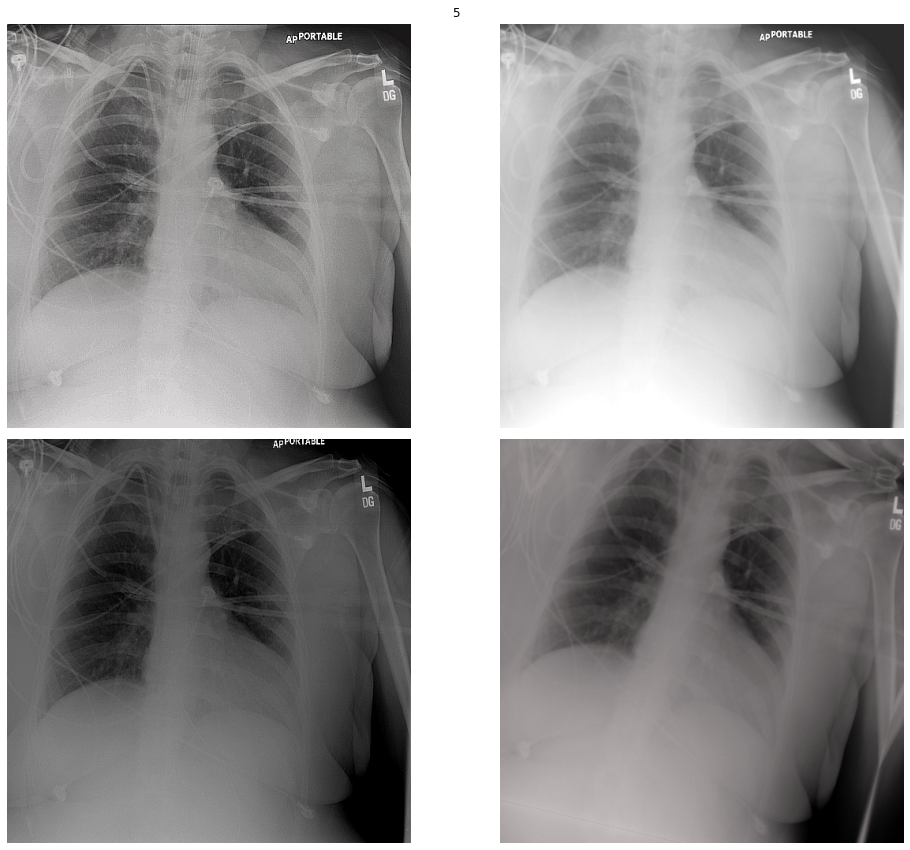

In [130]:
show_transformed_image(TRAIN_IMAGES, train_df, idx=5, rows=2, cols=2, aug=aug)